In [1]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath

from mc_lib.rndm import RndmWrapper
from mc_lib.observable import RealObservable

import cy_ising

In [2]:
def read_conformation(fname):
    struct_conf = []
    
    f = open(fname, 'r')
    f.readline()
    for line in f:
        line_ar = line.split()
        
        struct_conf += [[int(line_ar[0]), int(line_ar[1])]]
        
    return struct_conf

In [3]:
def draw_conformation(struct):
    struct = np.array(struct)
    plt.plot(struct[:, 0], struct[:, 1], '-go')
    plt.scatter(struct[0, 0], struct[0, 1])
    plt.scatter(struct[-1, 0], struct[-1, 1])
    plt.grid(True)
    plt.show()

In [4]:
def tabulate_neighbors(struct):
    neighb = np.zeros((len(struct), 5), dtype=int)
    for site in range(len(struct)):
        coordinate = struct[site]
        c1 = [coordinate[0] + 1, coordinate[1]]
        c2 = [coordinate[0] - 1, coordinate[1]]
        c3 = [coordinate[0], coordinate[1] + 1]
        c4 = [coordinate[0], coordinate[1] - 1]
        C_arr = [c1, c2, c3, c4]
        for coord in C_arr:
            try:
                site1 = struct.index(coord)
                neighb[site, 0] += 1
                neighb[site, neighb[site, 0]] = site1
            except:
                continue
    return neighb

In [5]:
def mean_conections(neighbors):
    sum = 0
    for line in neighbors:
        sum += line[0]
    return sum / len(neighbors)

In [6]:
def generate_1D(L):
    struct = []
    for i in range(L):
        struct += [[i, 0]]
    
    return struct

In [7]:
def square_1D(side_L):
    struct = []
    for i in range(side_L):
        struct += [[i, 0]]
        
    for i in range(1, side_L):
        struct += [[side_L-1, i]]
    
    for i in range(side_L - 2, -1, -1):
        struct += [[i, side_L-1]]
        
    for i in range(side_L-2, 0, -1):
        struct += [[0, i]]
    
    return struct

In [8]:
def squrae_2D(side_L):
    struct = [[0, 0]] * side_L**2
    for i in range(side_L):
        for j in range(side_L):
            if(i%2 == 0):
                struct[i*side_L+j] = [i, j]
            
            else:
                struct[i*side_L+j] = [i, side_L - 1 - j]
    
    return struct

In [9]:
def measure_structure(struct_1, b_min=0, b_max=1, N=10, n_sweeps=100000, num_therm=100000):
    draw_conformation(struct_1)
    print("conformation length: ", len(struct_1))
    
    ene = np.empty(N, dtype=RealObservable)
    mag2 = np.empty(N, dtype=RealObservable)
    mag4 = np.empty(N, dtype=RealObservable)
    ene_arr = [0] * N
    neighbors = tabulate_neighbors(struct_1)
    
    mean_nghbrs = mean_conections(neighbors)
    L = len(struct_1)
    betas = np.linspace(b_min+b_max/N, b_max, N)
    
    for i in range(N):
        ene[i], mag2[i], mag4[i], ene_arr[i] = cy_ising.simulate(L=L,
                                                                 neighbors=neighbors,
                                                                 beta=betas[i],
                                                                 num_sweeps=n_sweeps,
                                                                 num_therm=num_therm)
    
#     plt.figure()
#     plt.title("Energy")
#     plt.xlabel("beta")
#     plt.ylabel("H")
#     plt.errorbar(betas, [e.mean / L for e in ene], yerr = [e.errorbar / L for e in ene], fmt='o-')
#     plt.grid(True)
#     plt.show()
    
#     plt.figure()
#     plt.title("Magnetization")
#     plt.xlabel("beta")
#     plt.ylabel("m^2")
#     plt.errorbar(betas, [m.mean for m in mag2], yerr = [m.errorbar for m in mag2], fmt='o-')
#     plt.grid(True)
#     plt.show()
    
    return ene, mag2, mag4, ene_arr, mean_nghbrs

In [10]:
np.log(1 + np.sqrt(2)) / 2

0.44068679350977147

# 1D and 2D tests

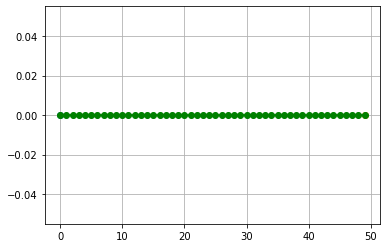

In [11]:
# 1D test
struct_1D = generate_1D(50)
draw_conformation(struct_1D)

In [12]:
mean_conections(tabulate_neighbors(struct_1D)) # test

1.96

In [13]:
N = 10# number of measurments
beta_max = 1
ene = np.empty(N, dtype=RealObservable)
mag2 = np.empty(N, dtype=RealObservable)
mag4 = np.empty(N, dtype=RealObservable)

neighbors = tabulate_neighbors(struct_1D)
L = len(struct_1D)
betas = np.linspace(beta_max/N, beta_max, N)


for i in range(N):
    ene[i], mag2[i], mag4[i], _ = cy_ising.simulate(L = L, neighbors = neighbors, beta=betas[i], num_sweeps=100000)

[[ 1  1  0  0  0]
 [ 2  2  0  0  0]
 [ 2  3  1  0  0]
 [ 2  4  2  0  0]
 [ 2  5  3  0  0]
 [ 2  6  4  0  0]
 [ 2  7  5  0  0]
 [ 2  8  6  0  0]
 [ 2  9  7  0  0]
 [ 2 10  8  0  0]
 [ 2 11  9  0  0]
 [ 2 12 10  0  0]
 [ 2 13 11  0  0]
 [ 2 14 12  0  0]
 [ 2 15 13  0  0]
 [ 2 16 14  0  0]
 [ 2 17 15  0  0]
 [ 2 18 16  0  0]
 [ 2 19 17  0  0]
 [ 2 20 18  0  0]
 [ 2 21 19  0  0]
 [ 2 22 20  0  0]
 [ 2 23 21  0  0]
 [ 2 24 22  0  0]
 [ 2 25 23  0  0]
 [ 2 26 24  0  0]
 [ 2 27 25  0  0]
 [ 2 28 26  0  0]
 [ 2 29 27  0  0]
 [ 2 30 28  0  0]
 [ 2 31 29  0  0]
 [ 2 32 30  0  0]
 [ 2 33 31  0  0]
 [ 2 34 32  0  0]
 [ 2 35 33  0  0]
 [ 2 36 34  0  0]
 [ 2 37 35  0  0]
 [ 2 38 36  0  0]
 [ 2 39 37  0  0]
 [ 2 40 38  0  0]
 [ 2 41 39  0  0]
 [ 2 42 40  0  0]
 [ 2 43 41  0  0]
 [ 2 44 42  0  0]
 [ 2 45 43  0  0]
 [ 2 46 44  0  0]
 [ 2 47 45  0  0]
 [ 2 48 46  0  0]
 [ 2 49 47  0  0]
 [ 1 48  0  0  0]]
beta =  0.1   T =  10.0
Conformation size = 50
initial config:  [ 1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  


Final:
  ene =  -0.592663200000291  (naive)
      =  -0.5927006022135415 +/- 0.0004814808348114462
  mag^2 =  0.07781549479166668 +/- 0.0003725517275056727
  mag^4 =  0.01674613822916667 +/- 0.0001963249707393155
[[ 1  1  0  0  0]
 [ 2  2  0  0  0]
 [ 2  3  1  0  0]
 [ 2  4  2  0  0]
 [ 2  5  3  0  0]
 [ 2  6  4  0  0]
 [ 2  7  5  0  0]
 [ 2  8  6  0  0]
 [ 2  9  7  0  0]
 [ 2 10  8  0  0]
 [ 2 11  9  0  0]
 [ 2 12 10  0  0]
 [ 2 13 11  0  0]
 [ 2 14 12  0  0]
 [ 2 15 13  0  0]
 [ 2 16 14  0  0]
 [ 2 17 15  0  0]
 [ 2 18 16  0  0]
 [ 2 19 17  0  0]
 [ 2 20 18  0  0]
 [ 2 21 19  0  0]
 [ 2 22 20  0  0]
 [ 2 23 21  0  0]
 [ 2 24 22  0  0]
 [ 2 25 23  0  0]
 [ 2 26 24  0  0]
 [ 2 27 25  0  0]
 [ 2 28 26  0  0]
 [ 2 29 27  0  0]
 [ 2 30 28  0  0]
 [ 2 31 29  0  0]
 [ 2 32 30  0  0]
 [ 2 33 31  0  0]
 [ 2 34 32  0  0]
 [ 2 35 33  0  0]
 [ 2 36 34  0  0]
 [ 2 37 35  0  0]
 [ 2 38 36  0  0]
 [ 2 39 37  0  0]
 [ 2 40 38  0  0]
 [ 2 41 39  0  0]
 [ 2 42 40  0  0]
 [ 2 43 41  0  0]
 [ 2 44 42  

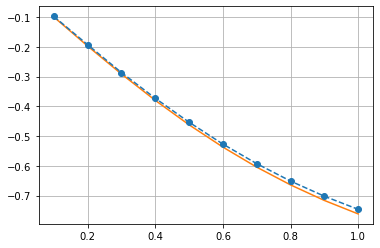

In [41]:
plt.figure()
plt.errorbar(betas, [e.mean for e in ene], yerr = [e.errorbar for e in ene], fmt='o--')
th = np.tanh(betas)
plt.plot(betas, -th * (1 + th**(L-2)) / (1 + th**L)) # true energy value on 1D
plt.grid(True)
plt.show()

In [31]:
s_file_name = r"Conformations\Tests\1D_line.npz"
np.savez(s_file_name, ene=ene, mag2=mag2, mag4=mag4)
data = np.load(s_file_name, allow_pickle=True)
print(data.files)

['ene', 'mag2', 'mag4']


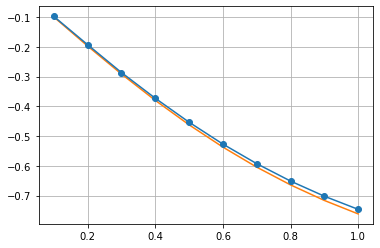

In [38]:
ene_loaded = data['ene']
plt.figure()
plt.errorbar(betas, [e.mean for e in ene_loaded], yerr = [e.errorbar for e in ene_loaded], fmt='o-')
th = np.tanh(betas)
plt.plot(betas, -th * (1 + th**(L-2)) / (1 + th**L)) # true energy value on 1D
plt.grid(True)
plt.show()

48


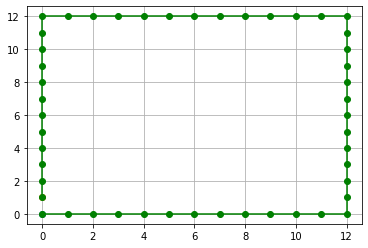

In [42]:
struct_1D = square_1D(13)
print(len(struct_1D))
draw_conformation(struct_1D)

In [43]:
mean_conections(tabulate_neighbors(struct_1D)) #test

2.0

In [44]:
N = 10# number of measurments
beta_max = 1
ene = np.empty(N, dtype=RealObservable)
mag2 = np.empty(N, dtype=RealObservable)
mag4 = np.empty(N, dtype=RealObservable)

neighbors = tabulate_neighbors(struct_1D)
L = len(struct_1D)
betas = np.linspace(beta_max/N, beta_max, N)


for i in range(N):
    ene[i], mag2[i], mag4[i] = cy_ising.simulate(L = L, neighbors = neighbors, beta=betas[i], num_sweeps=100000)

[[ 2  1 47  0  0]
 [ 2  2  0  0  0]
 [ 2  3  1  0  0]
 [ 2  4  2  0  0]
 [ 2  5  3  0  0]
 [ 2  6  4  0  0]
 [ 2  7  5  0  0]
 [ 2  8  6  0  0]
 [ 2  9  7  0  0]
 [ 2 10  8  0  0]
 [ 2 11  9  0  0]
 [ 2 12 10  0  0]
 [ 2 11 13  0  0]
 [ 2 14 12  0  0]
 [ 2 15 13  0  0]
 [ 2 16 14  0  0]
 [ 2 17 15  0  0]
 [ 2 18 16  0  0]
 [ 2 19 17  0  0]
 [ 2 20 18  0  0]
 [ 2 21 19  0  0]
 [ 2 22 20  0  0]
 [ 2 23 21  0  0]
 [ 2 24 22  0  0]
 [ 2 25 23  0  0]
 [ 2 24 26  0  0]
 [ 2 25 27  0  0]
 [ 2 26 28  0  0]
 [ 2 27 29  0  0]
 [ 2 28 30  0  0]
 [ 2 29 31  0  0]
 [ 2 30 32  0  0]
 [ 2 31 33  0  0]
 [ 2 32 34  0  0]
 [ 2 33 35  0  0]
 [ 2 34 36  0  0]
 [ 2 35 37  0  0]
 [ 2 36 38  0  0]
 [ 2 37 39  0  0]
 [ 2 38 40  0  0]
 [ 2 39 41  0  0]
 [ 2 40 42  0  0]
 [ 2 41 43  0  0]
 [ 2 42 44  0  0]
 [ 2 43 45  0  0]
 [ 2 44 46  0  0]
 [ 2 45 47  0  0]
 [ 2 46  0  0  0]]
beta =  0.1   T =  10.0
Conformation size = 48
initial config:  [ 1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1  1 -1  1  1  

ValueError: too many values to unpack (expected 3)

In [ ]:
plt.figure()
plt.errorbar(betas, [e.mean / L for e in ene], yerr = [e.errorbar / L for e in ene], fmt='o--')
th = np.tanh(betas)
plt.plot(betas, -th * (1 + th**(L-2)) / (1 + th**L)) # true energy value on 1D
plt.grid(True)
plt.show()

In [13]:
# mean error
(np.array([e.mean / L for e in ene]) - (-th * (1 + th**(L-2)) / (1 + th**L))).mean()

0.00018333215775709482

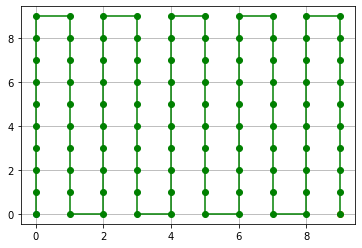

conformation length:  100
[[ 2 19  1  0  0]
 [ 3 18  2  0  0]
 [ 3 17  3  1  0]
 [ 3 16  4  2  0]
 [ 3 15  5  3  0]
 [ 3 14  6  4  0]
 [ 3 13  7  5  0]
 [ 3 12  8  6  0]
 [ 3 11  9  7  0]
 [ 2 10  8  0  0]
 [ 3 29  9 11  0]
 [ 4 28  8 10 12]
 [ 4 27  7 11 13]
 [ 4 26  6 12 14]
 [ 4 25  5 13 15]
 [ 4 24  4 14 16]
 [ 4 23  3 15 17]
 [ 4 22  2 16 18]
 [ 4 21  1 17 19]
 [ 3 20  0 18  0]
 [ 3 39 19 21  0]
 [ 4 38 18 22 20]
 [ 4 37 17 23 21]
 [ 4 36 16 24 22]
 [ 4 35 15 25 23]
 [ 4 34 14 26 24]
 [ 4 33 13 27 25]
 [ 4 32 12 28 26]
 [ 4 31 11 29 27]
 [ 3 30 10 28  0]
 [ 3 49 29 31  0]
 [ 4 48 28 30 32]
 [ 4 47 27 31 33]
 [ 4 46 26 32 34]
 [ 4 45 25 33 35]
 [ 4 44 24 34 36]
 [ 4 43 23 35 37]
 [ 4 42 22 36 38]
 [ 4 41 21 37 39]
 [ 3 40 20 38  0]
 [ 3 59 39 41  0]
 [ 4 58 38 42 40]
 [ 4 57 37 43 41]
 [ 4 56 36 44 42]
 [ 4 55 35 45 43]
 [ 4 54 34 46 44]
 [ 4 53 33 47 45]
 [ 4 52 32 48 46]
 [ 4 51 31 49 47]
 [ 3 50 30 48  0]
 [ 3 69 49 51  0]
 [ 4 68 48 50 52]
 [ 4 67 47 51 53]
 [ 4 66 46 52 54]
 [


----- sweep =  20000 spins =  [ 1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1
 -1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1  1  1 -1  1 -1 -1 -1
  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1
 -1 -1 -1 -1] beta =  0.2
  ene =  -38.203889805509725  (naive)
      =  -38.2223478618421 +/- 0.11293200694054947
  mag^2 =  0.024829235197368422 +/- 0.0002550129229599884
  mag^4 =  0.0017804958717105262 +/- 3.9015368999550186e-05

----- sweep =  30000 spins =  [ 1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1 -1 -1  1  1 -1 -1 -1
  1 -1  1 -1  1 -1  1  1  1  1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1  1 -1 -1 -1  1  1  1 -1
 -1 -1 -1  1  1  1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
  1  1  1 -1] beta =  0.2
  ene =  -38.21419286023799  (naive)
      =  -38.19447544642858 +/- 0.0872671561552257
  mag^2


----- sweep =  30000 spins =  [ 1  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1  1  1 -1 -1  1  1 -1 -1  1  1 -1
  1  1  1  1  1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1
  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1  1 -1 -1  1 -1 -1 -1  1
  1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1  1 -1
 -1 -1 -1 -1] beta =  0.30000000000000004
  ene =  -61.993866871104295  (naive)
      =  -61.95996093749999 +/- 0.10320277951366452
  mag^2 =  0.050591336495535724 +/- 0.00039098785464059373
  mag^4 =  0.006973977248883927 +/- 0.00011486710662670658

----- sweep =  40000 spins =  [-1  1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1  1  1
  1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1 -1 -1  1  1  1  1  1  1  1 -1
 -1  1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1  1  1  1 -1  1  1 -1  1  1 -1
 -1 -1 -1  1  1 -1  1  1  1  1 -1  1  1  1 -1 -1 -1  1  1 -1 -1  1  1  1
  1 -1 -1 -1] beta =  0.30000000000000004
  ene =  -61.90145246368841  (naive)
      =  -61.925164473684

  1 -1 -1 -1] beta =  0.4
  ene =  -92.60577980733976  (naive)
      =  -92.59430803571429 +/- 0.15635937828952687
  mag^2 =  0.1460760044642857 +/- 0.001337321608987715
  mag^4 =  0.04567108270089286 +/- 0.0006685326351536292

----- sweep =  40000 spins =  [-1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1  1
  1  1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1
 -1 -1  1  1  1  1  1  1 -1 -1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1  1
  1  1 -1 -1] beta =  0.4
  ene =  -92.53473663158421  (naive)
      =  -92.52431126644738 +/- 0.13261528460601657
  mag^2 =  0.14520207648026318 +/- 0.0011663178871237467
  mag^4 =  0.04539053101151316 +/- 0.0005970345064409833

----- sweep =  50000 spins =  [-1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1
 -1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -

  ene =  -131.61610959726008  (naive)
      =  -131.6354337993421 +/- 0.16055955407159478
  mag^2 =  0.4684442845394736 +/- 0.0037177540625098447
  mag^4 =  0.2908207839802631 +/- 0.00303089326962001

----- sweep =  50000 spins =  [ 1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1
  1  1 -1  1] beta =  0.5
  ene =  -131.67884642307155  (naive)
      =  -131.69136555989581 +/- 0.1435134457829332
  mag^2 =  0.4689587809244792 +/- 0.002804044576655069
  mag^4 =  0.29124484827799474 +/- 0.0022750439500494267

----- sweep =  60000 spins =  [-1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1


----- sweep =  80000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1] beta =  0.6
  ene =  -159.30315871051613  (naive)
      =  -159.3025030838816 +/- 0.06941419863176256
  mag^2 =  0.7915490542763159 +/- 0.001367652114010699
  mag^4 =  0.6583956966776314 +/- 0.0015685051961037923

----- sweep =  90000 spins =  [ 1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1 -1] beta =  0.6
  ene =  -159.2645415050944  (naive)
      =  -159.29338378906252 +/- 0.07049492365804441
  mag^2 =  


Final:
  ene =  -170.63644  (naive)
      =  -170.63470458984378 +/- 0.030881743844762992
  mag^2 =  0.9140279459635416 +/- 0.00043786854895402834
  mag^4 =  0.8447210391666666 +/- 0.0006467859091437684
[[ 2 19  1  0  0]
 [ 3 18  2  0  0]
 [ 3 17  3  1  0]
 [ 3 16  4  2  0]
 [ 3 15  5  3  0]
 [ 3 14  6  4  0]
 [ 3 13  7  5  0]
 [ 3 12  8  6  0]
 [ 3 11  9  7  0]
 [ 2 10  8  0  0]
 [ 3 29  9 11  0]
 [ 4 28  8 10 12]
 [ 4 27  7 11 13]
 [ 4 26  6 12 14]
 [ 4 25  5 13 15]
 [ 4 24  4 14 16]
 [ 4 23  3 15 17]
 [ 4 22  2 16 18]
 [ 4 21  1 17 19]
 [ 3 20  0 18  0]
 [ 3 39 19 21  0]
 [ 4 38 18 22 20]
 [ 4 37 17 23 21]
 [ 4 36 16 24 22]
 [ 4 35 15 25 23]
 [ 4 34 14 26 24]
 [ 4 33 13 27 25]
 [ 4 32 12 28 26]
 [ 4 31 11 29 27]
 [ 3 30 10 28  0]
 [ 3 49 29 31  0]
 [ 4 48 28 30 32]
 [ 4 47 27 31 33]
 [ 4 46 26 32 34]
 [ 4 45 25 33 35]
 [ 4 44 24 34 36]
 [ 4 43 23 35 37]
 [ 4 42 22 36 38]
 [ 4 41 21 37 39]
 [ 3 40 20 38  0]
 [ 3 59 39 41  0]
 [ 4 58 38 42 40]
 [ 4 57 37 43 41]
 [ 4 56 36 44 42]
 [ 4


----- sweep =  10000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  0.9
  ene =  -177.67803219678032  (naive)
      =  -177.67537006578948 +/- 0.053403232783479394
  mag^2 =  0.9798784539473684 +/- 0.0004727397522333791
  mag^4 =  0.9617004114473682 +/- 0.0008480815254531532

----- sweep =  20000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  0.9
  ene =  -177.68971551422428  (naive)
      =  -177.68421052631578 +/- 0.03378307107648547
  mag^2

----- sweep =  20000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  1.0
  ene =  -178.81305934703263  (naive)
      =  -178.8108552631579 +/- 0.022203010820647875
  mag^2 =  0.9898329975328947 +/- 0.00021392443598400356
  mag^4 =  0.9804275182976974 +/- 0.0003966093338151094

----- sweep =  30000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  1.0
  ene =  -178.80670644311857  (naive)
      =  -178.80308314732142 +/- 0.016781438337197686
  mag^2

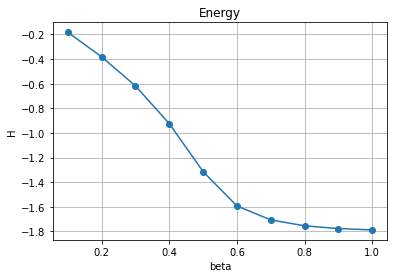

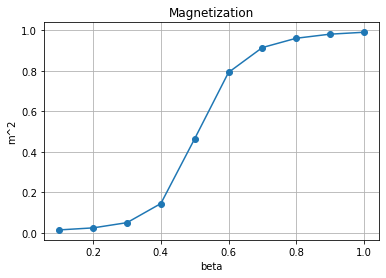

(array([<mc_lib.observable.RealObservable object at 0x0000021B855A87B0>,
       dtype=object),
 array([<mc_lib.observable.RealObservable object at 0x0000021B855A81C0>,
       dtype=object),
 array([<mc_lib.observable.RealObservable object at 0x0000021B855A82B0>,
       dtype=object),
 [<MemoryView of 'ndarray' at 0x21b853c6ba0>,
  <MemoryView of 'ndarray' at 0x21b853c6d40>,
  <MemoryView of 'ndarray' at 0x21b855b3040>,
  <MemoryView of 'ndarray' at 0x21b855b31e0>,
  <MemoryView of 'ndarray' at 0x21b855b3380>,
  <MemoryView of 'ndarray' at 0x21b855b3520>,
  <MemoryView of 'ndarray' at 0x21b855b36c0>,
  <MemoryView of 'ndarray' at 0x21b855b3860>,
  <MemoryView of 'ndarray' at 0x21b855b3a00>,
  <MemoryView of 'ndarray' at 0x21b855b3ba0>])

In [13]:
struct_2D = squrae_2D(10)
measure_structure(struct_2D)

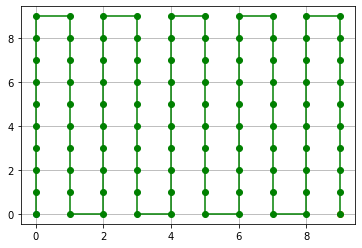

conformation length:  100
[[ 2 19  1  0  0]
 [ 3 18  2  0  0]
 [ 3 17  3  1  0]
 [ 3 16  4  2  0]
 [ 3 15  5  3  0]
 [ 3 14  6  4  0]
 [ 3 13  7  5  0]
 [ 3 12  8  6  0]
 [ 3 11  9  7  0]
 [ 2 10  8  0  0]
 [ 3 29  9 11  0]
 [ 4 28  8 10 12]
 [ 4 27  7 11 13]
 [ 4 26  6 12 14]
 [ 4 25  5 13 15]
 [ 4 24  4 14 16]
 [ 4 23  3 15 17]
 [ 4 22  2 16 18]
 [ 4 21  1 17 19]
 [ 3 20  0 18  0]
 [ 3 39 19 21  0]
 [ 4 38 18 22 20]
 [ 4 37 17 23 21]
 [ 4 36 16 24 22]
 [ 4 35 15 25 23]
 [ 4 34 14 26 24]
 [ 4 33 13 27 25]
 [ 4 32 12 28 26]
 [ 4 31 11 29 27]
 [ 3 30 10 28  0]
 [ 3 49 29 31  0]
 [ 4 48 28 30 32]
 [ 4 47 27 31 33]
 [ 4 46 26 32 34]
 [ 4 45 25 33 35]
 [ 4 44 24 34 36]
 [ 4 43 23 35 37]
 [ 4 42 22 36 38]
 [ 4 41 21 37 39]
 [ 3 40 20 38  0]
 [ 3 59 39 41  0]
 [ 4 58 38 42 40]
 [ 4 57 37 43 41]
 [ 4 56 36 44 42]
 [ 4 55 35 45 43]
 [ 4 54 34 46 44]
 [ 4 53 33 47 45]
 [ 4 52 32 48 46]
 [ 4 51 31 49 47]
 [ 3 50 30 48  0]
 [ 3 69 49 51  0]
 [ 4 68 48 50 52]
 [ 4 67 47 51 53]
 [ 4 66 46 52 54]
 [


----- sweep =  0 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1
  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1  1
  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1  1  1  1  1
 -1 -1 -1 -1] beta =  0.5
  ene =  -124.0  (naive)
      =  -124.0 +/- 0.0
  mag^2 =  0.11560000000000002 +/- 0.0
  mag^4 =  0.013363360000000005 +/- 0.0

----- sweep =  10000 spins =  [ 1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1] beta =  0.5
  ene =  -131.31006899310069  (naive)
      =  -131.24033717105263 +/- 0.3125612096366008
  mag^2 =  0.45744765624999995 +/- 0.006182628735943196
  mag^4 =  0.28098604439144736 +


----- sweep =  30000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1
 -1 -1 -1 -1] beta =  0.75
  ene =  -173.5384153861538  (naive)
      =  -173.53306361607142 +/- 0.04937047895235824
  mag^2 =  0.9420263113839286 +/- 0.0006832949945213747
  mag^4 =  0.8929043641183035 +/- 0.0010380220477218998

----- sweep =  40000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  0.75
  ene =  -173.54916127096823  (naive)
      =  -173.55648643092107 +/- 0.03955366251307107
  mag^2

----- sweep =  50000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  1.0
  ene =  -178.78238435231296  (naive)
      =  -178.7828369140625 +/- 0.01429580158288264
  mag^2 =  0.9895443522135418 +/- 0.00014484112814274256
  mag^4 =  0.9798643089518227 +/- 0.0002706098400308079

----- sweep =  60000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1
 -1 -1 -1 -1] beta =  1.0
  ene =  -178.78075365410575  (naive)
      =  -178.78376116071428 +/- 0.012765396559223818
  mag^2 

----- sweep =  70000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  1.25
  ene =  -179.7176611762689  (naive)
      =  -179.71857766544116 +/- 0.00493368634841051
  mag^2 =  0.9975492015165441 +/- 4.311714236572417e-05
  mag^4 =  0.9952326693681065 +/- 8.351491990996797e-05

----- sweep =  80000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  1.25
  ene =  -179.7189285133936  (naive)
      =  -179.7190583881579 +/- 0.004624281656374213
  mag^2 =


----- sweep =  80000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  1.5
  ene =  -179.92742590717617  (naive)
      =  -179.9275801809211 +/- 0.002447769145912528
  mag^2 =  0.9993417917351974 +/- 2.2679939631129724e-05
  mag^4 =  0.9987162020374177 +/- 4.390323071937885e-05

----- sweep =  90000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  1.5
  ene =  -179.92724525283052  (naive)
      =  -179.927294921875 +/- 0.0022851103689429295
  mag^2


----- sweep =  90000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  1.75
  ene =  -179.97840023999734  (naive)
      =  -179.9785400390625 +/- 0.001274872453964508
  mag^2 =  0.9998019921875 +/- 1.0498554930305058e-05
  mag^4 =  0.9996125310078124 +/- 2.056841938555815e-05

Final:
  ene =  -179.97816  (naive)
      =  -179.97829182942712 +/- 0.0010862876548899377
  mag^2 =  0.9997983927408854 +/- 9.34548552592951e-06
  mag^4 =  0.9996055736735027 +/- 1.8279186269454944e-05
[[ 2 19  1  0  0]
 [ 3 18  2  0  0]
 [ 3 17  3  1  0]
 [ 3 16  4  2  0]
 [ 3 15  5  3  0]
 [ 3 14  6  4  0]
 [ 3 13  7  5  0]
 [ 3 12  8  6  0]
 [ 3 11  9  7  0]
 [ 2 10  8  0  0]
 [ 3 29  9 11  0]
 [ 4 28  8 10 12]
 [ 4 27  7 11 13]
 [ 4 26  6 


Final:
  ene =  -179.99216  (naive)
      =  -179.99218749999997 +/- 0.0005884900560562959
  mag^2 =  0.9999271199544272 +/- 5.546260021718345e-06
  mag^4 =  0.9998572497347005 +/- 1.0851060428098404e-05
[[ 2 19  1  0  0]
 [ 3 18  2  0  0]
 [ 3 17  3  1  0]
 [ 3 16  4  2  0]
 [ 3 15  5  3  0]
 [ 3 14  6  4  0]
 [ 3 13  7  5  0]
 [ 3 12  8  6  0]
 [ 3 11  9  7  0]
 [ 2 10  8  0  0]
 [ 3 29  9 11  0]
 [ 4 28  8 10 12]
 [ 4 27  7 11 13]
 [ 4 26  6 12 14]
 [ 4 25  5 13 15]
 [ 4 24  4 14 16]
 [ 4 23  3 15 17]
 [ 4 22  2 16 18]
 [ 4 21  1 17 19]
 [ 3 20  0 18  0]
 [ 3 39 19 21  0]
 [ 4 38 18 22 20]
 [ 4 37 17 23 21]
 [ 4 36 16 24 22]
 [ 4 35 15 25 23]
 [ 4 34 14 26 24]
 [ 4 33 13 27 25]
 [ 4 32 12 28 26]
 [ 4 31 11 29 27]
 [ 3 30 10 28  0]
 [ 3 49 29 31  0]
 [ 4 48 28 30 32]
 [ 4 47 27 31 33]
 [ 4 46 26 32 34]
 [ 4 45 25 33 35]
 [ 4 44 24 34 36]
 [ 4 43 23 35 37]
 [ 4 42 22 36 38]
 [ 4 41 21 37 39]
 [ 3 40 20 38  0]
 [ 3 59 39 41  0]
 [ 4 58 38 42 40]
 [ 4 57 37 43 41]
 [ 4 56 36 44 42]
 [ 

----- sweep =  20000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  2.5
  ene =  -179.99830008499575  (naive)
      =  -179.9982524671052 +/- 0.00080934711785222
  mag^2 =  0.9999837171052628 +/- 7.199626028334112e-06
  mag^4 =  0.9999680790131578 +/- 1.4114145364094228e-05

----- sweep =  30000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  2.5
  ene =  -179.99886670444317  (naive)
      =  -179.9988141741072 +/- 0.0006227861517461871
  mag^2 

  ene =  -179.9997600047999  (naive)
      =  -179.999755859375 +/- 0.00022286887919318286
  mag^2 =  0.9999975830078126 +/- 2.206403621434403e-06
  mag^4 =  0.9999952617285158 +/- 4.325432624452805e-06

----- sweep =  60000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  2.75
  ene =  -179.9997333377777  (naive)
      =  -179.99979073660717 +/- 0.00019373576609398523
  mag^2 =  0.9999979282924104 +/- 1.918033074461137e-06
  mag^4 =  0.9999959386244417 +/- 3.760102792746882e-06

----- sweep =  70000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -


----- sweep =  90000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  3.0
  ene =  -179.99982222419752  (naive)
      =  -179.99980468750002 +/- 0.00014151575719742012
  mag^2 =  0.9999980664062499 +/- 1.4010261623314807e-06
  mag^4 =  0.9999962093828124 +/- 2.746565361172077e-06

Final:
  ene =  -179.99984  (naive)
      =  -179.99983723958334 +/- 0.0001265114073091818
  mag^2 =  0.9999983886718751 +/- 1.2524484710354276e-06
  mag^4 =  0.9999968411523438 +/- 2.455312054099701e-06
[[ 2 19  1  0  0]
 [ 3 18  2  0  0]
 [ 3 17  3  1  0]
 [ 3 16  4  2  0]
 [ 3 15  5  3  0]
 [ 3 14  6  4  0]
 [ 3 13  7  5  0]
 [ 3 12  8  6  0]
 [ 3 11  9  7  0]
 [ 2 10  8  0  0]
 [ 3 29  9 11  0]
 [ 4 28  8 10 12]
 [ 4 27  7 11 13]
 [ 4 


----- sweep =  0 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  3.5
  ene =  -180.0  (naive)
      =  -180.0 +/- 0.0
  mag^2 =  1.0 +/- 0.0
  mag^4 =  1.0 +/- 0.0

----- sweep =  10000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  3.5
  ene =  -180.0  (naive)
      =  -179.99999999999994 +/- 1.0718374003391577e-06
  mag^2 =  0.9999999999999996 +/- 4.834575090729074e-09
  mag^4 =  0.9999999999999996 +/- 4.834575090729074e-09

----- sweep =  20


----- sweep =  50000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  3.75
  ene =  -180.0  (naive)
      =  -180.0 +/- 6.581820586702065e-07
  mag^2 =  1.0 +/- 4.301594713252975e-09
  mag^4 =  1.0 +/- 4.301594713252975e-09

----- sweep =  60000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  3.75
  ene =  -180.0  (naive)
      =  -180.00000000000003 +/- 1.301361540262247e-06
  mag^2 =  0.9999999999999997 +/- 5.632109537858176e-09
  mag^4 =  0.99


----- sweep =  80000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  4.0
  ene =  -180.0  (naive)
      =  -179.99999999999994 +/- 1.0718374003391577e-06
  mag^2 =  0.9999999999999996 +/- 4.834575090729074e-09
  mag^4 =  0.9999999999999996 +/- 4.834575090729074e-09

----- sweep =  90000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  4.0
  ene =  -180.0  (naive)
      =  -180.0 +/- 1.156765813566442e-06
  mag^2 =  0.9999999999999999 +/- 4.718859


----- sweep =  0 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  4.5
  ene =  -180.0  (naive)
      =  -180.0 +/- 0.0
  mag^2 =  1.0 +/- 0.0
  mag^4 =  1.0 +/- 0.0

----- sweep =  10000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  4.5
  ene =  -180.0  (naive)
      =  -179.99999999999994 +/- 1.0718374003391577e-06
  mag^2 =  0.9999999999999996 +/- 4.834575090729074e-09
  mag^4 =  0.9999999999999996 +/- 4.834575090729074e-09

----- sweep =  20

  ene =  -180.0  (naive)
      =  -180.00000000000003 +/- 1.301361540262247e-06
  mag^2 =  0.9999999999999997 +/- 5.632109537858176e-09
  mag^4 =  0.9999999999999997 +/- 5.632109537858176e-09

----- sweep =  70000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] beta =  4.75
  ene =  -180.0  (naive)
      =  -180.00000000000003 +/- 6.938999892320621e-07
  mag^2 =  1.0 +/- 5.111056123450662e-09
  mag^4 =  1.0 +/- 5.111056123450662e-09

----- sweep =  80000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 

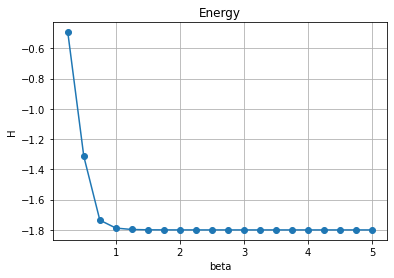

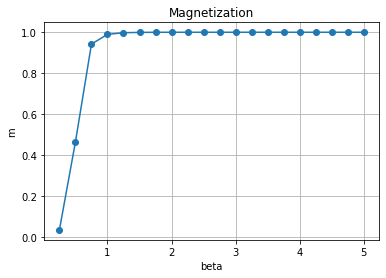

(array([<mc_lib.observable.RealObservable object at 0x000002396587AE40>,
       dtype=object),
 array([<mc_lib.observable.RealObservable object at 0x000002396587A030>,
       dtype=object),
 array([<mc_lib.observable.RealObservable object at 0x000002396587A350>,
       dtype=object))

In [26]:
struct_2D = squrae_2D(10)
measure_structure(struct_2D, 0, 5, 20, 100000)

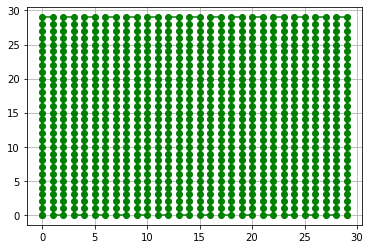

conformation length:  900
[[  2  59   1   0   0]
 [  3  58   2   0   0]
 [  3  57   3   1   0]
 ...
 [  3 842 896 898   0]
 [  3 841 897 899   0]
 [  2 840 898   0   0]]
beta =  0.1   T =  10.0
initial config:  [ 1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1  1 -1  1  1  1
 -1  1 -1  1 -1 -1  1 -1  1  1 -1  1 -1  1 -1 -1  1 -1  1  1  1 -1 -1 -1
 -1 -1  1  1 -1 -1  1  1 -1 -1  1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1
 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1
 -1  1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1  1
  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1 -1  1
  1 -1 -1  1 -1 -1  1  1 -1  1  1  1  1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1
 -1 -1 -1 -1  1  1  1 -1  1  1  1 -1  1  1  1  1 -1  1 -1 -1  1  1 -1  1
  1 -1 -1 -1 -1  1  1 -1  1 -1  1  1 -1 -1  1  1  1  1  1  1 -1 -1  1 -1
  1 -1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1
  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1  1 -1 -1  1  1 -


----- sweep =  30000 spins =  [ 1 -1  1  1 -1  1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1
 -1  1 -1  1 -1  1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1  1  1  1  1
 -1  1  1  1  1 -1 -1 -1  1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1
  1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1  1  1 -1  1  1 -1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1  1 -1  1  1 -1  1  1  1
 -1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1
  1  1 -1 -1  1  1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1  1  1 -1
  1  1  1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1 -1
 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1
  1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1  1  1  1 -1  1 -1  1 -1
 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1 -1  1  1  1  1 -1 -1  1  1 -1
 -1 -1  1  1  1  1 -

 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1] beta =  0.1
  ene =  -176.66592223462942  (naive)
      =  -176.67288643973214 +/- 0.22760115532626018
  mag^2 =  0.0017250610566854059 +/- 1.0856753557443185e-05
  mag^4 =  8.893784049024131e-06 +/- 1.247218517796213e-07

----- sweep =  70000 spins =  [ 1  1  1 -1 -1 -1 -1 -1  1  1  1 -1  1  1 -1  1 -1  1 -1 -1  1 -1 -1  1
 -1 -1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1  1
 -1  1  1  1  1 -1  1 -1 -1 -1  1 -1  1  1  1  1 -1  1 -1 -1 -1  1  1 -1
 -1  1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1  1  1
 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1  1 -1  1  1  1  1
  1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1  1 -1  1 -1 -1
 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1
 -1  1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1  1 -1  1
  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1
  1  1  1 -1  1  1  1 -1  1  1 -1  1 -1 -1  1  1  1 

initial config:  [ 1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1  1 -1  1  1  1
 -1  1 -1  1 -1 -1  1 -1  1  1 -1  1 -1  1 -1 -1  1 -1  1  1  1 -1 -1 -1
 -1 -1  1  1 -1 -1  1  1 -1 -1  1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1
 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1
 -1  1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1  1
  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1 -1  1
  1 -1 -1  1 -1 -1  1  1 -1  1  1  1  1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1
 -1 -1 -1 -1  1  1  1 -1  1  1  1 -1  1  1  1  1 -1  1 -1 -1  1  1 -1  1
  1 -1 -1 -1 -1  1  1 -1  1 -1  1  1 -1 -1  1  1  1  1  1  1 -1 -1  1 -1
  1 -1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1
  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1  1
  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1  1  1  1 -1 -1 -1
 -1 -1 -1  1 -1  1 -1  1 -1  1  1 


----- sweep =  20000 spins =  [ 1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1  1
  1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1
 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1 -1  1  1  1 -1  1  1
 -1 -1  1  1  1 -1  1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1  1  1  1  1 -1
 -1 -1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1  1  1 -1
  1 -1  1 -1  1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1  1  1  1 -1 -1
 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1  1 -1  1  1  1  1 -1 -1  1  1  1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1  1
 -1  1  1 -1 -1 -1  1  1  1  1 -1  1  1  1 -1  1 -1 -1  1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1  1 -1 -1  1 -1  1  1
  1 -1  1  1 -1  1  1  1  1  1 -1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1
  1  1  1  1 -1 -1 -


----- sweep =  50000 spins =  [-1 -1 -1  1  1  1 -1  1  1  1  1 -1  1  1 -1 -1 -1  1  1 -1  1 -1  1 -1
 -1  1 -1 -1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1 -1  1 -1  1  1  1  1 -1
 -1  1  1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1  1 -1  1  1  1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1
 -1  1  1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1  1  1 -1  1  1  1  1  1 -1 -1
 -1  1  1  1  1  1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1  1  1  1  1
 -1  1 -1  1  1  1 -1 -1  1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1  1  1 -1  1
  1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1 -1  1  1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1  1 -1 -1  1  1 -1  1  1 -1  1  1
 -1  1 -1  1  1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1  1
  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1
  1 -1 -1  1  1  1  

  ene =  -371.12981243125097  (naive)
      =  -371.1077665441177 +/- 0.21117061161621517
  mag^2 =  0.003002482043164489 +/- 2.260091915753945e-05
  mag^4 =  2.6897787101337453e-05 +/- 4.584983901273751e-07

----- sweep =  80000 spins =  [-1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1
 -1  1 -1  1  1  1 -1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1  1
 -1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1
  1  1 -1 -1 -1  1 -1 -1  1  1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1
  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1 -1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1 -1  1 -1  1  1  1 -1  1 -1 -1  1  1  1  1 -1 -1  1  1
  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1
 -1 -1 -1 -1 -1  1  1 -1 -1 -1 


----- sweep =  0 spins =  [ 1  1  1  1  1  1 -1 -1 -1  1 -1  1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1
  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1 -1 -1
 -1 -1  1 -1  1  1 -1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1
  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1  1  1
 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1
  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1


----- sweep =  40000 spins =  [ 1  1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1
 -1 -1  1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1
 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1  1  1 -1  1
  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1  1 -1  1 -1  1
  1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1
  1 -1 -1 -1  1  1  1  1 -1 -1 -1  1 -1  1 -1 -1  1  1  1 -1 -1  1  1  1
  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1
  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1  1  1  1  1 -1  1  1  1  1  1
 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1  1 -1  1 -1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1 -1 -1
 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1 -1 -1  1  1  1 -1
  1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1
 -1 -1 -1  1  1  1 -


----- sweep =  90000 spins =  [-1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1  1  1  1
  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1
 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1
 -1  1 -1  1  1 -1 -1 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1 -1 -1  1  1
 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1
 -1  1  1  1 -1  1  1 -1 -1  1 -1  1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1
  1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1  1  1
  1  1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1
  1 -1 -1  1 -1 -1  


----- sweep =  20000 spins =  [ 1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1
 -1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1
 -1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1
 -1 -1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1
 -1 -1  1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1
  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1
  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1
 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1  1
 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1
  1  1  1  1  1  1  


----- sweep =  60000 spins =  [-1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1
  1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1
 -1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1
  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1
 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1  1  1
  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1  1  1  1 -1  1  1
 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1 -1 -1  1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1
  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1
  1  1  1 -1  1  1 -


Final:
  ene =  -937.4369  (naive)
      =  -937.5129597981769 +/- 0.7929674756943067
  mag^2 =  0.03908742233715921 +/- 0.001089093503298202
  mag^4 =  0.004143756210461697 +/- 0.0002266874300650248
[[  2  59   1   0   0]
 [  3  58   2   0   0]
 [  3  57   3   1   0]
 ...
 [  3 842 896 898   0]
 [  3 841 897 899   0]
 [  2 840 898   0   0]]
beta =  0.5   T =  2.0
initial config:  [ 1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1  1 -1  1  1  1
 -1  1 -1  1 -1 -1  1 -1  1  1 -1  1 -1  1 -1 -1  1 -1  1  1  1 -1 -1 -1
 -1 -1  1  1 -1 -1  1  1 -1 -1  1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1
 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1
 -1  1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1  1
  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1 -1  1
  1 -1 -1  1 -1 -1  1  1 -1  1  1  1  1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1
 -1 -1 -1 -1  1  1  1 -1  1  1  1 -1  1  1  1  1 -1  1 -1 -1  1  1 -1  1
  1 -1 -1 -1 -1  1  1 -1  1 -1 


----- sweep =  20000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1 -1 -1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1
 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  


----- sweep =  60000 spins =  [-1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  


----- sweep =  90000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
 -1 -1 -1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1  1 -1  1  1
  1  1  1  1  1  1  


----- sweep =  20000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -

----- sweep =  70000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1


----- sweep =  10000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  

----- sweep =  40000 spins =  [-1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1 -1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1

  mag^2 =  0.9632709326257991 +/- 0.00020133498120678583
  mag^4 =  0.9282178657907018 +/- 0.000379100213294792

----- sweep =  70000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

  1  1  1  1  1  1  1  1  1  1  1  1] beta =  0.7000000000000001
  ene =  -1692.482083532405  (naive)
      =  -1692.496533203125 +/- 0.1845433317627445
  mag^2 =  0.9630970401114003 +/- 0.00021158451322209152
  mag^4 =  0.9278885121509928 +/- 0.0004001597618070023

Final:
  ene =  -1692.5075  (naive)
      =  -1692.5121053059897 +/- 0.15822582685394404
  mag^2 =  0.9630055344569827 +/- 0.0001878764491448391
  mag^4 =  0.927721357249562 +/- 0.0003542112996365482
[[  2  59   1   0   0]
 [  3  58   2   0   0]
 [  3  57   3   1   0]
 ...
 [  3 842 896 898   0]
 [  3 841 897 899   0]
 [  2 840 898   0   0]]
beta =  0.8   T =  1.25
initial config:  [ 1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1  1 -1  1  1  1
 -1  1 -1  1 -1 -1  1 -1  1  1 -1  1 -1  1 -1 -1  1 -1  1  1  1 -1 -1 -1
 -1 -1  1  1 -1 -1  1  1 -1 -1  1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1
 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1
 -1  1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1  1 -

  mag^4 =  0.9684454120486875 +/- 0.0002551323027099504

----- sweep =  40000 spins =  [-1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 


----- sweep =  70000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  


Final:
  ene =  -1718.6819  (naive)
      =  -1718.687479654948 +/- 0.08498324086863929
  mag^2 =  0.9838804400659877 +/- 0.00010553639491590701
  mag^4 =  0.9681446147356763 +/- 0.0002028884429538814
[[  2  59   1   0   0]
 [  3  58   2   0   0]
 [  3  57   3   1   0]
 ...
 [  3 842 896 898   0]
 [  3 841 897 899   0]
 [  2 840 898   0   0]]
beta =  0.9   T =  1.1111111111111112
initial config:  [ 1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1  1 -1  1  1  1
 -1  1 -1  1 -1 -1  1 -1  1  1 -1  1 -1  1 -1 -1  1 -1  1  1  1 -1 -1 -1
 -1 -1  1  1 -1 -1  1  1 -1 -1  1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1
 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1
 -1  1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1  1
  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1 -1  1
  1 -1 -1  1 -1 -1  1  1 -1  1  1  1  1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1
 -1 -1 -1 -1  1  1  1 -1  1  1  1 -1  1  1  1  1 -1  1 -1 -1  1  1 -1  1
  1 -1 -1 -1 -1


----- sweep =  20000 spins =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 


----- sweep =  60000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  


----- sweep =  0 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1


----- sweep =  50000 spins =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

      =  -1735.1685546875 +/- 0.04144937394816427
  mag^2 =  0.9963696412037037 +/- 3.568806692572178e-05
  mag^4 =  0.9927744688326119 +/- 7.082937961706644e-05

Final:
  ene =  -1735.1818  (naive)
      =  -1735.1830240885415 +/- 0.03837922083383589
  mag^2 =  0.9963843889652455 +/- 3.322375530700331e-05
  mag^4 =  0.9928037129389671 +/- 6.59332741817634e-05


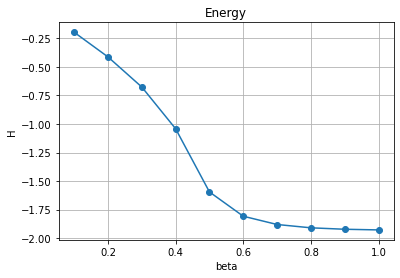

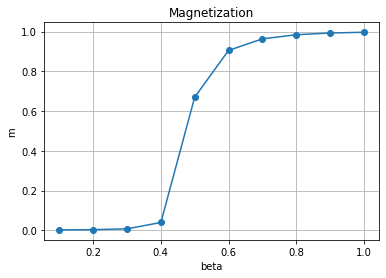

(array([<mc_lib.observable.RealObservable object at 0x0000023965547E90>,
       dtype=object),
 array([<mc_lib.observable.RealObservable object at 0x0000023965547EE0>,
       dtype=object),
 array([<mc_lib.observable.RealObservable object at 0x0000023963E1D1C0>,
       dtype=object))

In [15]:
struct_2D = squrae_2D(30)
measure_structure(struct_2D)

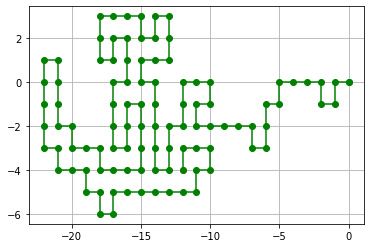

conformation length:  101
[[  1   1   0   0   0]
 [  3   0   4   2   0]
 [  2   3   1   0   0]
 [  2   2   4   0   0]
 [  3   1   5   3   0]
 [  2   4   6   0   0]
 [  2   5   7   0   0]
 [  2   6   8   0   0]
 [  2   9   7   0   0]
 [  2   8  10   0   0]
 [  3  13   9  11   0]
 [  2  12  10   0   0]
 [  2  11  13   0   0]
 [  3  10  14  12   0]
 [  2  13  15   0   0]
 [  2  14  16   0   0]
 [  4  15  17  19  97]
 [  4  16  24  18  98]
 [  4  19  23  21  17]
 [  3  18  20  16   0]
 [  2  21  19   0   0]
 [  3  20  22  18   0]
 [  2  21  23   0   0]
 [  3  18  22  24   0]
 [  4  17  25  23  99]
 [  3  24  30  26   0]
 [  4  99  29  25  27]
 [  4 100  28  26  92]
 [  4  27  63  29  91]
 [  4  26  62  30  28]
 [  4  25  61  31  29]
 [  3  60  32  30   0]
 [  3  33  35  31   0]
 [  4  32  52  34  60]
 [  4  35  51  41  33]
 [  4  36  34  40  32]
 [  2  35  37   0   0]
 [  3  40  38  36   0]
 [  2  39  37   0   0]
 [  3  38  42  40   0]
 [  4  37  41  39  35]
 [  4  40  50  42  34]
 [  3  3


Final:
  ene =  -1.3832146534644956  (naive)
      =  -1.383281000219162 +/- 0.0002226759198082727
  mag^2 =  0.5602978440634906 +/- 0.0008790247413550934
  mag^4 =  0.3638078169975335 +/- 0.0008247490199902538
[[  1   1   0   0   0]
 [  3   0   4   2   0]
 [  2   3   1   0   0]
 [  2   2   4   0   0]
 [  3   1   5   3   0]
 [  2   4   6   0   0]
 [  2   5   7   0   0]
 [  2   6   8   0   0]
 [  2   9   7   0   0]
 [  2   8  10   0   0]
 [  3  13   9  11   0]
 [  2  12  10   0   0]
 [  2  11  13   0   0]
 [  3  10  14  12   0]
 [  2  13  15   0   0]
 [  2  14  16   0   0]
 [  4  15  17  19  97]
 [  4  16  24  18  98]
 [  4  19  23  21  17]
 [  3  18  20  16   0]
 [  2  21  19   0   0]
 [  3  20  22  18   0]
 [  2  21  23   0   0]
 [  3  18  22  24   0]
 [  4  17  25  23  99]
 [  3  24  30  26   0]
 [  4  99  29  25  27]
 [  4 100  28  26  92]
 [  4  27  63  29  91]
 [  4  26  62  30  28]
 [  4  25  61  31  29]
 [  3  60  32  30   0]
 [  3  33  35  31   0]
 [  4  32  52  34  60]
 [  4 


Final:
  ene =  -1.5411194059356792  (naive)
      =  -1.5411070770162971 +/- 0.0002845001230002198
  mag^2 =  0.8756223491799214 +/- 0.0031640047597626024
  mag^4 =  0.7983619544137021 +/- 0.004579191492125653
[[  1   1   0   0   0]
 [  3   0   4   2   0]
 [  2   3   1   0   0]
 [  2   2   4   0   0]
 [  3   1   5   3   0]
 [  2   4   6   0   0]
 [  2   5   7   0   0]
 [  2   6   8   0   0]
 [  2   9   7   0   0]
 [  2   8  10   0   0]
 [  3  13   9  11   0]
 [  2  12  10   0   0]
 [  2  11  13   0   0]
 [  3  10  14  12   0]
 [  2  13  15   0   0]
 [  2  14  16   0   0]
 [  4  15  17  19  97]
 [  4  16  24  18  98]
 [  4  19  23  21  17]
 [  3  18  20  16   0]
 [  2  21  19   0   0]
 [  3  20  22  18   0]
 [  2  21  23   0   0]
 [  3  18  22  24   0]
 [  4  17  25  23  99]
 [  3  24  30  26   0]
 [  4  99  29  25  27]
 [  4 100  28  26  92]
 [  4  27  63  29  91]
 [  4  26  62  30  28]
 [  4  25  61  31  29]
 [  3  60  32  30   0]
 [  3  33  35  31   0]
 [  4  32  52  34  60]
 [  4 


Final:
  ene =  -1.5496897425652554  (naive)
      =  -1.5496447069023325 +/- 0.0024183108542579117
  mag^2 =  0.9447999522743891 +/- 0.020185471695484132
  mag^4 =  0.9177700453179015 +/- 0.02609594933045994
[[  1   1   0   0   0]
 [  3   0   4   2   0]
 [  2   3   1   0   0]
 [  2   2   4   0   0]
 [  3   1   5   3   0]
 [  2   4   6   0   0]
 [  2   5   7   0   0]
 [  2   6   8   0   0]
 [  2   9   7   0   0]
 [  2   8  10   0   0]
 [  3  13   9  11   0]
 [  2  12  10   0   0]
 [  2  11  13   0   0]
 [  3  10  14  12   0]
 [  2  13  15   0   0]
 [  2  14  16   0   0]
 [  4  15  17  19  97]
 [  4  16  24  18  98]
 [  4  19  23  21  17]
 [  3  18  20  16   0]
 [  2  21  19   0   0]
 [  3  20  22  18   0]
 [  2  21  23   0   0]
 [  3  18  22  24   0]
 [  4  17  25  23  99]
 [  3  24  30  26   0]
 [  4  99  29  25  27]
 [  4 100  28  26  92]
 [  4  27  63  29  91]
 [  4  26  62  30  28]
 [  4  25  61  31  29]
 [  3  60  32  30   0]
 [  3  33  35  31   0]
 [  4  32  52  34  60]
 [  4  3


Final:
  ene =  -1.474287405949309  (naive)
      =  -1.474276199592618 +/- 0.0002637843949487353
  mag^2 =  0.31631836799088353 +/- 0.002979049235935649
  mag^4 =  0.10641103430671216 +/- 0.0014739056568142833
[[  1   1   0   0   0]
 [  3   0   4   2   0]
 [  2   3   1   0   0]
 [  2   2   4   0   0]
 [  3   1   5   3   0]
 [  2   4   6   0   0]
 [  2   5   7   0   0]
 [  2   6   8   0   0]
 [  2   9   7   0   0]
 [  2   8  10   0   0]
 [  3  13   9  11   0]
 [  2  12  10   0   0]
 [  2  11  13   0   0]
 [  3  10  14  12   0]
 [  2  13  15   0   0]
 [  2  14  16   0   0]
 [  4  15  17  19  97]
 [  4  16  24  18  98]
 [  4  19  23  21  17]
 [  3  18  20  16   0]
 [  2  21  19   0   0]
 [  3  20  22  18   0]
 [  2  21  23   0   0]
 [  3  18  22  24   0]
 [  4  17  25  23  99]
 [  3  24  30  26   0]
 [  4  99  29  25  27]
 [  4 100  28  26  92]
 [  4  27  63  29  91]
 [  4  26  62  30  28]
 [  4  25  61  31  29]
 [  3  60  32  30   0]
 [  3  33  35  31   0]
 [  4  32  52  34  60]
 [  4 


Final:
  ene =  -1.4744023762464231  (naive)
      =  -1.474389326139648 +/- 0.0006522454335167633
  mag^2 =  0.3135233834433106 +/- 0.00713537000329305
  mag^4 =  0.10499576561009782 +/- 0.0034268772404949083
[[  1   1   0   0   0]
 [  3   0   4   2   0]
 [  2   3   1   0   0]
 [  2   2   4   0   0]
 [  3   1   5   3   0]
 [  2   4   6   0   0]
 [  2   5   7   0   0]
 [  2   6   8   0   0]
 [  2   9   7   0   0]
 [  2   8  10   0   0]
 [  3  13   9  11   0]
 [  2  12  10   0   0]
 [  2  11  13   0   0]
 [  3  10  14  12   0]
 [  2  13  15   0   0]
 [  2  14  16   0   0]
 [  4  15  17  19  97]
 [  4  16  24  18  98]
 [  4  19  23  21  17]
 [  3  18  20  16   0]
 [  2  21  19   0   0]
 [  3  20  22  18   0]
 [  2  21  23   0   0]
 [  3  18  22  24   0]
 [  4  17  25  23  99]
 [  3  24  30  26   0]
 [  4  99  29  25  27]
 [  4 100  28  26  92]
 [  4  27  63  29  91]
 [  4  26  62  30  28]
 [  4  25  61  31  29]
 [  3  60  32  30   0]
 [  3  33  35  31   0]
 [  4  32  52  34  60]
 [  4  


Final:
  ene =  -1.4737810693159628  (naive)
      =  -1.4737559705677628 +/- 0.0014632095273486813
  mag^2 =  0.3193360874801902 +/- 0.01108030716204395
  mag^4 =  0.10852154646465956 +/- 0.006048383844488473
[[  1   1   0   0   0]
 [  3   0   4   2   0]
 [  2   3   1   0   0]
 [  2   2   4   0   0]
 [  3   1   5   3   0]
 [  2   4   6   0   0]
 [  2   5   7   0   0]
 [  2   6   8   0   0]
 [  2   9   7   0   0]
 [  2   8  10   0   0]
 [  3  13   9  11   0]
 [  2  12  10   0   0]
 [  2  11  13   0   0]
 [  3  10  14  12   0]
 [  2  13  15   0   0]
 [  2  14  16   0   0]
 [  4  15  17  19  97]
 [  4  16  24  18  98]
 [  4  19  23  21  17]
 [  3  18  20  16   0]
 [  2  21  19   0   0]
 [  3  20  22  18   0]
 [  2  21  23   0   0]
 [  3  18  22  24   0]
 [  4  17  25  23  99]
 [  3  24  30  26   0]
 [  4  99  29  25  27]
 [  4 100  28  26  92]
 [  4  27  63  29  91]
 [  4  26  62  30  28]
 [  4  25  61  31  29]
 [  3  60  32  30   0]
 [  3  33  35  31   0]
 [  4  32  52  34  60]
 [  4  

ValueError: too many values to unpack (expected 4)

In [16]:
#thermolistion test
file_name = 'Conformations\\pack_1\\struct_conf_9.dat'
struct_2 = read_conformation(file_name)
ene, mag2, mag4, ene_arr= measure_structure(struct_2, 0, 5, 20, 500000, 0)

In [ ]:
# results with 0 term_steps
k = 0
beta = np.linspace(0+5/20, 5, 20)
for ene in ene_arr:
    plt.figure()
    plt.title(r"$\beta = $" + str(beta[k]))
    k += 1
    plt.ylabel("H")
    plt.errorbar(range(0, len(ene) * 10000, 10000),
                 [e.mean / 101 for e in ene], yerr = [e.errorbar / 101 for e in ene], fmt='o-')
    plt.grid(True)
    plt.show()


In [35]:
for i in range(len(ene_arr)):
    ene_arr[i] = ene_arr[i][0:-1]

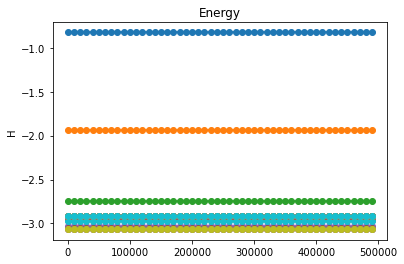

In [43]:
plt.figure()
for ene in ene_arr:
    for e in ene:
        print(e)
    plt.title("Energy")
    plt.ylabel("H")
    plt.errorbar(range(0, 10000*ene.shape[0], 10000), [e.mean / 51 for e in ene], yerr = [e.errorbar / 51 for e in ene], fmt='o-')

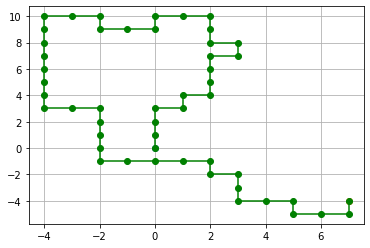

In [24]:
file_name = 'Conformations\\struct_conf_0.dat'
struct_1 = read_conformation(file_name)
draw_conformation(struct_1)

In [25]:
len(struct_1)

50

In [ ]:
N = 10# number of measurments
beta_max = 1
ene = np.empty(N, dtype = RealObservable)
mag2 = np.empty(N, dtype = RealObservable)
mag4 = np.empty(N, dtype = RealObservable)

neighbors = tabulate_neighbors(struct_1)
L = len(struct_1)
betas = np.linspace(beta_max/N, beta_max, N)


for i in range(N):
    ene[i], mag2[i], mag4[i] = cy_ising.simulate(L = L, neighbors = neighbors, beta=betas[N//2], num_sweeps=50000*(i+1))

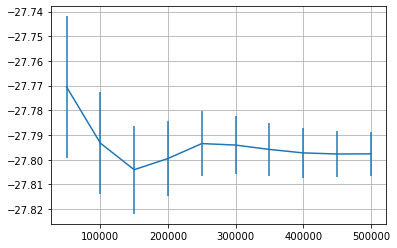

In [11]:
plt.figure()
plt.errorbar(list(range(50000, 50000 * N + 1, 50000)), [e.mean for e in ene], yerr = [e.errorbar for e in ene])
plt.grid(True)
plt.show()

In [26]:
N = 10# number of measurments
beta_max = 1
ene = np.empty(N, dtype=RealObservable)
mag2 = np.empty(N, dtype=RealObservable)
mag4 = np.empty(N, dtype=RealObservable)

neighbors = tabulate_neighbors(struct_1)
L = len(struct_1)
betas = np.linspace(beta_max/N, beta_max, N)


for i in range(N):
    ene[i], mag2[i], mag4[i] = cy_ising.simulate(L = L, neighbors = neighbors, beta=betas[i], num_sweeps=100000)

[[ 2  1 37  0  0]
 [ 2  2  0  0  0]
 [ 2  3  1  0  0]
 [ 2  4  2  0  0]
 [ 2  3  5  0  0]
 [ 2  6  4  0  0]
 [ 2  5  7  0  0]
 [ 2  8  6  0  0]
 [ 2  9  7  0  0]
 [ 3 10 12  8  0]
 [ 2  9 11  0  0]
 [ 2 12 10  0  0]
 [ 3 11 13  9  0]
 [ 2 14 12  0  0]
 [ 2 15 13  0  0]
 [ 2 14 16  0  0]
 [ 2 15 17  0  0]
 [ 2 18 16  0  0]
 [ 2 17 19  0  0]
 [ 2 18 20  0  0]
 [ 2 21 19  0  0]
 [ 2 20 22  0  0]
 [ 2 21 23  0  0]
 [ 2 22 24  0  0]
 [ 2 23 25  0  0]
 [ 2 24 26  0  0]
 [ 2 25 27  0  0]
 [ 2 26 28  0  0]
 [ 2 27 29  0  0]
 [ 2 30 28  0  0]
 [ 2 31 29  0  0]
 [ 2 30 32  0  0]
 [ 2 31 33  0  0]
 [ 2 32 34  0  0]
 [ 2 33 35  0  0]
 [ 2 36 34  0  0]
 [ 2 37 35  0  0]
 [ 3 38 36  0  0]
 [ 2 39 37  0  0]
 [ 2 38 40  0  0]
 [ 2 41 39  0  0]
 [ 2 40 42  0  0]
 [ 2 41 43  0  0]
 [ 2 44 42  0  0]
 [ 2 45 43  0  0]
 [ 2 44 46  0  0]
 [ 2 47 45  0  0]
 [ 2 48 46  0  0]
 [ 2 47 49  0  0]
 [ 1 48  0  0  0]]
beta =  0.1   T =  10.0
initial config:  [ 1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1 

      =  -10.082804361979168 +/- 0.032755396527912144
  mag^2 =  0.03008440755208333 +/- 0.0001810257646154695
  mag^4 =  0.002677093177083334 +/- 3.734714455259902e-05

----- sweep =  60000 spins =  [ 1  1 -1  1 -1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1
  1  1 -1  1 -1 -1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1
 -1  1] beta =  0.2
  ene =  -10.063782270295494  (naive)
      =  -10.078543526785717 +/- 0.02964864523539929
  mag^2 =  0.030046763392857154 +/- 0.00016414195449731707
  mag^4 =  0.002663062857142857 +/- 3.521847436948498e-05

----- sweep =  70000 spins =  [-1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1 -1 -1  1
  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1  1
  1 -1] beta =  0.2
  ene =  -10.073441807974172  (naive)
      =  -10.070025275735293 +/- 0.030635670727673717
  mag^2 =  0.029998851102941187 +/- 0.0001519429285650449
  mag^4 =  0.0026442634558823536 +/- 3.232850676281731e-05

----- sweep =  8000


----- sweep =  20000 spins =  [-1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1 -1  1  1  1  1 -1  1  1 -1  1  1
  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1
  1  1] beta =  0.4
  ene =  -19.531173441327933  (naive)
      =  -19.52405427631579 +/- 0.046770339657319776
  mag^2 =  0.04595929276315789 +/- 0.0005296633936725659
  mag^4 =  0.0060913122368421065 +/- 0.00014651533728212468

----- sweep =  30000 spins =  [ 1 -1 -1 -1  1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1 -1
  1  1] beta =  0.4
  ene =  -19.520915969467683  (naive)
      =  -19.526088169642854 +/- 0.03843783749012894
  mag^2 =  0.04600697544642857 +/- 0.00041966228885763384
  mag^4 =  0.006095650446428571 +/- 0.0001239818606659705

----- sweep =  40000 spins =  [ 1 -1  1 -1 -1 -1 -1  1 -1  1 -1  1  1  1  1  1 -1 -1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1
  1  1] beta =


Final:
  ene =  -23.85456  (naive)
      =  -23.854187011718754 +/- 0.020254222647645623
  mag^2 =  0.05690193684895834 +/- 0.0003112511152110075
  mag^4 =  0.009176500911458335 +/- 8.721873819516034e-05
[[ 2  1 37  0  0]
 [ 2  2  0  0  0]
 [ 2  3  1  0  0]
 [ 2  4  2  0  0]
 [ 2  3  5  0  0]
 [ 2  6  4  0  0]
 [ 2  5  7  0  0]
 [ 2  8  6  0  0]
 [ 2  9  7  0  0]
 [ 3 10 12  8  0]
 [ 2  9 11  0  0]
 [ 2 12 10  0  0]
 [ 3 11 13  9  0]
 [ 2 14 12  0  0]
 [ 2 15 13  0  0]
 [ 2 14 16  0  0]
 [ 2 15 17  0  0]
 [ 2 18 16  0  0]
 [ 2 17 19  0  0]
 [ 2 18 20  0  0]
 [ 2 21 19  0  0]
 [ 2 20 22  0  0]
 [ 2 21 23  0  0]
 [ 2 22 24  0  0]
 [ 2 23 25  0  0]
 [ 2 24 26  0  0]
 [ 2 25 27  0  0]
 [ 2 26 28  0  0]
 [ 2 27 29  0  0]
 [ 2 30 28  0  0]
 [ 2 31 29  0  0]
 [ 2 30 32  0  0]
 [ 2 31 33  0  0]
 [ 2 32 34  0  0]
 [ 2 33 35  0  0]
 [ 2 36 34  0  0]
 [ 2 37 35  0  0]
 [ 3 38 36  0  0]
 [ 2 39 37  0  0]
 [ 2 38 40  0  0]
 [ 2 41 39  0  0]
 [ 2 40 42  0  0]
 [ 2 41 43  0  0]
 [ 2 44 42  0  0]
 [ 


----- sweep =  70000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1 -1 -1  1  1
 -1 -1] beta =  0.7000000000000001
  ene =  -31.259567720461135  (naive)
      =  -31.260139016544123 +/- 0.02678801780161506
  mag^2 =  0.08717543658088235 +/- 0.00044729408621042225
  mag^4 =  0.020741657316176478 +/- 0.00022433862977098377

----- sweep =  80000 spins =  [ 1  1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1  1
 -1 -1 -1 -1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1 -1
 -1  1] beta =  0.7000000000000001
  ene =  -31.257446781915228  (naive)
      =  -31.26025390625 +/- 0.023979368963671265
  mag^2 =  0.08728766447368423 +/- 0.00042064206519845535
  mag^4 =  0.020776345657894737 +/- 0.00020864953715116953

----- sweep =  90000 spins =  [ 1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  


----- sweep =  30000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1] beta =  0.9
  ene =  -37.049265024499185  (naive)
      =  -37.05419921875 +/- 0.02979107743977379
  mag^2 =  0.13397767857142856 +/- 0.00117038359527929
  mag^4 =  0.04621893785714285 +/- 0.0006591655635164619

----- sweep =  40000 spins =  [-1 -1 -1  1  1 -1 -1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1
  1  1] beta =  0.9
  ene =  -37.060248493787654  (naive)
      =  -37.0615234375 +/- 0.025527255551618885
  mag^2 =  0.13423893914473686 +/- 0.0009169519693070916
  mag^4 =  0.04621036861842105 +/- 0.0005662589476783001

----- sweep =  50000 spins =  [ 1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1] beta =  0.9
  ene =  

In [27]:
from numpy import tanh

In [28]:
%matplotlib notebook

<IPython.core.display.Javascript object>


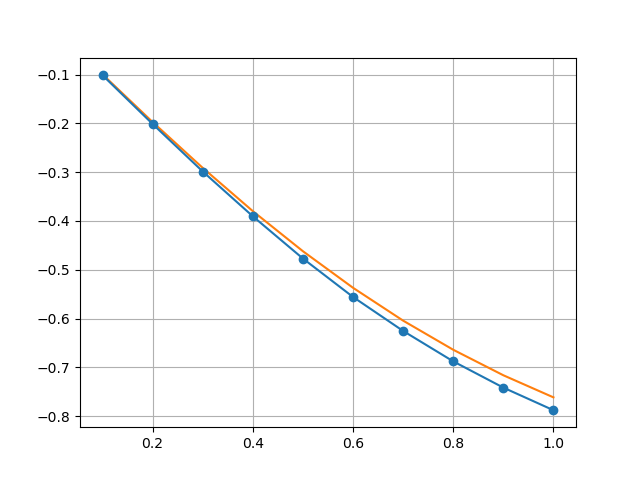

In [29]:
plt.figure()
plt.errorbar(betas, [e.mean / L for e in ene], yerr = [e.errorbar / L for e in ene], fmt='o-')
th = tanh(betas)
plt.plot(betas, -th * (1 + th**(L-2)) / (1 + th**L))
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


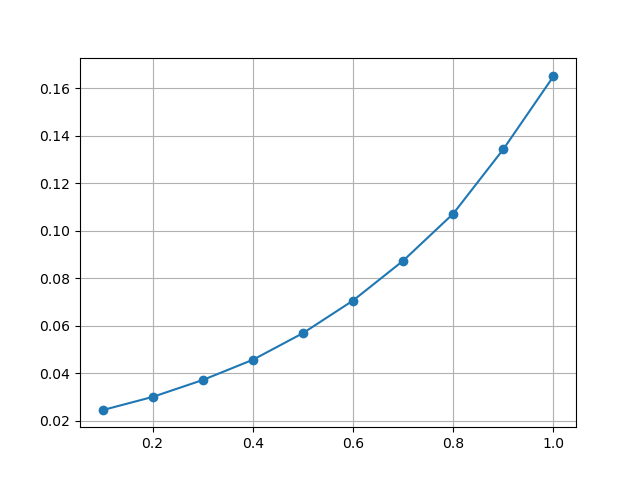

In [30]:
plt.figure()
plt.errorbar(betas, [m.mean for m in mag2], yerr = [m.errorbar for m in mag2], fmt='o-')
plt.grid(True)
plt.show()

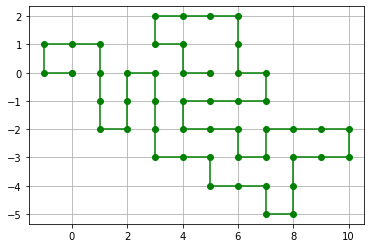

In [19]:
file_name = 'Conformations\\struct_conf_1.dat'
struct_2 = read_conformation(file_name)
draw_conformation(struct_2)

In [20]:
N = 10# number of measurments
beta_max = 1
ene = np.empty(N, dtype=RealObservable)
mag2 = np.empty(N, dtype=RealObservable)
mag4 = np.empty(N, dtype=RealObservable)

neighbors = tabulate_neighbors(struct_2)
L = len(struct_2)
betas = np.linspace(beta_max/N, beta_max, N)


for i in range(N):
    ene[i], mag2[i], mag4[i] = cy_ising.simulate(L = L, neighbors = neighbors, beta=betas[i], num_sweeps=500000)

[[ 3  5  1  3  0]
 [ 2  0  2  0  0]
 [ 2  3  1  0  0]
 [ 3  4  2  0  0]
 [ 2  3  5  0  0]
 [ 4 10  0  4  6]
 [ 3  9  5  7  0]
 [ 2  8  6  0  0]
 [ 3 13  7  9  0]
 [ 4 12  6 10  8]
 [ 3 11  5  9  0]
 [ 4 48 10 46 12]
 [ 4 35  9 11 13]
 [ 4 34  8 12 14]
 [ 2 15 13  0  0]
 [ 3 16 14 34  0]
 [ 4 31 15 33 17]
 [ 2 18 16  0  0]
 [ 3 19 17 31  0]
 [ 4 22 18 30 20]
 [ 2 21 19  0  0]
 [ 2 20 22  0  0]
 [ 3 19 23 21  0]
 [ 4 24 30 28 22]
 [ 3 25 23 27  0]
 [ 2 24 26  0  0]
 [ 2 27 25  0  0]
 [ 3 26 28 24  0]
 [ 3 27 29 23  0]
 [ 4 28 32 38 30]
 [ 4 23 31 29 19]
 [ 4 30 16 32 18]
 [ 4 29 33 37 31]
 [ 4 32 34 36 16]
 [ 4 33 13 35 15]
 [ 4 36 12 48 34]
 [ 4 37 35 49 33]
 [ 4 38 36 40 32]
 [ 3 37 39 29  0]
 [ 2 40 38  0  0]
 [ 4 39 49 41 37]
 [ 2 42 40  0  0]
 [ 2 43 41  0  0]
 [ 2 42 44  0  0]
 [ 3 43 45 47  0]
 [ 2 44 46  0  0]
 [ 3 47 45 11  0]
 [ 3 46 44 48  0]
 [ 4 49 11 47 35]
 [ 3 40 48 36  0]]
beta =  0.1   T =  10.0
initial config:  [ 1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1 


----- sweep =  200000 spins =  [ 1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1
 -1  1 -1 -1  1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1  1 -1  1  1
  1 -1] beta =  0.1
  ene =  -7.812545937270314  (naive)
      =  -7.810791015624999 +/- 0.021011918287393412
  mag^2 =  0.02798731282552084 +/- 8.833132736319676e-05
  mag^4 =  0.002289825950520832 +/- 1.5995972923427365e-05

----- sweep =  210000 spins =  [-1 -1 -1  1  1  1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1
  1 -1 -1  1  1 -1  1 -1 -1  1  1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1] beta =  0.1
  ene =  -7.802862843510269  (naive)
      =  -7.810791015624999 +/- 0.021011918287393412
  mag^2 =  0.02798731282552084 +/- 8.680018308734331e-05
  mag^4 =  0.002289825950520832 +/- 1.5527570911619394e-05

----- sweep =  220000 spins =  [-1 -1  1  1  1  1 -1  1 -1 -1  1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1
  1 -1] beta =


----- sweep =  440000 spins =  [ 1  1 -1 -1  1  1  1 -1  1  1  1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1
 -1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1  1  1 -1  1  1  1
  1 -1] beta =  0.1
  ene =  -7.798266367576438  (naive)
      =  -7.796062762920674 +/- 0.01498213964329911
  mag^2 =  0.028024357722355762 +/- 6.058386726553624e-05
  mag^4 =  0.0022936808713942287 +/- 1.0749815804214552e-05

----- sweep =  450000 spins =  [-1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1  1 -1 -1 -1 -1  1  1
  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1
 -1  1] beta =  0.1
  ene =  -7.795522676616274  (naive)
      =  -7.796062762920674 +/- 0.01498213964329911
  mag^2 =  0.028024357722355762 +/- 6.058386726553624e-05
  mag^4 =  0.0022936808713942287 +/- 1.0730709799070625e-05

----- sweep =  460000 spins =  [ 1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1
 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1
 -1  1] beta


----- sweep =  130000 spins =  [ 1 -1  1 -1  1  1  1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1
  1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1  1  1  1  1  1 -1 -1  1 -1  1  1 -1
 -1  1] beta =  0.2
  ene =  -16.061145683494743  (naive)
      =  -16.050358072916666 +/- 0.026561396060113755
  mag^2 =  0.04210832031250002 +/- 0.0001755077911008538
  mag^4 =  0.005022323062499999 +/- 4.382914914661313e-05

----- sweep =  140000 spins =  [-1  1 -1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1
 -1  1  1  1  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1
 -1 -1] beta =  0.2
  ene =  -16.067163805972815  (naive)
      =  -16.066506778492645 +/- 0.02542610635670117
  mag^2 =  0.042188361672794134 +/- 0.00016451174742185336
  mag^4 =  0.005032773143382351 +/- 4.174498127661933e-05

----- sweep =  150000 spins =  [-1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1 -1 -1  1 -1  1  1 -1  1
 -1  1  1 -1  1 -1 -1  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1  1  1
 -1  1] bet


----- sweep =  360000 spins =  [-1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1  1
  1 -1] beta =  0.2
  ene =  -16.07384701709162  (naive)
      =  -16.07748413085937 +/- 0.0172380851737502
  mag^2 =  0.04211108886718747 +/- 9.918945877735235e-05
  mag^4 =  0.0050284262734375 +/- 2.6633930507341972e-05

----- sweep =  370000 spins =  [-1  1  1  1  1  1 -1 -1 -1 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1  1  1  1
 -1 -1  1  1  1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1
  1 -1] beta =  0.2
  ene =  -16.074337636925307  (naive)
      =  -16.074018998579547 +/- 0.0172380851737502
  mag^2 =  0.04209583185369315 +/- 9.818942603405179e-05
  mag^4 =  0.005026064836647729 +/- 2.6254300302561216e-05

----- sweep =  380000 spins =  [-1 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1  1  1  1  1  1  1  1
  1 -1] beta =  0.


----- sweep =  50000 spins =  [ 1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1 -1  1  1 -1  1  1  1  1  1 -1  1  1 -1  1 -1  1 -1  1  1  1  1  1  1
  1  1] beta =  0.30000000000000004
  ene =  -25.212115757684845  (naive)
      =  -25.213134765625004 +/- 0.06143332581441588
  mag^2 =  0.07000172526041668 +/- 0.0005150262313185273
  mag^4 =  0.01298866088541667 +/- 0.0001717496789484859

----- sweep =  60000 spins =  [-1  1  1 -1 -1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1
 -1 -1] beta =  0.30000000000000004
  ene =  -25.240229329511173  (naive)
      =  -25.22715541294643 +/- 0.05423347597435916
  mag^2 =  0.07002667410714286 +/- 0.0004668190298406005
  mag^4 =  0.01299243017857143 +/- 0.00016249267772006112

----- sweep =  70000 spins =  [-1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1
  1 -1 -1 -1  1 -1 -1 -1  1  1 -1  1  1  1 -1  1  1  1  1  1


----- sweep =  260000 spins =  [-1  1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1  1
  1  1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1
 -1 -1] beta =  0.30000000000000004
  ene =  -25.311083418909927  (naive)
      =  -25.3066162109375 +/- 0.025644398198540377
  mag^2 =  0.07051074218749998 +/- 0.00022038169752072034
  mag^4 =  0.013254980312500003 +/- 0.00010648060179602294

----- sweep =  270000 spins =  [ 1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1
 -1  1  1 -1  1  1 -1  1 -1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1
  1  1] beta =  0.30000000000000004
  ene =  -25.308606264421243  (naive)
      =  -25.312591552734375 +/- 0.024727976396627688
  mag^2 =  0.07050074462890622 +/- 0.00020269959844948374
  mag^4 =  0.01325864533203125 +/- 9.322098746233121e-05

----- sweep =  280000 spins =  [-1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1 -1  1
 -1 -1  1  1  1 -1  1  1 -1  1 -1 -1  1  1  1  1  1  


----- sweep =  470000 spins =  [-1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1 -1  1  1
  1  1] beta =  0.30000000000000004
  ene =  -25.32322484420246  (naive)
      =  -25.32144601004464 +/- 0.01683918252978939
  mag^2 =  0.07047608468191957 +/- 0.0001430335012960084
  mag^4 =  0.013245273387276787 +/- 6.287660254238792e-05

----- sweep =  480000 spins =  [-1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1 -1 -1  1 -1 -1  1 -1 -1
 -1  1 -1 -1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1
  1  1] beta =  0.30000000000000004
  ene =  -25.32229516188508  (naive)
      =  -25.32144601004464 +/- 0.016403828193947756
  mag^2 =  0.07047608468191957 +/- 0.00014056818573103617
  mag^4 =  0.013245273387276787 +/- 6.287660254238792e-05

----- sweep =  490000 spins =  [-1 -1 -1 -1  1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1  1  1  1 -1  1  1  1
  1  1  1 -1  1  1  1  1  1 -1 -1  1  1  1  1  1  1 -1  1


----- sweep =  160000 spins =  [ 1  1  1  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1
  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1] beta =  0.4
  ene =  -35.954406534959155  (naive)
      =  -35.95040090460527 +/- 0.026563512738319837
  mag^2 =  0.13395039062499994 +/- 0.00038896864339508814
  mag^4 =  0.04073273095394736 +/- 0.00020963587209492368

----- sweep =  170000 spins =  [ 1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1  1  1  1
  1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1 -1
  1 -1] beta =  0.4
  ene =  -35.95107675837201  (naive)
      =  -35.952258300781246 +/- 0.02587561050088435
  mag^2 =  0.13393979492187497 +/- 0.0003768294432572296
  mag^4 =  0.04073749085937499 +/- 0.00020456078065864676

----- sweep =  180000 spins =  [ 1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1
 -1 -1 -1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1
 -1 -1] beta =


----- sweep =  370000 spins =  [ 1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1] beta =  0.4
  ene =  -35.92827316682928  (naive)
      =  -35.92536510120739 +/- 0.01828579748455643
  mag^2 =  0.13371936257102274 +/- 0.00025272028814239255
  mag^4 =  0.040697514048295434 +/- 0.00014012061859073962

----- sweep =  380000 spins =  [ 1 -1  1  1  1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1  1  1 -1
  1 -1] beta =  0.4
  ene =  -35.93266596666851  (naive)
      =  -35.92536510120739 +/- 0.01828579748455643
  mag^2 =  0.13371936257102274 +/- 0.00025272028814239255
  mag^4 =  0.040697514048295434 +/- 0.00013895376089435974

----- sweep =  390000 spins =  [ 1  1  1 -1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1
 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1  1  1
  1  1] beta =


----- sweep =  70000 spins =  [-1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1  1  1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1 -1  1
 -1 -1] beta =  0.5
  ene =  -47.50007857030614  (naive)
      =  -47.502814797794116 +/- 0.0460966537353696
  mag^2 =  0.2639382123161764 +/- 0.0010673723629916817
  mag^4 =  0.12254447466911762 +/- 0.0008109214878448269

----- sweep =  80000 spins =  [-1 -1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1] beta =  0.5
  ene =  -47.509743628204646  (naive)
      =  -47.511770148026315 +/- 0.04151148163785495
  mag^2 =  0.2639722245065789 +/- 0.0009559610185836779
  mag^4 =  0.12271650411184208 +/- 0.0007218153743565914

----- sweep =  90000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1] beta =  0.5
  e


----- sweep =  290000 spins =  [-1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1
 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1] beta =  0.5
  ene =  -47.51290167964938  (naive)
      =  -47.51962459788603 +/- 0.02299915126808791
  mag^2 =  0.26393390395220584 +/- 0.0005678275349143413
  mag^4 =  0.12252629759191178 +/- 0.00036141938864341246

----- sweep =  300000 spins =  [ 1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1
 -1 -1] beta =  0.5
  ene =  -47.511004963316786  (naive)
      =  -47.513712565104164 +/- 0.02246843254980288
  mag^2 =  0.2638881022135417 +/- 0.0005381256054686356
  mag^4 =  0.12241911190104166 +/- 0.0003549640015340614

----- sweep =  310000 spins =  [ 1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1  1  1
 -1 -1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1] beta =  0.


Final:
  ene =  -47.494732  (naive)
      =  -47.49578043619792 +/- 0.01717174432333256
  mag^2 =  0.26366983072916655 +/- 0.0003807769757603799
  mag^4 =  0.12217427704166664 +/- 0.00027567150165863803
[[ 3  5  1  3  0]
 [ 2  0  2  0  0]
 [ 2  3  1  0  0]
 [ 3  4  2  0  0]
 [ 2  3  5  0  0]
 [ 4 10  0  4  6]
 [ 3  9  5  7  0]
 [ 2  8  6  0  0]
 [ 3 13  7  9  0]
 [ 4 12  6 10  8]
 [ 3 11  5  9  0]
 [ 4 48 10 46 12]
 [ 4 35  9 11 13]
 [ 4 34  8 12 14]
 [ 2 15 13  0  0]
 [ 3 16 14 34  0]
 [ 4 31 15 33 17]
 [ 2 18 16  0  0]
 [ 3 19 17 31  0]
 [ 4 22 18 30 20]
 [ 2 21 19  0  0]
 [ 2 20 22  0  0]
 [ 3 19 23 21  0]
 [ 4 24 30 28 22]
 [ 3 25 23 27  0]
 [ 2 24 26  0  0]
 [ 2 27 25  0  0]
 [ 3 26 28 24  0]
 [ 3 27 29 23  0]
 [ 4 28 32 38 30]
 [ 4 23 31 29 19]
 [ 4 30 16 32 18]
 [ 4 29 33 37 31]
 [ 4 32 34 36 16]
 [ 4 33 13 35 15]
 [ 4 36 12 48 34]
 [ 4 37 35 49 33]
 [ 4 38 36 40 32]
 [ 3 37 39 29  0]
 [ 2 40 38  0  0]
 [ 4 39 49 41 37]
 [ 2 42 40  0  0]
 [ 2 43 41  0  0]
 [ 2 42 44  0  0]
 [ 3


----- sweep =  180000 spins =  [-1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1] beta =  0.6
  ene =  -57.94265031860934  (naive)
      =  -57.95262451171875 +/- 0.026892001086543164
  mag^2 =  0.45408093750000006 +/- 0.0007896279636631959
  mag^4 =  0.2821423629375 +/- 0.0007030367287254169

----- sweep =  190000 spins =  [-1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1
 -1 -1] beta =  0.6
  ene =  -57.93220561997042  (naive)
      =  -57.94216086647727 +/- 0.025836197671187888
  mag^2 =  0.45405610795454543 +/- 0.0007585358492616177
  mag^4 =  0.28210174778409086 +/- 0.0006847016368284663

----- sweep =  200000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1
 -1 -1] beta =  0.6
  


----- sweep =  400000 spins =  [-1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1
  1  1] beta =  0.6
  ene =  -57.95874260314349  (naive)
      =  -57.96047973632812 +/- 0.01685897555305225
  mag^2 =  0.45477836100260444 +/- 0.0005080863760372584
  mag^4 =  0.282759245299479 +/- 0.00046334978858784904

----- sweep =  410000 spins =  [ 1  1  1  1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1
  1  1 -1 -1 -1  1  1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1
  1  1] beta =  0.6
  ene =  -57.9584903451455  (naive)
      =  -57.96047973632812 +/- 0.016593311260104947
  mag^2 =  0.45477836100260444 +/- 0.0005011464451827863
  mag^4 =  0.282759245299479 +/- 0.0004558529780278586

----- sweep =  420000 spins =  [-1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1
  1  1] beta =  0.6
  e


----- sweep =  80000 spins =  [ 1  1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1] beta =  0.7000000000000001
  ene =  -65.3596455044312  (naive)
      =  -65.36651932565789 +/- 0.038700004071715345
  mag^2 =  0.6369982113486842 +/- 0.0014674532736196695
  mag^4 =  0.47608266476973676 +/- 0.0014881152284092535

----- sweep =  90000 spins =  [ 1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1] beta =  0.7000000000000001
  ene =  -65.34755169387007  (naive)
      =  -65.36396484375 +/- 0.03602444952336911
  mag^2 =  0.6368250976562501 +/- 0.001519759503272275
  mag^4 =  0.47591695178125 +/- 0.0015569907942146498

----- sweep =  100000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1
  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 


----- sweep =  290000 spins =  [ 1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1
  1  1] beta =  0.7000000000000001
  ene =  -65.41390202102751  (naive)
      =  -65.41025677849265 +/- 0.018102701210073936
  mag^2 =  0.6378518841911767 +/- 0.0007060766685495726
  mag^4 =  0.47681601106617627 +/- 0.0007787451210801743

----- sweep =  300000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1
  1  1] beta =  0.7000000000000001
  ene =  -65.41027863240456  (naive)
      =  -65.41484917534721 +/- 0.01799427843819416
  mag^2 =  0.6381616427951392 +/- 0.0007233111082144018
  mag^4 =  0.47710756435763874 +/- 0.0007918919671075767

----- sweep =  310000 spins =  [-1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 


----- sweep =  490000 spins =  [ 1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1] beta =  0.7000000000000001
  ene =  -65.40286448395003  (naive)
      =  -65.4062979561942 +/- 0.014391966753518408
  mag^2 =  0.6377966692243312 +/- 0.0005308396750214561
  mag^4 =  0.4767005558984374 +/- 0.0005703415256063207

Final:
  ene =  -65.405876  (naive)
      =  -65.40416259765625 +/- 0.014003140257254512
  mag^2 =  0.6378376041666675 +/- 0.0005293232911281832
  mag^4 =  0.4766701892916666 +/- 0.0005650585118420569
[[ 3  5  1  3  0]
 [ 2  0  2  0  0]
 [ 2  3  1  0  0]
 [ 3  4  2  0  0]
 [ 2  3  5  0  0]
 [ 4 10  0  4  6]
 [ 3  9  5  7  0]
 [ 2  8  6  0  0]
 [ 3 13  7  9  0]
 [ 4 12  6 10  8]
 [ 3 11  5  9  0]
 [ 4 48 10 46 12]
 [ 4 35  9 11 13]
 [ 4 34  8 12 14]
 [ 2 15 13  0  0]
 [ 3 16 14 34  0]
 [ 4 31 15 33 17]
 [ 2 18 16  0  0]
 [ 3 19 17 31  0]
 [ 4 22 18 30 20]
 [ 2 21 19  0  0]
 [ 2 2

----- sweep =  170000 spins =  [ 1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1] beta =  0.8
  ene =  -69.96187669484297  (naive)
      =  -69.96185302734375 +/- 0.017949715151130908
  mag^2 =  0.7695622851562501 +/- 0.0008161215222158465
  mag^4 =  0.6421364183437499 +/- 0.0009586104502617977

----- sweep =  180000 spins =  [ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1] beta =  0.8
  ene =  -69.95935022583208  (naive)
      =  -69.96185302734375 +/- 0.0171764056034816
  mag^2 =  0.7695622851562501 +/- 0.000799711927369518
  mag^4 =  0.6421364183437499 +/- 0.0009333290983160958

----- sweep =  190000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1
 -1 -1] beta =  0.8
  ene 

  ene =  -69.97687441827073  (naive)
      =  -69.97775545987216 +/- 0.01189946879019342
  mag^2 =  0.77022128018466 +/- 0.0005149074554318667
  mag^4 =  0.6429652877414772 +/- 0.0006161405149259

----- sweep =  400000 spins =  [ 1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1] beta =  0.8
  ene =  -69.9773625565936  (naive)
      =  -69.9783935546875 +/- 0.011651801563494017
  mag^2 =  0.7702146443684904 +/- 0.0005139129214050617
  mag^4 =  0.6429839813216145 +/- 0.0006175125745276132

----- sweep =  410000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1
 -1 -1] beta =  0.8
  ene =  -69.9747195738547  (naive)
      =  -69.9783935546875 +/- 0.01143836371676254
  mag^2 =  0.7702146443684904 +/- 0.0005059153476190797
  mag^4 =  0.6429839813216145 +/- 0.0006078129766722623

----- sw


----- sweep =  110000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1
  1  1] beta =  0.9
  ene =  -72.67185752856793  (naive)
      =  -72.677001953125 +/- 0.016501590550667043
  mag^2 =  0.8546211838942309 +/- 0.000785000263533579
  mag^4 =  0.7632681922596154 +/- 0.001169565275909939

----- sweep =  120000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1] beta =  0.9
  ene =  -72.68516929025591  (naive)
      =  -72.67342703683036 +/- 0.016397931782864122
  mag^2 =  0.8543350306919644 +/- 0.0007793407737602326
  mag^4 =  0.76292196265625 +/- 0.0011361173020560166

----- sweep =  130000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1] beta =  0.9
  ene = 

 -1 -1] beta =  0.9
  ene =  -72.69797861672606  (naive)
      =  -72.69619750976562 +/- 0.008733876278020698
  mag^2 =  0.8553468652343756 +/- 0.0003997288019926564
  mag^4 =  0.764234979546875 +/- 0.0005432584687842496

----- sweep =  370000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1] beta =  0.9
  ene =  -72.69783324909933  (naive)
      =  -72.69782049005681 +/- 0.0085841263408062
  mag^2 =  0.8553398526278417 +/- 0.0003954880055454678
  mag^4 =  0.7642615975710227 +/- 0.0005367266813256126

----- sweep =  380000 spins =  [ 1  1  1  1  1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1] beta =  0.9
  ene =  -72.69618501003944  (naive)
      =  -72.69782049005681 +/- 0.008418439025019223
  mag^2 =  0.8553398526278417 +/- 0.0003931013171600266
  mag^4 =  0.7642615975710227 +/- 0.0


----- sweep =  60000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1
 -1 -1] beta =  1.0
  ene =  -74.33267778870352  (naive)
      =  -74.33489118303572 +/- 0.01816291888021512
  mag^2 =  0.9091561383928568 +/- 0.0008049772669683826
  mag^4 =  0.8469148126785714 +/- 0.001164460883914604

----- sweep =  70000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1] beta =  1.0
  ene =  -74.3364666219054  (naive)
      =  -74.33444393382352 +/- 0.016013834260086113
  mag^2 =  0.9091559512867646 +/- 0.0007717086760633635
  mag^4 =  0.8470077774632354 +/- 0.001102463257966539

----- sweep =  80000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1
  1  1] beta =  1.0
  ene =  


----- sweep =  280000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1] beta =  1.0
  ene =  -74.32199527858829  (naive)
      =  -74.3231632008272 +/- 0.007673256455566662
  mag^2 =  0.9083589326746327 +/- 0.00039437323440346013
  mag^4 =  0.8459567208363967 +/- 0.0005600354813304978

----- sweep =  290000 spins =  [-1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1] beta =  1.0
  ene =  -74.32215406153772  (naive)
      =  -74.3231632008272 +/- 0.0076757081162244275
  mag^2 =  0.9083589326746327 +/- 0.00039437323440346013
  mag^4 =  0.8459567208363967 +/- 0.0005600354813304978

----- sweep =  300000 spins =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1] beta =  1.0
  ene =  -74.32076226412579  (naive)
      =  -74.32

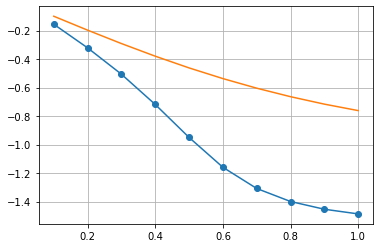

In [21]:
plt.figure()
plt.errorbar(betas, [e.mean / L for e in ene], yerr = [e.errorbar / L for e in ene], fmt='o-')
th = tanh(betas)
plt.plot(betas, -th * (1 + th**(L-2)) / (1 + th**L))
plt.grid(True)
plt.show()

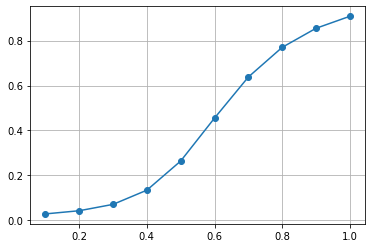

In [23]:
plt.figure()
plt.errorbar(betas, [m.mean for m in mag2], yerr = [m.errorbar for m in mag2], fmt='o-')
plt.grid(True)
plt.show()

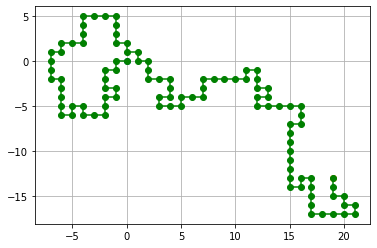

In [7]:
file_name = 'Conformations\\struct_conf_01.dat'
struct_2 = read_conformation(file_name)
draw_conformation(struct_2)

In [8]:
N = 10# number of measurments
beta_max = 1
ene = np.empty(N, dtype=RealObservable)
mag2 = np.empty(N, dtype=RealObservable)
mag4 = np.empty(N, dtype=RealObservable)

neighbors = tabulate_neighbors(struct_2)
L = len(struct_2)
betas = np.linspace(beta_max/N, beta_max, N)


for i in range(N):
    ene[i], mag2[i], mag4[i] = cy_ising.simulate(L = L, neighbors = neighbors, beta=betas[i], num_sweeps=500000)

[[  3  41   1  39   0]
 [  2   0   2   0   0]
 [  2   3   1   0   0]
 [  2   2   4   0   0]
 [  2   3   5   0   0]
 [  3   6   4   8   0]
 [  2   5   7   0   0]
 [  2   8   6   0   0]
 [  3   7   5   9   0]
 [  2   8  10   0   0]
 [  2  11   9   0   0]
 [  2  10  12   0   0]
 [  3  11  15  13   0]
 [  2  14  12   0   0]
 [  3  13  17  15   0]
 [  3  12  16  14   0]
 [  2  15  17   0   0]
 [  3  14  18  16   0]
 [  2  19  17   0   0]
 [  2  20  18   0   0]
 [  2  21  19   0   0]
 [  2  20  22   0   0]
 [  2  23  21   0   0]
 [  2  24  22   0   0]
 [  2  25  23   0   0]
 [  2  24  26   0   0]
 [  2  27  25   0   0]
 [  2  28  26   0   0]
 [  2  27  29   0   0]
 [  2  30  28   0   0]
 [  2  31  29   0   0]
 [  2  32  30   0   0]
 [  2  33  31   0   0]
 [  2  34  32   0   0]
 [  2  33  35   0   0]
 [  2  34  36   0   0]
 [  2  35  37   0   0]
 [  2  38  36   0   0]
 [  2  37  39   0   0]
 [  3  40  38   0   0]
 [  2  39  41   0   0]
 [  3  42   0  40   0]
 [  2  41  43   0   0]
 [  2  42  


----- sweep =  110000 spins =  [-1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1
  1  1 -1 -1  1  1  1 -1  1  1  1 -1  1 -1 -1  1  1  1  1 -1 -1  1  1  1
  1  1 -1 -1  1  1  1 -1  1 -1  1  1  1  1 -1  1 -1 -1  1  1  1  1  1  1
  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1 -1 -1 -1] beta =  0.1
  ene =  -11.288851919528005  (naive)
      =  -11.284836989182692 +/- 0.03264242392038387
  mag^2 =  0.012369867761362006 +/- 5.1184463011987105e-05
  mag^4 =  0.00045824327369357133 +/- 5.168232360427386e-06

----- sweep =  120000 spins =  [ 1  1 -1 -1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1
 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1
  1  1 -1 -1  1 -1 -1  1  1  1  1  1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1  1 -1 -1  1  1  1 -1
  1  1  1 -1 -1] beta =  0.1
  ene =  -11.275614369880252  (naive)
      =  -11.284075055803571 +/- 0.03085221957


----- sweep =  270000 spins =  [-1  1 -1 -1  1  1  1  1  1 -1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1  1  1  1
 -1  1  1 -1 -1 -1  1  1 -1  1  1  1 -1 -1  1  1 -1 -1 -1  1 -1  1  1  1
 -1  1  1 -1 -1  1  1 -1 -1  1  1  1 -1  1  1 -1  1  1 -1 -1 -1  1 -1 -1
  1  1  1  1  1  1  1  1 -1  1  1  1 -1 -1  1 -1 -1 -1  1  1  1  1  1  1
  1 -1 -1 -1  1] beta =  0.1
  ene =  -11.291198921485476  (naive)
      =  -11.286575317382812 +/- 0.019940239493524643
  mag^2 =  0.012406366290490814 +/- 3.583410117205397e-05
  mag^4 =  0.000458872273616291 +/- 3.114645459272168e-06

----- sweep =  280000 spins =  [-1  1 -1  1  1  1 -1  1 -1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1 -1
 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
 -1 -1  1  1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1 -1
 -1  1  1  1  1  1  1 -1  1 -1 -1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1  1
 -1  1  1  1  1] beta =  0.1
  ene =  -11.29254181235067  (naive)
      =  -11.292782054227942 +/- 0.01953101917252


----- sweep =  450000 spins =  [ 1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1
  1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1  1 -1
 -1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1  1  1  1
  1 -1 -1  1  1] beta =  0.1
  ene =  -11.285092699794001  (naive)
      =  -11.283738356370193 +/- 0.015686623869286133
  mag^2 =  0.012410528102684141 +/- 2.6149163034679452e-05
  mag^4 =  0.0004572925203687249 +/- 2.3216715340058496e-06

----- sweep =  460000 spins =  [ 1  1  1  1 -1 -1 -1  1  1 -1 -1  1  1  1  1 -1 -1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1  1  1  1
 -1  1 -1 -1  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1
 -1 -1 -1  1  1  1  1  1  1  1  1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1
 -1 -1  1 -1 -1] beta =  0.1
  ene =  -11.284534164056165  (naive)
      =  -11.2852783203125 +/- 0.015593227330


----- sweep =  100000 spins =  [ 1  1 -1  1  1  1  1 -1  1 -1  1 -1 -1 -1  1 -1  1  1  1  1  1  1 -1 -1
  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1
 -1 -1  1 -1 -1  1  1 -1 -1 -1  1  1  1 -1  1  1  1  1 -1 -1 -1  1  1 -1
 -1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1  1 -1  1  1 -1
 -1  1  1 -1 -1] beta =  0.2
  ene =  -22.641263587364126  (naive)
      =  -22.648234049479168 +/- 0.03584991900374937
  mag^2 =  0.01582714617184181 +/- 7.503676016098517e-05
  mag^4 =  0.0007385960524958922 +/- 8.418561692236432e-06

----- sweep =  110000 spins =  [ 1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1  1  1  1 -1  1  1  1  1
 -1 -1 -1 -1  1 -1  1 -1 -1  1  1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1 -1
 -1  1  1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1
  1 -1  1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1
 -1 -1  1 -1 -1] beta =  0.2
  ene =  -22.64425777947473  (naive)
      =  -22.64107572115385 +/- 0.0337012023558057


----- sweep =  280000 spins =  [-1 -1 -1  1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1
  1  1 -1 -1 -1  1 -1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1 -1
 -1  1  1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1 -1  1 -1  1  1  1  1  1 -1
  1 -1  1  1  1] beta =  0.2
  ene =  -22.632658454791233  (naive)
      =  -22.633710075827203 +/- 0.02107769452776215
  mag^2 =  0.015818744747126866 +/- 4.388867186239851e-05
  mag^4 =  0.0007389161729087709 +/- 5.121662375156942e-06

----- sweep =  290000 spins =  [ 1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1  1 -1 -1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1
 -1 -1  1  1 -1  1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1
  1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1  1
 -1 -1  1  1  1] beta =  0.2
  ene =  -22.627325423015783  (naive)
      =  -22.633710075827203 +/- 0.0205387841212


----- sweep =  440000 spins =  [-1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1
 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1
  1  1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1  1  1  1  1 -1  1 -1 -1 -1  1  1
 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1  1 -1  1
 -1 -1 -1  1  1] beta =  0.2
  ene =  -22.63130992884107  (naive)
      =  -22.636671799879807 +/- 0.016322863801326155
  mag^2 =  0.015886446031521246 +/- 3.8356656811001234e-05
  mag^4 =  0.0007446393820240039 +/- 4.368584640332964e-06

----- sweep =  450000 spins =  [ 1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1
 -1 -1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
 -1 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1  1
  1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1
  1 -1 -1  1  1] beta =  0.2
  ene =  -22.63272526061053  (naive)
      =  -22.636671799879807 +/- 0.0161818444954

      =  -34.07699424342105 +/- 0.05580728465219253
  mag^2 =  0.0202154216691862 +/- 0.00015981709282201372
  mag^4 =  0.001201947722713263 +/- 2.0633411764397732e-05

----- sweep =  50000 spins =  [ 1  1  1 -1  1  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1
  1 -1  1  1 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1
 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1  1  1  1
 -1 -1 -1 -1  1] beta =  0.30000000000000004
  ene =  -34.0494990100198  (naive)
      =  -34.056966145833336 +/- 0.05054426810490288
  mag^2 =  0.020228530240090838 +/- 0.0001370739671159582
  mag^4 =  0.0012071669606077307 +/- 1.7796058800714298e-05

----- sweep =  60000 spins =  [ 1  1  1  1  1  1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1
  1 -1 -1 -1  1 -1  1  1  1 -1  1  1  1 -1 -1  1 -1  1  1 -1 -1 -1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 


----- sweep =  190000 spins =  [-1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1  1
  1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1  1  1 -1  1 -1 -1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1  1  1  1 -1] beta =  0.30000000000000004
  ene =  -34.04299451055521  (naive)
      =  -34.04775168678977 +/- 0.02604343307412991
  mag^2 =  0.02033787943305469 +/- 7.722979777444185e-05
  mag^4 =  0.0012132383827805795 +/- 1.0694193867846387e-05

----- sweep =  200000 spins =  [ 1 -1  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1
  1 -1 -1  1  1  1  1 -1  1 -1  1 -1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1
 -1  1 -1  1  1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1
  1  1  1 -1 -1] beta =  0.30000000000000004
  ene =  -34.036334818325905  (naive)
      =  -34.04173


----- sweep =  340000 spins =  [ 1  1  1  1  1  1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1  1  1  1  1 -1 -1
 -1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1 -1  1  1  1 -1  1  1  1
 -1 -1 -1  1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1
 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1
  1 -1 -1  1  1] beta =  0.30000000000000004
  ene =  -34.04185575924777  (naive)
      =  -34.04278564453125 +/- 0.019161565999725075
  mag^2 =  0.020364281458312913 +/- 5.677696554010401e-05
  mag^4 =  0.0012184475028323928 +/- 7.5077215133151044e-06

----- sweep =  350000 spins =  [ 1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1 -1 -1 -1 -1  1  1
 -1  1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1  1  1  1 -1 -1  1  1
  1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1  1  1  1  1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.30000000000000004
  ene =  -34.04503129991057  (naive)
      =  -34.0427

  mag^2 =  0.020333593870348846 +/- 4.464744147289036e-05
  mag^4 =  0.001213179283366912 +/- 6.23903851101503e-06

----- sweep =  490000 spins =  [ 1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1 -1
  1 -1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1
  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1  1
  1 -1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1
 -1 -1 -1  1 -1] beta =  0.30000000000000004
  ene =  -34.03169993530626  (naive)
      =  -34.03114100864955 +/- 0.015488009696774267
  mag^2 =  0.020333593870348846 +/- 4.464744147289036e-05
  mag^4 =  0.001213179283366912 +/- 6.23903851101503e-06

Final:
  ene =  -34.030612  (naive)
      =  -34.03232014973958 +/- 0.01534031704134787
  mag^2 =  0.02034644338892429 +/- 4.464744147289036e-05
  mag^4 =  0.0012158380983473638 +/- 6.23903851101503e-06
[[  3  41   1  39   0]
 [  2   0   2   0   0]
 [  2   3   1   0   0]
 [  2   2   4   0   0]
 [  2   3   5  


----- sweep =  90000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1
  1  1  1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1
  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1  1 -1  1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1  1  1  1 -1  1  1  1  1
 -1  1  1 -1 -1] beta =  0.4
  ene =  -45.28881901312208  (naive)
      =  -45.27600097656251 +/- 0.044897613607699206
  mag^2 =  0.02633292500428879 +/- 0.00016202744896293153
  mag^4 =  0.0020137419978295823 +/- 2.5766977578851026e-05

----- sweep =  100000 spins =  [ 1  1  1 -1  1  1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1
  1  1  1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1  1 -1 -1
 -1 -1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1 -1  1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1  1
  1  1  1 -1 -1] beta =  0.4
  ene =  -45.29549704502955  (naive)
      =  -45.298828125 +/- 0.042826281477585305
  


----- sweep =  240000 spins =  [ 1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1  1  1 -1  1 -1  1  1 -1 -1
 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1  1  1
 -1 -1 -1  1 -1] beta =  0.4
  ene =  -45.25953225194895  (naive)
      =  -45.26137869698661 +/- 0.02657925695114728
  mag^2 =  0.02626128051609087 +/- 8.346347944780937e-05
  mag^4 =  0.002002551190004646 +/- 1.4021642959657717e-05

----- sweep =  250000 spins =  [ 1  1  1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1  1  1 -1 -1 -1
 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1
 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1  1
  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1  1  1  1  1 -1 -1 -1  1 -1  1
  1  1  1  1  1] beta =  0.4
  ene =  -45.262214951140194  (naive)
      =  -45.26405436197918 +/- 0.02573321389842465

----- sweep =  390000 spins =  [ 1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1
 -1 -1 -1 -1  1 -1 -1  1 -1  1  1  1  1 -1  1  1 -1  1  1  1 -1 -1  1 -1
 -1  1 -1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1 -1 -1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1] beta =  0.4
  ene =  -45.26261471124433  (naive)
      =  -45.26823841441761 +/- 0.019042107234130447
  mag^2 =  0.026318440312085033 +/- 6.614500319307387e-05
  mag^4 =  0.0020129257655760588 +/- 1.0958064106338914e-05

----- sweep =  400000 spins =  [-1  1 -1  1  1  1 -1  1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1
  1  1  1  1  1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1
  1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1
  1  1  1 -1  1] beta =  0.4
  ene =  -45.26368934077665  (naive)
      =  -45.260569254557296 +/- 0.018719973817758


----- sweep =  30000 spins =  [ 1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1 -1  1 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1  1
  1 -1 -1 -1 -1] beta =  0.5
  ene =  -55.93183560547982  (naive)
      =  -55.98353794642857 +/- 0.06722386117255677
  mag^2 =  0.03394786553664207 +/- 0.00027960149036268094
  mag^4 =  0.003375246367860842 +/- 7.213865424908073e-05

----- sweep =  40000 spins =  [-1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1
 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1] beta =  0.5
  ene =  -55.98702532436689  (naive)
      =  -55.98242187499999 +/- 0.07029963781106563
  


----- sweep =  190000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1
 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1
  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1
 -1  1  1  1  1] beta =  0.5
  ene =  -56.03982610617839  (naive)
      =  -56.044089577414766 +/- 0.027598717156037924
  mag^2 =  0.0339276859694014 +/- 0.00011288978991152064
  mag^4 =  0.0033465724862377366 +/- 3.207752525928479e-05

----- sweep =  200000 spins =  [ 1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1 -1
 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1  1
 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
  1  1  1  1  1] beta =  0.5
  ene =  -56.035984820075896  (naive)
      =  -56.03767903645833 +/- 0.026032689985934


----- sweep =  360000 spins =  [-1 -1 -1 -1  1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1
 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1 -1 -1  1  1 -1  1 -1  1
  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1  1 -1 -1 -1  1
  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1
  1  1 -1 -1 -1] beta =  0.5
  ene =  -56.04831931022414  (naive)
      =  -56.049798583984376 +/- 0.020304824250293174
  mag^2 =  0.03398667974876851 +/- 9.316871972845133e-05
  mag^4 =  0.0033454868004789526 +/- 2.016582548014772e-05

----- sweep =  370000 spins =  [ 1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1 -1 -1
 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1
 -1 -1  1  1  1] beta =  0.5
  ene =  -56.044683663017125  (naive)
      =  -56.04832874644886 +/- 0.019542233727674


----- sweep =  20000 spins =  [ 1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1  1  1  1  1 -1 -1
  1  1  1  1  1] beta =  0.6
  ene =  -65.96055197240138  (naive)
      =  -65.95692845394736 +/- 0.09260508135093524
  mag^2 =  0.04296969724330432 +/- 0.0004457326540894855
  mag^4 =  0.005293749483811305 +/- 0.00012075433191453443

----- sweep =  30000 spins =  [-1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1  1
  1 -1  1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1
  1 -1 -1  1  1  1  1 -1  1  1 -1 -1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1  1  1  1  1 -1  1  1  1  1
  1 -1 -1 -1 -1] beta =  0.6
  ene =  -65.9439685343822  (naive)
      =  -65.95361328125 +/- 0.0626154825297565
  mag^2


----- sweep =  180000 spins =  [ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1 -1
  1  1  1  1  1  1 -1 -1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1
  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1 -1  1  1
  1  1 -1 -1 -1] beta =  0.6
  ene =  -65.93065038527564  (naive)
      =  -65.92484130859376 +/- 0.022577449959013448
  mag^2 =  0.043657766969843644 +/- 0.00016556394007928606
  mag^4 =  0.0054164097090937955 +/- 4.1962497867146045e-05

----- sweep =  190000 spins =  [ 1  1 -1  1  1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1
 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.6
  ene =  -65.93613191509519  (naive)
      =  -65.93201793323864 +/- 0.02237419089953

----- sweep =  360000 spins =  [ 1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1  1 -1
 -1  1  1 -1  1  1  1  1 -1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.6
  ene =  -65.94084738653504  (naive)
      =  -65.94110107421875 +/- 0.01579861217201174
  mag^2 =  0.04358421604652732 +/- 0.0001212893763797398
  mag^4 =  0.005406096015700353 +/- 2.9649424030042914e-05

----- sweep =  370000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1
 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1
  1  1 -1 -1 -1] beta =  0.6
  ene =  -65.94128934786663  (naive)
      =  -65.9409679066051 +/- 0.01559215020605883
  

  ene =  -74.58244175582442  (naive)
      =  -74.56949013157892 +/- 0.1041122882644629
  mag^2 =  0.05590089851872107 +/- 0.000894713712527162
  mag^4 =  0.008737981118090708 +/- 0.00028441847093594485

----- sweep =  20000 spins =  [ 1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1
 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1
  1  1  1  1  1] beta =  0.7000000000000001
  ene =  -74.55352232388381  (naive)
      =  -74.55067845394737 +/- 0.06720869558283321
  mag^2 =  0.05523440200651123 +/- 0.0006274008545855027
  mag^4 =  0.008639916021680221 +/- 0.00020012977545177103

----- sweep =  30000 spins =  [-1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1 -1 -1 -1
 -1  1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1
 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1  1  1 -1  1


----- sweep =  170000 spins =  [-1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1 -1
 -1  1  1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1
  1  1  1  1  1] beta =  0.7000000000000001
  ene =  -74.6284492444162  (naive)
      =  -74.63033447265624 +/- 0.023853890536682947
  mag^2 =  0.055798269241373384 +/- 0.00020594762999731275
  mag^4 =  0.008742972155917048 +/- 6.850696938863945e-05

----- sweep =  180000 spins =  [-1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1
 -1 -1  1  1  1  1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1  1 -1 -1] beta =  0.7000000000000001
  ene =  -74.63686868406286  (naive)
      =  -74.63033447


----- sweep =  350000 spins =  [-1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.7000000000000001
  ene =  -74.6309553401276  (naive)
      =  -74.63350219726563 +/- 0.016445050083757493
  mag^2 =  0.05557344973455424 +/- 0.00014802874003471867
  mag^4 =  0.00867750864844997 +/- 4.8155891297988515e-05

----- sweep =  360000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1 -1
 -1 -1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1  1 -1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1 -1 -1 -1] beta =  0.7000000000000001
  ene =  -74.63300101944161  (naive)
      =  -74.633502197


Final:
  ene =  -74.626108  (naive)
      =  -74.62957763671875 +/- 0.0134336224765148
  mag^2 =  0.05559736439493278 +/- 0.00015114675389384953
  mag^4 =  0.008683010640840958 +/- 4.71713323808681e-05
[[  3  41   1  39   0]
 [  2   0   2   0   0]
 [  2   3   1   0   0]
 [  2   2   4   0   0]
 [  2   3   5   0   0]
 [  3   6   4   8   0]
 [  2   5   7   0   0]
 [  2   8   6   0   0]
 [  3   7   5   9   0]
 [  2   8  10   0   0]
 [  2  11   9   0   0]
 [  2  10  12   0   0]
 [  3  11  15  13   0]
 [  2  14  12   0   0]
 [  3  13  17  15   0]
 [  3  12  16  14   0]
 [  2  15  17   0   0]
 [  3  14  18  16   0]
 [  2  19  17   0   0]
 [  2  20  18   0   0]
 [  2  21  19   0   0]
 [  2  20  22   0   0]
 [  2  23  21   0   0]
 [  2  24  22   0   0]
 [  2  25  23   0   0]
 [  2  24  26   0   0]
 [  2  27  25   0   0]
 [  2  28  26   0   0]
 [  2  27  29   0   0]
 [  2  30  28   0   0]
 [  2  31  29   0   0]
 [  2  32  30   0   0]
 [  2  33  31   0   0]
 [  2  34  32   0   0]
 [  2  33  35  


----- sweep =  100000 spins =  [-1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.8
  ene =  -81.96323036769633  (naive)
      =  -81.96110026041669 +/- 0.02659795888884257
  mag^2 =  0.07040212114110543 +/- 0.0004675164599117327
  mag^4 =  0.01373054074475798 +/- 0.0001835568895994811

----- sweep =  110000 spins =  [ 1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.8
  ene =  -81.96679121098899  (naive)
      =  -81.95932241586539 +/- 0.02538357521404914
  


----- sweep =  260000 spins =  [ 1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1
 -1 -1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1  1  1
  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1
  1  1 -1  1  1] beta =  0.8
  ene =  -81.95724247214434  (naive)
      =  -81.94698893229169 +/- 0.01844952047396149
  mag^2 =  0.06987587256559816 +/- 0.0002900754378616041
  mag^4 =  0.013556598852241754 +/- 0.00011309623008047613

----- sweep =  270000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1
  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  0.8
  ene =  -81.95478164895685  (naive)
      =  -81.95561981201172 +/- 0.01795803161915111



----- sweep =  410000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1  1] beta =  0.8
  ene =  -81.95680254438403  (naive)
      =  -81.96069335937499 +/- 0.013553761276796947
  mag^2 =  0.07040659262495716 +/- 0.0002703568874506232
  mag^4 =  0.013714601028381195 +/- 8.753653434852582e-05

----- sweep =  420000 spins =  [ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.8
  ene =  -81.95518344003943  (naive)
      =  -81.96069335937499 +/- 0.013377349599880874


----- sweep =  30000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.9
  ene =  -87.9587680410653  (naive)
      =  -87.96247209821429 +/- 0.05272352582385377
  mag^2 =  0.08616610810214685 +/- 0.001227710549828137
  mag^4 =  0.019948717617256733 +/- 0.0005404593997805729

----- sweep =  40000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.9
  ene =  -87.98067548311292  (naive)
      =  -87.97651110197368 +/- 0.04581131697213556
  mag


----- sweep =  190000 spins =  [-1 -1 -1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1
  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1
  1  1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1 -1 -1] beta =  0.9
  ene =  -87.99383687454277  (naive)
      =  -87.99025656960227 +/- 0.01841966163837078
  mag^2 =  0.0878051188859604 +/- 0.0005331641776269288
  mag^4 =  0.0207688983584907 +/- 0.000250373431739781

----- sweep =  200000 spins =  [-1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.9
  ene =  -87.99443502782486  (naive)
      =  -87.99306233723956 +/- 0.018019984964720334
  ma


----- sweep =  370000 spins =  [ 1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.9
  ene =  -87.97969464947393  (naive)
      =  -87.97690096768466 +/- 0.012464938062374403
  mag^2 =  0.08790549175005685 +/- 0.00036325449827573353
  mag^4 =  0.020947756317526205 +/- 0.0001601456076734685

----- sweep =  380000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1
  1  1  1  1 -1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1] beta =  0.9
  ene =  -87.97719742842781  (naive)
      =  -87.97690096768466 +/- 0.01229548530869466


----- sweep =  0 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  1.0
  ene =  -95.0  (naive)
      =  -95.0 +/- 0.0
  mag^2 =  0.1985099500049015 +/- 0.0
  mag^4 =  0.03940620025094849 +/- 0.0

----- sweep =  10000 spins =  [-1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1
  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  1.0
  ene =  -92.88901109889011  (naive)
      =  -92.89185855263158 +/- 0.08690276720202174
  mag^2 =  0.10889396163430828 +/- 0.004460318059702013
  mag^4 =  0.031488740819964035


----- sweep =  150000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1] beta =  1.0
  ene =  -92.87558749608336  (naive)
      =  -92.87860785590279 +/- 0.02223612264374151
  mag^2 =  0.10958402558232308 +/- 0.0008890473272278485
  mag^4 =  0.031498096393551785 +/- 0.00045798491228041266

----- sweep =  160000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1
  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1] beta =  1.0
  ene =  -92.87796326272961  (naive)
      =  -92.87760844983553 +/- 0.021217095282060446


----- sweep =  330000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1
  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  1.0
  ene =  -92.83870351908024  (naive)
      =  -92.83873291015624 +/- 0.017693325643690055
  mag^2 =  0.10847512125419695 +/- 0.0006281300500727494
  mag^4 =  0.03097890131716402 +/- 0.00032409685450147187

----- sweep =  340000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1] beta =  1.0
  ene =  -92.83893576783598  (naive)
      =  -92.83873291015624 +/- 0.017693325643690055


----- sweep =  480000 spins =  [ 1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  1.0
  ene =  -92.84376282549411  (naive)
      =  -92.84727260044644 +/- 0.014729867552260762
  mag^2 =  0.10917067022600202 +/- 0.0006099778846406513
  mag^4 =  0.031350939351668196 +/- 0.0003066894080857722

----- sweep =  490000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1
  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  1.0
  ene =  -92.84272276995353  (naive)
      =  -92.84727260044644 +/- 0.014729867552260762

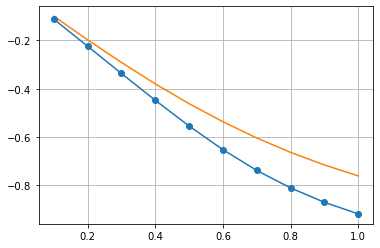

In [10]:
plt.figure()
plt.errorbar(betas, [e.mean / L for e in ene], yerr = [e.errorbar / L for e in ene], fmt='o-')
th = np.tanh(betas)
plt.plot(betas, -th * (1 + th**(L-2)) / (1 + th**L))
plt.grid(True)
plt.show()

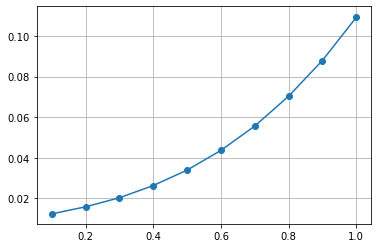

In [11]:
plt.figure()
plt.errorbar(betas, [m.mean for m in mag2], yerr = [m.errorbar for m in mag2], fmt='o-')
plt.grid(True)
plt.show()

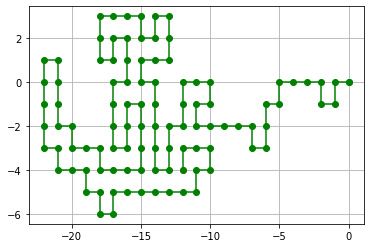

In [17]:
file_name = 'Conformations\\pack_1\\struct_conf_9.dat'
struct_2 = read_conformation(file_name)
draw_conformation(struct_2)

In [8]:
N = 10# number of measurments
beta_max = 1
ene = np.empty(N, dtype=RealObservable)
mag2 = np.empty(N, dtype=RealObservable)
mag4 = np.empty(N, dtype=RealObservable)

neighbors = tabulate_neighbors(struct_2)
L = len(struct_2)
betas = np.linspace(beta_max/N, beta_max, N)


for i in range(N):
    ene[i], mag2[i], mag4[i] = cy_ising.simulate(L = L, neighbors = neighbors, beta=betas[i], num_sweeps=500000)

[[  1   1   0   0   0]
 [  3   0   4   2   0]
 [  2   3   1   0   0]
 [  2   2   4   0   0]
 [  3   1   5   3   0]
 [  2   4   6   0   0]
 [  2   5   7   0   0]
 [  2   6   8   0   0]
 [  2   9   7   0   0]
 [  2   8  10   0   0]
 [  3  13   9  11   0]
 [  2  12  10   0   0]
 [  2  11  13   0   0]
 [  3  10  14  12   0]
 [  2  13  15   0   0]
 [  2  14  16   0   0]
 [  4  15  17  19  97]
 [  4  16  24  18  98]
 [  4  19  23  21  17]
 [  3  18  20  16   0]
 [  2  21  19   0   0]
 [  3  20  22  18   0]
 [  2  21  23   0   0]
 [  3  18  22  24   0]
 [  4  17  25  23  99]
 [  3  24  30  26   0]
 [  4  99  29  25  27]
 [  4 100  28  26  92]
 [  4  27  63  29  91]
 [  4  26  62  30  28]
 [  4  25  61  31  29]
 [  3  60  32  30   0]
 [  3  33  35  31   0]
 [  4  32  52  34  60]
 [  4  35  51  41  33]
 [  4  36  34  40  32]
 [  2  35  37   0   0]
 [  3  40  38  36   0]
 [  2  39  37   0   0]
 [  3  38  42  40   0]
 [  4  37  41  39  35]
 [  4  40  50  42  34]
 [  3  39  43  41   0]
 [  3  42  


----- sweep =  120000 spins =  [ 1  1  1 -1 -1  1 -1 -1  1  1 -1 -1  1  1 -1 -1  1  1  1  1 -1 -1 -1 -1
  1  1  1 -1 -1 -1  1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1
 -1 -1  1  1  1 -1  1  1  1  1 -1 -1  1  1  1 -1 -1  1 -1  1  1  1  1  1
 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1  1  1  1  1  1 -1  1  1  1  1 -1  1
 -1  1  1  1  1] beta =  0.1
  ene =  -15.837576353530388  (naive)
      =  -15.84617396763393 +/- 0.03861915101190158
  mag^2 =  0.013896086266489976 +/- 6.064489167750086e-05
  mag^4 =  0.0005728431786085091 +/- 5.799154747884896e-06

----- sweep =  130000 spins =  [-1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1  1 -1 -1  1 -1  1
 -1 -1 -1  1 -1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1
  1 -1 -1 -1  1  1 -1  1  1  1  1 -1  1  1  1 -1 -1  1  1 -1 -1 -1  1 -1
 -1  1  1 -1  1  1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1
  1  1 -1  1  1] beta =  0.1
  ene =  -15.84063968738702  (naive)
      =  -15.834326171874997 +/- 0.036791420152528


----- sweep =  270000 spins =  [-1 -1  1  1 -1 -1 -1 -1  1  1  1 -1  1 -1  1 -1  1 -1  1  1  1  1  1  1
 -1 -1 -1 -1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1 -1 -1  1  1 -1  1 -1
  1 -1 -1  1  1  1  1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1  1  1 -1
 -1  1  1 -1 -1 -1 -1 -1  1  1 -1  1  1  1 -1  1  1  1 -1  1  1  1  1  1
  1  1  1  1 -1] beta =  0.1
  ene =  -15.89287817452528  (naive)
      =  -15.88482666015625 +/- 0.027668116816596148
  mag^2 =  0.013930360472280587 +/- 4.287771696610592e-05
  mag^4 =  0.0005773848437934121 +/- 4.453108326528587e-06

----- sweep =  280000 spins =  [-1 -1  1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1  1 -1 -1  1  1  1 -1 -1 -1  1
  1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1  1  1  1
  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1
  1 -1  1  1 -1  1  1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1
  1  1  1  1 -1] beta =  0.1
  ene =  -15.897603937128796  (naive)
      =  -15.896584903492647 +/- 0.02748231617747


----- sweep =  420000 spins =  [-1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1
  1  1 -1  1  1  1  1 -1  1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1  1  1 -1  1
  1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1  1  1
 -1  1  1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1 -1  1 -1  1 -1 -1 -1 -1  1
 -1 -1 -1 -1  1] beta =  0.1
  ene =  -15.889659786524318  (naive)
      =  -15.891769409179688 +/- 0.02095436109608327
  mag^2 =  0.013960199948483415 +/- 3.421022356536485e-05
  mag^4 =  0.0005787778990990267 +/- 3.312083998321475e-06

----- sweep =  430000 spins =  [ 1  1  1 -1  1 -1 -1  1 -1 -1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1
  1  1  1 -1 -1  1  1 -1 -1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1
  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1 -1  1  1
 -1 -1 -1 -1 -1  1  1 -1  1 -1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1  1
 -1 -1 -1  1 -1] beta =  0.1
  ene =  -15.891490950021046  (naive)
      =  -15.891277606670675 +/- 0.0203677811213


----- sweep =  20000 spins =  [-1  1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1  1  1  1  1 -1  1 -1 -1  1 -1  1
  1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1  1  1
  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1  1
  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1 -1  1 -1
  1  1 -1 -1 -1] beta =  0.2
  ene =  -32.943502824858754  (naive)
      =  -32.91169819078948 +/- 0.11242619264804782
  mag^2 =  0.021325026506689233 +/- 0.00020265168713341848
  mag^4 =  0.0013490239942094077 +/- 2.8821195705021745e-05

----- sweep =  30000 spins =  [-1  1  1 -1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1
 -1  1 -1 -1  1  1 -1 -1 -1  1 -1  1 -1  1  1  1  1 -1 -1 -1  1  1  1 -1
  1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1  1  1 -1 -1  1  1 -1
 -1 -1 -1 -1  1 -1  1 -1  1 -1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1  1  1
 -1 -1  1  1 -1] beta =  0.2
  ene =  -32.8174727509083  (naive)
      =  -32.81968470982143 +/- 0.10571033525368036


----- sweep =  180000 spins =  [-1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1  1  1 -1  1
 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1  1  1  1 -1 -1 -1  1 -1  1  1  1
  1  1  1 -1  1  1  1  1 -1  1 -1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1  1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.2
  ene =  -32.85753412481042  (naive)
      =  -32.841589355468756 +/- 0.032921653315627235
  mag^2 =  0.02121358257615675 +/- 6.86301592774217e-05
  mag^4 =  0.001321039745787581 +/- 1.212974641898589e-05

----- sweep =  190000 spins =  [-1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1
 -1  1 -1  1  1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1  1  1  1  1 -1 -1 -1  1  1 -1
 -1 -1  1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1  1
 -1 -1 -1 -1 -1] beta =  0.2
  ene =  -32.86561123362509  (naive)
      =  -32.85898659446022 +/- 0.031391123717498824


----- sweep =  330000 spins =  [-1  1  1  1  1  1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1  1  1 -1
 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1
  1 -1 -1  1 -1 -1  1  1  1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1
  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1
 -1  1 -1 -1  1] beta =  0.2
  ene =  -32.85613376929161  (naive)
      =  -32.858880615234376 +/- 0.02569444289563992
  mag^2 =  0.02117565115016298 +/- 5.0419081352838114e-05
  mag^4 =  0.001315854023226886 +/- 8.774643164456182e-06

----- sweep =  340000 spins =  [ 1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1
  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1  1 -1 -1  1 -1  1  1  1 -1 -1  1
 -1 -1 -1  1  1  1 -1 -1  1  1 -1  1 -1 -1  1  1  1  1 -1  1  1 -1  1  1
 -1  1  1  1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1
  1  1  1  1  1] beta =  0.2
  ene =  -32.85008867620978  (naive)
      =  -32.858880615234376 +/- 0.0256944428956399


----- sweep =  490000 spins =  [-1 -1 -1 -1  1 -1 -1  1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1  1 -1 -1  1  1 -1  1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1
 -1 -1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1
 -1 -1 -1  1  1] beta =  0.2
  ene =  -32.83189830224836  (naive)
      =  -32.83837890625 +/- 0.023234413598663895
  mag^2 =  0.021171098749947482 +/- 4.1316271849238e-05
  mag^4 =  0.001313365039692016 +/- 6.548467257915517e-06

Final:
  ene =  -32.829088  (naive)
      =  -32.83114013671875 +/- 0.023234413598663895
  mag^2 =  0.02116488368940544 +/- 4.0479463958445206e-05
  mag^4 =  0.001312435827872278 +/- 6.548467257915517e-06
[[  1   1   0   0   0]
 [  3   0   4   2   0]
 [  2   3   1   0   0]
 [  2   2   4   0   0]
 [  3   1   5   3   0]
 [  2   4   6   0   0]
 [  2   5   7   0   0]
 [  2   6   8   0   0]
 [  2   9   7   0   0]
 [  2   8  10   0   0]
 [  3  13 

  ene =  -52.04988950110499  (naive)
      =  -52.051188151041664 +/- 0.047156334044401595
  mag^2 =  0.036524332594537294 +/- 0.0001532184029717568
  mag^4 =  0.0037498577266723066 +/- 3.6663545856945335e-05

----- sweep =  110000 spins =  [-1 -1  1  1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1  1 -1  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1
  1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1
  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.30000000000000004
  ene =  -52.03824510686267  (naive)
      =  -52.045823317307686 +/- 0.04438325789301916
  mag^2 =  0.03653313441885411 +/- 0.0001489172234557151
  mag^4 =  0.0037526650428406734 +/- 3.6663545856945335e-05

----- sweep =  120000 spins =  [-1 -1  1  1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
  1  1  1 -1  1 -1  1  1  1 -1 -1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1
  1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1 


----- sweep =  250000 spins =  [ 1  1 -1  1 -1 -1  1 -1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1 -1  1  1 -1
 -1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1 -1
 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1 -1  1 -1
 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1  1  1  1 -1 -1  1  1 -1 -1  1 -1
 -1 -1  1 -1 -1] beta =  0.30000000000000004
  ene =  -51.97739609041564  (naive)
      =  -51.98063151041667 +/- 0.034487735314319055
  mag^2 =  0.03629231802744013 +/- 0.00011642092725417435
  mag^4 =  0.0037168978216745403 +/- 2.3069597035907795e-05

----- sweep =  260000 spins =  [-1  1  1  1 -1  1 -1  1  1 -1 -1 -1 -1  1  1  1 -1  1 -1  1  1 -1 -1  1
  1 -1  1 -1 -1  1  1  1 -1 -1 -1  1 -1  1  1  1  1  1  1  1  1  1 -1  1
  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1 -1  1  1  1  1 -1
 -1 -1  1  1  1] beta =  0.30000000000000004
  ene =  -51.97918854158253  (naive)
      =  -51.9806


----- sweep =  430000 spins =  [ 1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1 -1  1 -1
 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1
  1 -1  1 -1 -1 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1
 -1 -1 -1 -1  1] beta =  0.30000000000000004
  ene =  -51.95781637717121  (naive)
      =  -51.95867919921874 +/- 0.02931468373505257
  mag^2 =  0.03623852644183641 +/- 9.601581162921016e-05
  mag^4 =  0.0037107808755079226 +/- 2.1986456364458914e-05

----- sweep =  440000 spins =  [ 1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1  1  1
  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1  1
  1 -1 -1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1
 -1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1
  1  1 -1 -1 -1] beta =  0.30000000000000004
  ene =  -51.95498873866196  (naive)
      =  -51.958679

----- sweep =  50000 spins =  [ 1 -1  1 -1 -1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1  1 -1 -1  1  1  1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1 -1  1  1  1 -1 -1  1  1  1
  1  1  1  1 -1] beta =  0.4
  ene =  -74.29641407171856  (naive)
      =  -74.29797363281251 +/- 0.07074593025893673
  mag^2 =  0.07458885005146552 +/- 0.00046022843489499347
  mag^4 =  0.013829457514114806 +/- 0.00016328682487741302

----- sweep =  60000 spins =  [ 1  1 -1  1  1  1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1
  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1
 -1  1 -1 -1  1  1  1  1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1
  1  1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.4
  ene =  -74.34567757204047  (naive)
      =  -74.322509765625 +/- 0.06382399776876423
  ma

----- sweep =  200000 spins =  [ 1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1
 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1
 -1 -1 -1  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1 -1 -1 -1 -1] beta =  0.4
  ene =  -74.2718136409318  (naive)
      =  -74.270751953125 +/- 0.037306786246849515
  mag^2 =  0.07440721047951795 +/- 0.00022344721043983729
  mag^4 =  0.013738589974151318 +/- 8.12020088160099e-05

----- sweep =  210000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1  1 -1 -1  1
  1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1 -1
  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1
 -1  1  1  1  1] beta =  0.4
  ene =  -74.27533678411055  (naive)
      =  -74.270751953125 +/- 0.036495875846337116
  mag


----- sweep =  350000 spins =  [-1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1
  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1
  1  1  1 -1 -1] beta =  0.4
  ene =  -74.25368213233676  (naive)
      =  -74.25675659179687 +/- 0.03773660680890575
  mag^2 =  0.07432015894581417 +/- 0.00016936195020192298
  mag^4 =  0.013724685819353488 +/- 5.9978530415897545e-05

----- sweep =  360000 spins =  [-1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1  1
  1 -1 -1  1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1  1
  1  1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1  1
  1  1  1 -1  1] beta =  0.4
  ene =  -74.25900205832761  (naive)
      =  -74.25675659179687 +/- 0.03773660680890575


Final:
  ene =  -74.240136  (naive)
      =  -74.24208984375 +/- 0.029857319450004218
  mag^2 =  0.07409765854756892 +/- 0.00014435364915937565
  mag^4 =  0.013672114165860153 +/- 4.9527947062853754e-05
[[  1   1   0   0   0]
 [  3   0   4   2   0]
 [  2   3   1   0   0]
 [  2   2   4   0   0]
 [  3   1   5   3   0]
 [  2   4   6   0   0]
 [  2   5   7   0   0]
 [  2   6   8   0   0]
 [  2   9   7   0   0]
 [  2   8  10   0   0]
 [  3  13   9  11   0]
 [  2  12  10   0   0]
 [  2  11  13   0   0]
 [  3  10  14  12   0]
 [  2  13  15   0   0]
 [  2  14  16   0   0]
 [  4  15  17  19  97]
 [  4  16  24  18  98]
 [  4  19  23  21  17]
 [  3  18  20  16   0]
 [  2  21  19   0   0]
 [  3  20  22  18   0]
 [  2  21  23   0   0]
 [  3  18  22  24   0]
 [  4  17  25  23  99]
 [  3  24  30  26   0]
 [  4  99  29  25  27]
 [  4 100  28  26  92]
 [  4  27  63  29  91]
 [  4  26  62  30  28]
 [  4  25  61  31  29]
 [  3  60  32  30   0]
 [  3  33  35  31   0]
 [  4  32  52  34  60]
 [  4  35  51 


----- sweep =  100000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1
  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  0.5
  ene =  -99.00047999520005  (naive)
      =  -99.00166829427083 +/- 0.07026795140657936
  mag^2 =  0.1711151110083162 +/- 0.000839639934016153
  mag^4 =  0.055610195707144726 +/- 0.0004342423012104291

----- sweep =  110000 spins =  [-1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1  1 -1  1 -1  1  1  1 -1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.5
  ene =  -99.02459977636568  (naive)
      =  -99.00595327524039 +/- 0.0667870735867443
  ma


----- sweep =  270000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1
  1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1
 -1 -1  1 -1  1] beta =  0.5
  ene =  -99.01228143599468  (naive)
      =  -99.01183319091797 +/- 0.038338998895623734
  mag^2 =  0.17159326959271 +/- 0.00055330519130144
  mag^4 =  0.055885660099794114 +/- 0.0002763221223641792

----- sweep =  280000 spins =  [ 1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1
  1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1
 -1 -1  1  1  1] beta =  0.5
  ene =  -99.01199281431138  (naive)
      =  -99.01408835018384 +/- 0.03784230477748595
  mag


----- sweep =  420000 spins =  [ 1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1  1  1  1 -1 -1  1  1  1
  1  1  1  1  1] beta =  0.5
  ene =  -99.00438094195013  (naive)
      =  -99.0013427734375 +/- 0.031690352096156525
  mag^2 =  0.17143138971133356 +/- 0.00044987824311478646
  mag^4 =  0.0558180195022662 +/- 0.00021944159891960913

----- sweep =  430000 spins =  [-1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1 -1  1 -1 -1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  0.5
  ene =  -99.00865114267177  (naive)
      =  -99.00658240685097 +/- 0.031248048071756858



----- sweep =  20000 spins =  [ 1  1  1  1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1  1  1  1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.6
  ene =  -120.88800559972002  (naive)
      =  -120.89278371710527 +/- 0.1597101000601338
  mag^2 =  0.3391291859286242 +/- 0.0036807287940705544
  mag^4 =  0.16328131670317883 +/- 0.002640555259956498

----- sweep =  30000 spins =  [ 1  1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1
 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.6
  ene =  -120.85180493983533  (naive)
      =  -120.89369419642857 +/- 0.12575466118792242
  m


----- sweep =  180000 spins =  [ 1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1
  1  1  1  1  1] beta =  0.6
  ene =  -120.82657874122921  (naive)
      =  -120.84488525390626 +/- 0.04956110222663117
  mag^2 =  0.3376829104147266 +/- 0.0011349647552003777
  mag^4 =  0.16243342829028118 +/- 0.0007883125535887128

----- sweep =  190000 spins =  [-1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1  1  1  1 -1 -1  1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1
 -1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
  1  1  1  1 -1] beta =  0.6
  ene =  -120.84369555949705  (naive)
      =  -120.8243408203125 +/- 0.04837703244367909



----- sweep =  330000 spins =  [-1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1 -1 -1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  0.6
  ene =  -120.82791567298281  (naive)
      =  -120.8316162109375 +/- 0.03546800726395077
  mag^2 =  0.3380813375756667 +/- 0.0010102503909096361
  mag^4 =  0.1627056994184064 +/- 0.0007231459865528056

----- sweep =  340000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.6
  ene =  -120.82770638909885  (naive)
      =  -120.8316162109375 +/- 0.03515425999198488
  


----- sweep =  490000 spins =  [-1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
  1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1 -1 -1 -1] beta =  0.6
  ene =  -120.81002895912458  (naive)
      =  -120.8099583217076 +/- 0.030022530309829487
  mag^2 =  0.33764593904429463 +/- 0.0008296293654330895
  mag^4 =  0.16247370525435556 +/- 0.0005860857836351063

Final:
  ene =  -120.81516  (naive)
      =  -120.81134440104165 +/- 0.029795151666685216
  mag^2 =  0.3377887405850735 +/- 0.0008255075837008378
  mag^4 =  0.162561939039636 +/- 0.0005822762199496777
[[  1   1   0   0   0]
 [  3   0   4   2   0]
 [  2   3   1   0   0]
 [  2   2   4   0   0]
 [  3   1   5   3   0]
 [  2   4   6   0   0]
 [  2   5   7   0   0]
 [  2   6   8   0   0]
 [  2   9   7   0   0]
 [  2   8  10   0   0]
 [  3  13 


----- sweep =  100000 spins =  [-1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  0.7000000000000001
  ene =  -135.10079899201008  (naive)
      =  -135.09588623046875 +/- 0.054157136432304846
  mag^2 =  0.4973824069152739 +/- 0.001990981860839152
  mag^4 =  0.2999061078249224 +/- 0.0017200869301098297

----- sweep =  110000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  0.7000000000000001
  ene =  -135.1353805874492  (naive)
      =  -135.1231595552


----- sweep =  260000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.7000000000000001
  ene =  -135.06416129168733  (naive)
      =  -135.06226399739583 +/- 0.0333869685578015
  mag^2 =  0.4974020080496601 +/- 0.0011891705996877053
  mag^4 =  0.2998652245256208 +/- 0.0010797101639823865

----- sweep =  270000 spins =  [ 1  1  1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1
  1  1  1  1 -1] beta =  0.7000000000000001
  ene =  -135.07375528238785  (naive)
      =  -135.0670547485


----- sweep =  420000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1 -1
 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.7000000000000001
  ene =  -135.0542046328461  (naive)
      =  -135.06378173828125 +/- 0.02625402417725048
  mag^2 =  0.4972926920365498 +/- 0.000934793566210928
  mag^4 =  0.2995911323138572 +/- 0.0008408169150513801

----- sweep =  430000 spins =  [ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1
  1 -1  1 -1  1  1  1  1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.7000000000000001
  ene =  -135.05125104360224  (naive)
      =  -135.05178128756


----- sweep =  40000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.8
  ene =  -143.41378965525863  (naive)
      =  -143.4225431743421 +/- 0.0790444514206613
  mag^2 =  0.615589661778515 +/- 0.0034293946615322145
  mag^4 =  0.4241882978498847 +/- 0.0035209859357654837

----- sweep =  50000 spins =  [ 1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.8
  ene =  -143.38243235135297  (naive)
      =  -143.39017740885416 +/- 0.0779787173172511
  mag^


----- sweep =  190000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1 -1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1] beta =  0.8
  ene =  -143.29389319003585  (naive)
      =  -143.29441139914772 +/- 0.0343975557924682
  mag^2 =  0.6122766249590613 +/- 0.0015961173126960557
  mag^4 =  0.42161458856816225 +/- 0.0016214998837407117

----- sweep =  200000 spins =  [-1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.8
  ene =  -143.29292853535733  (naive)
      =  -143.29511515299478 +/- 0.03281273737022265


  mag^4 =  0.4220722564609453 +/- 0.0011519838087849534

----- sweep =  340000 spins =  [-1  1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.8
  ene =  -143.31064026282274  (naive)
      =  -143.31061401367188 +/- 0.027250943590250012
  mag^2 =  0.6129665644376163 +/- 0.0011110255237806663
  mag^4 =  0.4220722564609453 +/- 0.0011304676818804683

----- sweep =  350000 spins =  [-1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  0.8
  ene =  -143.30995340013314  (nai


Final:
  ene =  -143.289124  (naive)
      =  -143.2871297200521 +/- 0.023117819948666123
  mag^2 =  0.6120401623334518 +/- 0.0008886996540164919
  mag^4 =  0.42102156693523063 +/- 0.0009031278966489411
[[  1   1   0   0   0]
 [  3   0   4   2   0]
 [  2   3   1   0   0]
 [  2   2   4   0   0]
 [  3   1   5   3   0]
 [  2   4   6   0   0]
 [  2   5   7   0   0]
 [  2   6   8   0   0]
 [  2   9   7   0   0]
 [  2   8  10   0   0]
 [  3  13   9  11   0]
 [  2  12  10   0   0]
 [  2  11  13   0   0]
 [  3  10  14  12   0]
 [  2  13  15   0   0]
 [  2  14  16   0   0]
 [  4  15  17  19  97]
 [  4  16  24  18  98]
 [  4  19  23  21  17]
 [  3  18  20  16   0]
 [  2  21  19   0   0]
 [  3  20  22  18   0]
 [  2  21  23   0   0]
 [  3  18  22  24   0]
 [  4  17  25  23  99]
 [  3  24  30  26   0]
 [  4  99  29  25  27]
 [  4 100  28  26  92]
 [  4  27  63  29  91]
 [  4  26  62  30  28]
 [  4  25  61  31  29]
 [  3  60  32  30   0]
 [  3  33  35  31   0]
 [  4  32  52  34  60]
 [  4  35  51 

  mag^2 =  0.685963464000984 +/- 0.0019878099601436496
  mag^4 =  0.5122138269284072 +/- 0.0022878194248847255

----- sweep =  120000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.9
  ene =  -148.02915809034926  (naive)
      =  -148.04293387276783 +/- 0.03605183356294731
  mag^2 =  0.6866442103015109 +/- 0.0019173576962457596
  mag^4 =  0.512903164629272 +/- 0.002179133597294359

----- sweep =  130000 spins =  [ 1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1
  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -


----- sweep =  270000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  0.9
  ene =  -148.0275369350484  (naive)
      =  -148.0242691040039 +/- 0.02282750187033133
  mag^2 =  0.6854368489742884 +/- 0.0012303651928465991
  mag^4 =  0.5116426780205307 +/- 0.001414701343389344

----- sweep =  280000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  0.9
  ene =  -148.0318320291713  (naive)
      =  -148.03111356847424 +/- 0.022190582115907815
  m


----- sweep =  430000 spins =  [ 1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.9
  ene =  -148.02715575080057  (naive)
      =  -148.02599158653848 +/- 0.0181150241001047
  mag^2 =  0.6860702641332298 +/- 0.0009396630423970572
  mag^4 =  0.512222090728438 +/- 0.0010983060136706894

----- sweep =  440000 spins =  [-1  1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.9
  ene =  -148.0328931070611  (naive)
      =  -148.02599158653848 +/- 0.018055950356110927
  


----- sweep =  30000 spins =  [ 1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  1.0
  ene =  -150.85047165094497  (naive)
      =  -150.86167689732144 +/- 0.0599212965761482
  mag^2 =  0.7345622245105521 +/- 0.004431835144486003
  mag^4 =  0.5786168449540408 +/- 0.005724836805810264

----- sweep =  40000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  1.0
  ene =  -150.8556536086598  (naive)
      =  -150.86934621710526 +/- 0.050854885482283785
  mag


----- sweep =  190000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  1.0
  ene =  -150.89474792237937  (naive)
      =  -150.90458540482953 +/- 0.021551161541493474
  mag^2 =  0.7364045235162439 +/- 0.001698046044306051
  mag^4 =  0.5811416616505783 +/- 0.0022347318982370527

----- sweep =  200000 spins =  [ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  1.0
  ene =  -150.89762051189743  (naive)
      =  -150.89561971028647 +/- 0.020764566521444334


----- sweep =  350000 spins =  [ 1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  1.0
  ene =  -150.89368030377057  (naive)
      =  -150.89754638671874 +/- 0.014653563128310702
  mag^2 =  0.7367307452241201 +/- 0.0011723811026922526
  mag^4 =  0.5815531752462239 +/- 0.001564269365421856

----- sweep =  360000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  1.0
  ene =  -150.8942780714498  (naive)
      =  -150.89754638671874 +/- 0.01441974100623439
 

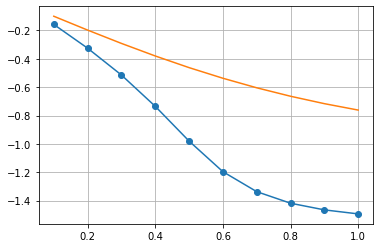

In [9]:
plt.figure()
plt.errorbar(betas, [e.mean / L for e in ene], yerr = [e.errorbar / L for e in ene], fmt='o-')
th = np.tanh(betas)
plt.plot(betas, -th * (1 + th**(L-2)) / (1 + th**L))
plt.grid(True)
plt.show()

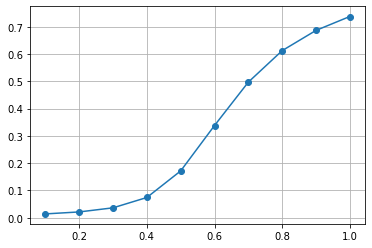

In [10]:
plt.figure()
plt.errorbar(betas, [m.mean for m in mag2], yerr = [m.errorbar for m in mag2], fmt='o-')
plt.grid(True)
plt.show()

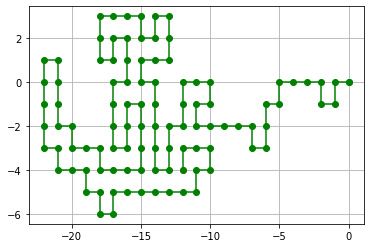

conformation length:  101
[[  1   1   0   0   0]
 [  3   0   4   2   0]
 [  2   3   1   0   0]
 [  2   2   4   0   0]
 [  3   1   5   3   0]
 [  2   4   6   0   0]
 [  2   5   7   0   0]
 [  2   6   8   0   0]
 [  2   9   7   0   0]
 [  2   8  10   0   0]
 [  3  13   9  11   0]
 [  2  12  10   0   0]
 [  2  11  13   0   0]
 [  3  10  14  12   0]
 [  2  13  15   0   0]
 [  2  14  16   0   0]
 [  4  15  17  19  97]
 [  4  16  24  18  98]
 [  4  19  23  21  17]
 [  3  18  20  16   0]
 [  2  21  19   0   0]
 [  3  20  22  18   0]
 [  2  21  23   0   0]
 [  3  18  22  24   0]
 [  4  17  25  23  99]
 [  3  24  30  26   0]
 [  4  99  29  25  27]
 [  4 100  28  26  92]
 [  4  27  63  29  91]
 [  4  26  62  30  28]
 [  4  25  61  31  29]
 [  3  60  32  30   0]
 [  3  33  35  31   0]
 [  4  32  52  34  60]
 [  4  35  51  41  33]
 [  4  36  34  40  32]
 [  2  35  37   0   0]
 [  3  40  38  36   0]
 [  2  39  37   0   0]
 [  3  38  42  40   0]
 [  4  37  41  39  35]
 [  4  40  50  42  34]
 [  3  3


----- sweep =  10000 spins =  [ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1
  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  0.5
  ene =  -99.17598240175982  (naive)
      =  -99.18688322368423 +/- 0.1826298544706991
  mag^2 =  0.17006241970601438 +/- 0.002493832578668587
  mag^4 =  0.054932500860093846 +/- 0.0013614507180274933

----- sweep =  20000 spins =  [ 1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1
 -1 -1  1  1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.5
  ene =  -99.01449927503624  (naive)
      =  -98.97430098684208 +/- 0.12978589932089168
  mag


----- sweep =  10000 spins =  [-1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  0.75
  ene =  -139.66173382661734  (naive)
      =  -139.65049342105263 +/- 0.16046963660662825
  mag^2 =  0.5526064266145216 +/- 0.005623664094994086
  mag^4 =  0.35517089240163613 +/- 0.005346174715377428

----- sweep =  20000 spins =  [ 1 -1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  0.75
  ene =  -139.67356632168392  (naive)
      =  -139.7069284539474 +/- 0.10905851787999044
  


----- sweep =  10000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  1.0
  ene =  -150.92300769923008  (naive)
      =  -150.92208059210526 +/- 0.10245997694024618
  mag^2 =  0.7399532553568018 +/- 0.00877537927586751
  mag^4 =  0.584833913329564 +/- 0.01224255742578551

----- sweep =  20000 spins =  [ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  1.0
  ene =  -150.809209539523  (naive)
      =  -150.81866776315792 +/- 0.08354992446413585
  mag^2 =


----- sweep =  10000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  1.25
  ene =  -154.37706229377062  (naive)
      =  -154.3729440789474 +/- 0.08328647631024207
  mag^2 =  0.8307840530340164 +/- 0.00903851035646243
  mag^4 =  0.7248941574067413 +/- 0.012590129477840679

----- sweep =  20000 spins =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] beta =  1.25
  ene =  -154.32683365831707  (naive)
      =  -154.34416118421052 +/- 0.050850445797175695
  mag^2 =  0.8285256637636146 +/- 0.0067563081956226794
  mag^4 =  0.7204458259554216 +/- 0.00985431821144

  mag^4 =  0.8052892330081689 +/- 0.013983082160489577

----- sweep =  40000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  1.5
  ene =  -155.68248293792655  (naive)
      =  -155.68379934210523 +/- 0.04391228659510929
  mag^2 =  0.8801670106839372 +/- 0.007239215372954599
  mag^4 =  0.804033800952339 +/- 0.011640435274130589

----- sweep =  50000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  1.5
  ene =  -155.679946401072  (naive)
     


----- sweep =  50000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  1.75
  ene =  -156.31797364052719  (naive)
      =  -156.32548014322916 +/- 0.051201779971719354
  mag^2 =  0.9248631957293811 +/- 0.008605812745835786
  mag^4 =  0.8778967133614193 +/- 0.01355752381472204

----- sweep =  60000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  1.75
  ene =  -156.33517774703756  (naive)
      =  -156.33286830357142 +/- 0.04441707893697505
  


----- sweep =  50000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  2.0
  ene =  -156.55152896942062  (naive)
      =  -156.54520670572919 +/- 0.047986555597772595
  mag^2 =  0.9394499179767917 +/- 0.008480423820831303
  mag^4 =  0.901939354164802 +/- 0.01350500302644649

----- sweep =  60000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  2.0
  ene =  -156.58097365043915  (naive)
      =  -156.58290318080358 +/- 0.045398284034753066
  ma


----- sweep =  70000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  2.25
  ene =  -156.74651790688705  (naive)
      =  -156.74517463235293 +/- 0.04290365170657026
  mag^2 =  0.9619280450085633 +/- 0.008090048374968942
  mag^4 =  0.9389500412469225 +/- 0.012650285327032256

----- sweep =  80000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  2.25
  ene =  -156.75245309433632  (naive)
      =  -156.7551655016448 +/- 0.03894382020863455
  m


----- sweep =  70000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  2.5
  ene =  -148.48157883458808  (naive)
      =  -148.47940602022052 +/- 0.10572317956537343
  mag^2 =  0.282497039289689 +/- 0.010280593038843846
  mag^4 =  0.09098739263381386 +/- 0.004726476031857339

----- sweep =  80000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  2.5
  ene =  -148.53455581805227  (naive)
      =  -148.52397717927627 +/- 0.0939803318076578
  mag


----- sweep =  70000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  2.75
  ene =  -148.8820302567106  (naive)
      =  -148.88169232536765 +/- 0.03089417934154728
  mag^2 =  0.31129328079138724 +/- 0.0037051222086574415
  mag^4 =  0.10305458057748032 +/- 0.0020338690931944966

----- sweep =  80000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  2.75
  ene =  -148.8898763765453  (naive)
      =  -148.88800370065786 +/- 0.02704330609420301



----- sweep =  80000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  3.0
  ene =  -148.83650204372447  (naive)
      =  -148.83275082236838 +/- 0.06212456893291558
  mag^2 =  0.3124039757292887 +/- 0.006999421735778844
  mag^4 =  0.10510444984721133 +/- 0.0036024562182410723

----- sweep =  90000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  3.0
  ene =  -148.85111276541372  (naive)
      =  -148.839794921875 +/- 0.06035205236886375
  ma


Final:
  ene =  -148.88048  (naive)
      =  -148.8787841796875 +/- 0.05332513056755887
  mag^2 =  0.31571347714327436 +/- 0.007179623684810024
  mag^4 =  0.1064754507314664 +/- 0.004045809381214498
[[  1   1   0   0   0]
 [  3   0   4   2   0]
 [  2   3   1   0   0]
 [  2   2   4   0   0]
 [  3   1   5   3   0]
 [  2   4   6   0   0]
 [  2   5   7   0   0]
 [  2   6   8   0   0]
 [  2   9   7   0   0]
 [  2   8  10   0   0]
 [  3  13   9  11   0]
 [  2  12  10   0   0]
 [  2  11  13   0   0]
 [  3  10  14  12   0]
 [  2  13  15   0   0]
 [  2  14  16   0   0]
 [  4  15  17  19  97]
 [  4  16  24  18  98]
 [  4  19  23  21  17]
 [  3  18  20  16   0]
 [  2  21  19   0   0]
 [  3  20  22  18   0]
 [  2  21  23   0   0]
 [  3  18  22  24   0]
 [  4  17  25  23  99]
 [  3  24  30  26   0]
 [  4  99  29  25  27]
 [  4 100  28  26  92]
 [  4  27  63  29  91]
 [  4  26  62  30  28]
 [  4  25  61  31  29]
 [  3  60  32  30   0]
 [  3  33  35  31   0]
 [  4  32  52  34  60]
 [  4  35  51  41 


----- sweep =  0 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  3.75
  ene =  -149.0  (naive)
      =  -149.0 +/- 0.0
  mag^2 =  0.31849818645230854 +/- 0.0
  mag^4 =  0.1014410947734095 +/- 0.0

----- sweep =  10000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  3.75
  ene =  -148.99060093990602  (naive)
      =  -148.9905427631579 +/- 0.0016782106199477367
  mag^2 =  0.3087277950046177 +/- 0.018694384545204123
  mag^4 =  0.100557293478


----- sweep =  10000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  4.0
  ene =  -148.994200579942  (naive)
      =  -148.99403782894737 +/- 0.0016747447852088666
  mag^2 =  0.31162329609068257 +/- 0.017023316427889155
  mag^4 =  0.10215651045236902 +/- 0.01093221362878386

----- sweep =  20000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  4.0
  ene =  -148.9950002499875  (naive)
      =  -148.99496299342104 +/- 0.0009786249172717082
  


----- sweep =  10000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  4.25
  ene =  -148.997800219978  (naive)
      =  -148.99773848684208 +/- 0.0007003878069442702
  mag^2 =  0.38371230052265265 +/- 0.011899015304015562
  mag^4 =  0.14974496251498665 +/- 0.008393270185348389

----- sweep =  20000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  4.25
  ene =  -148.9978001099945  (naive)
      =  -148.9978412828947 +/- 0.00046535699906240366

----- sweep =  20000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  4.5
  ene =  -148.99830008499575  (naive)
      =  -148.99825246710523 +/- 0.00040666423423546836
  mag^2 =  0.30282941171918126 +/- 0.010705254889980392
  mag^4 =  0.09422472898443701 +/- 0.006608445768456802

----- sweep =  30000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  4.5
  ene =  -148.99833338888703  (naive)
      =  -148.99832589285717 +/- 0.000329032576812809


----- sweep =  20000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  4.75
  ene =  -148.9990000499975  (naive)
      =  -148.99897203947364 +/- 0.0003136874062498247
  mag^2 =  0.36044881113306737 +/- 0.018389426771913606
  mag^4 =  0.1339623349242948 +/- 0.012298386782501787

----- sweep =  30000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  4.75
  ene =  -148.99913336222127  (naive)
      =  -148.99916294642856 +/- 0.000238825041389291


----- sweep =  20000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  5.0
  ene =  -148.9994000299985  (naive)
      =  -148.9993832236842 +/- 0.00024376996035798274
  mag^2 =  0.3794074223244367 +/- 0.014525753925964299
  mag^4 =  0.14688721501167537 +/- 0.009947730941400055

----- sweep =  30000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  5.0
  ene =  -148.99953334888838  (naive)
      =  -148.99951171875 +/- 0.00017581827296870266
  

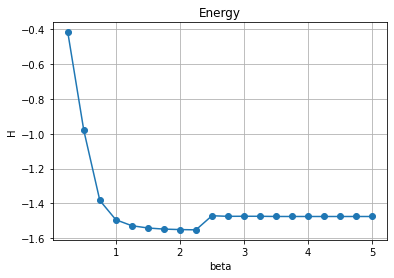

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylim'

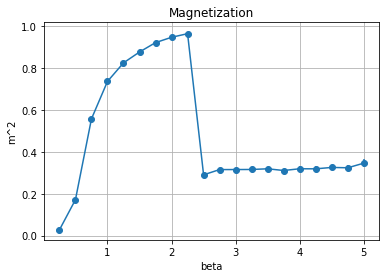

In [28]:
file_name = 'Conformations\\pack_1\\struct_conf_9.dat'
struct_2 = read_conformation(file_name)
measure_structure(struct_2, 0, 5, 20, 100000)

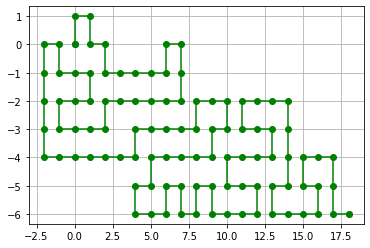

In [29]:
file_name = 'Conformations\\pack_1\\struct_conf_8.dat'
struct_2 = read_conformation(file_name)
draw_conformation(struct_2)

In [30]:
len(struct_2)

101

In [8]:
N = 10# number of measurments
beta_max = 1
ene = np.empty(N, dtype=RealObservable)
mag2 = np.empty(N, dtype=RealObservable)
mag4 = np.empty(N, dtype=RealObservable)

neighbors = tabulate_neighbors(struct_2)
L = len(struct_2)
betas = np.linspace(beta_max/N, beta_max, N)


for i in range(N):
    ene[i], mag2[i], mag4[i] = cy_ising.simulate(L = L, neighbors = neighbors, beta=betas[i], num_sweeps=500000)

[[  4   3  29   1  27]
 [  2   2   0   0   0]
 [  2   1   3   0   0]
 [  4   4   0   2  26]
 [  2   3   5   0   0]
 [  4   6  26   4  18]
 [  3   7   5  17   0]
 [  3   8   6  16   0]
 [  3   9   7  15   0]
 [  4  12   8  10  14]
 [  2  11   9   0   0]
 [  2  10  12   0   0]
 [  3   9  11  13   0]
 [  4  46  14  12  44]
 [  4  13  15   9  43]
 [  4  14  16   8  42]
 [  4  15  17   7  41]
 [  3  16  18   6   0]
 [  4  17  25   5  19]
 [  3  20  18  38   0]
 [  4  19  21  25  37]
 [  4  20  22  24  36]
 [  4  21  33  23  35]
 [  4  24  32  28  22]
 [  4  25  23  27  21]
 [  4  18  24  26  20]
 [  4   5  27   3  25]
 [  4  26  28   0  24]
 [  4  27  31  29  23]
 [  3   0  30  28   0]
 [  2  29  31   0   0]
 [  3  28  30  32   0]
 [  3  23  31  33   0]
 [  3  22  32  34   0]
 [  2  35  33   0   0]
 [  3  36  34  22   0]
 [  3  37  35  21   0]
 [  3  38  36  20   0]
 [  3  39  37  19   0]
 [  2  40  38   0   0]
 [  4  55  39  41  57]
 [  3  42  16  40   0]
 [  4  43  41  15  55]
 [  4  44  


----- sweep =  110000 spins =  [-1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1  1  1 -1 -1 -1 -1
 -1 -1  1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1
 -1  1 -1 -1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1  1  1  1  1  1 -1 -1  1
  1 -1  1  1  1] beta =  0.1
  ene =  -17.254788592830973  (naive)
      =  -17.246938852163463 +/- 0.040002244959602896
  mag^2 =  0.014283786810587947 +/- 6.568553754715663e-05
  mag^4 =  0.000608059748453301 +/- 6.246430542940913e-06

----- sweep =  120000 spins =  [ 1 -1  1  1  1 -1  1  1  1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1  1  1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1
  1  1  1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1  1  1 -1 -1
  1  1  1  1  1  1 -1 -1  1  1 -1 -1 -1  1 -1  1  1 -1 -1 -1  1  1  1 -1
  1  1  1  1  1] beta =  0.1
  ene =  -17.24493962550312  (naive)
      =  -17.251133510044642 +/- 0.03877698807428


----- sweep =  270000 spins =  [ 1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1  1 -1  1  1 -1  1  1  1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1
 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1
 -1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1] beta =  0.1
  ene =  -17.271595290387815  (naive)
      =  -17.277320861816406 +/- 0.03336748112326688
  mag^2 =  0.01435904852982397 +/- 4.2041854607453096e-05
  mag^4 =  0.000612347195025006 +/- 3.977194696603569e-06

----- sweep =  280000 spins =  [ 1 -1 -1  1  1  1 -1  1 -1  1  1  1  1 -1  1 -1 -1 -1  1  1  1 -1  1  1
  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1
 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1  1
  1 -1 -1  1  1  1  1 -1  1 -1 -1  1 -1 -1  1  1 -1  1 -1  1 -1  1  1 -1
 -1  1  1  1  1] beta =  0.1
  ene =  -17.271952600169286  (naive)
      =  -17.26998362821691 +/- 0.033367481123266


----- sweep =  420000 spins =  [ 1 -1 -1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1
  1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1
 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1 -1  1
 -1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1
 -1 -1  1 -1  1] beta =  0.1
  ene =  -17.246606555698676  (naive)
      =  -17.245468139648438 +/- 0.03361709722776007
  mag^2 =  0.014341580424866447 +/- 3.187760815621115e-05
  mag^4 =  0.0006098099470801875 +/- 3.062877446326765e-06

----- sweep =  430000 spins =  [ 1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1 -1 -1  1  1 -1  1  1  1 -1 -1  1 -1  1  1 -1  1  1  1 -1  1  1
 -1 -1 -1  1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1 -1
 -1 -1  1  1  1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1  1
 -1 -1 -1 -1 -1] beta =  0.1
  ene =  -17.24383431666438  (naive)
      =  -17.243135892427883 +/- 0.03361709722776

      =  -35.784737723214285 +/- 0.12411577202861813
  mag^2 =  0.02296050829225426 +/- 0.0002652577475513646
  mag^4 =  0.00153354269240536 +/- 3.401032492411646e-05

----- sweep =  40000 spins =  [-1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1 -1 -1  1  1  1  1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1  1  1  1  1 -1  1  1  1  1 -1
 -1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1 -1  1 -1  1  1  1  1  1  1
 -1  1 -1  1  1] beta =  0.2
  ene =  -35.70905727356816  (naive)
      =  -35.714586759868425 +/- 0.10751517359435236
  mag^2 =  0.02281915166340761 +/- 0.00023031888780294016
  mag^4 =  0.0015115291014911824 +/- 2.789718662926885e-05

----- sweep =  50000 spins =  [-1 -1 -1  1  1 -1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1  1  1  1  1  1
  1 -1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1
  1 -1  1  1 -1  1 -1 -1  1 -1  1  1  1  1  1  1 -1  1  1  1 -1 -1 -1  1
 -1  1  1  1 -1 -1  1 -1


----- sweep =  190000 spins =  [-1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1
 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
  1  1  1  1 -1 -1  1  1 -1 -1  1  1  1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1
 -1 -1 -1  1  1 -1  1  1  1  1  1  1  1 -1 -1  1  1  1  1 -1 -1  1  1 -1
  1  1 -1 -1  1] beta =  0.2
  ene =  -35.772506460492316  (naive)
      =  -35.769564541903414 +/- 0.05040715721488458
  mag^2 =  0.022842494935601237 +/- 0.00011230957305272874
  mag^4 =  0.00152037032941106 +/- 1.5580910721861643e-05

----- sweep =  200000 spins =  [-1  1  1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1
  1  1  1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1 -1  1  1  1  1  1
 -1  1  1  1  1 -1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1
  1 -1 -1 -1 -1] beta =  0.2
  ene =  -35.77855110724446  (naive)
      =  -35.77753702799479 +/- 0.046832788540459


----- sweep =  350000 spins =  [ 1  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1  1  1 -1 -1 -1 -1 -1  1  1
  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1 -1 -1 -1  1 -1
 -1 -1 -1  1 -1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1  1 -1  1 -1 -1 -1
 -1  1 -1  1  1  1  1  1 -1 -1  1 -1 -1  1  1 -1 -1  1  1 -1  1  1  1 -1
  1  1 -1 -1 -1] beta =  0.2
  ene =  -35.78159490972883  (naive)
      =  -35.77608032226562 +/- 0.029824007423953306
  mag^2 =  0.022852294850075977 +/- 6.9978372648975e-05
  mag^4 =  0.0015225411243745466 +/- 1.0215906385645928e-05

----- sweep =  360000 spins =  [-1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1  1 -1 -1  1  1  1  1  1  1 -1
  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1 -1  1  1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1 -1  1 -1 -1 -1
  1  1 -1  1 -1  1 -1 -1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1
  1  1 -1 -1 -1] beta =  0.2
  ene =  -35.78873947572368  (naive)
      =  -35.77608032226562 +/- 0.02982400742395330


----- sweep =  20000 spins =  [ 1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1 -1  1
  1  1 -1  1  1 -1 -1  1  1 -1 -1  1  1  1 -1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1
  1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1 -1
  1  1  1  1 -1] beta =  0.30000000000000004
  ene =  -57.50562471876406  (naive)
      =  -57.49198190789473 +/- 0.13762382937259265
  mag^2 =  0.04164702312466786 +/- 0.00047130600078908847
  mag^4 =  0.004885470741246659 +/- 0.00013889442438878418

----- sweep =  30000 spins =  [-1  1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1  1
 -1  1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1
 -1  1  1  1  1] beta =  0.30000000000000004
  ene =  -57.395286823772544  (naive)
      =  -57.4090401

  mag^2 =  0.04174957459874236 +/- 0.0001310671773417633
  mag^4 =  0.004879397754727493 +/- 3.4950448577570016e-05

----- sweep =  210000 spins =  [-1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1
 -1 -1  1  1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1  1
 -1 -1  1 -1 -1] beta =  0.30000000000000004
  ene =  -57.289374812500895  (naive)
      =  -57.29591878255208 +/- 0.03584617223606545
  mag^2 =  0.04174957459874236 +/- 0.00012734077004933583
  mag^4 =  0.004879397754727493 +/- 3.367749487889814e-05

----- sweep =  220000 spins =  [ 1  1  1 -1 -1 -1  1  1 -1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1  1  1
  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1
 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1 -1 -1 -1 -1 -1
 -1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1 -1 -1  1 


----- sweep =  360000 spins =  [ 1  1  1 -1 -1 -1  1  1  1  1 -1 -1  1 -1  1  1  1 -1 -1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1  1 -1  1  1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1
  1  1 -1  1  1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1] beta =  0.30000000000000004
  ene =  -57.278824225488265  (naive)
      =  -57.28638916015625 +/- 0.026532516923617945
  mag^2 =  0.04174323873348817 +/- 9.795153532886938e-05
  mag^4 =  0.004876617493755651 +/- 2.4635570503893805e-05

----- sweep =  370000 spins =  [ 1  1  1  1 -1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1
  1  1  1  1  1 -1  1 -1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1  1  1 -1 -1 -1
 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1] beta =  0.30000000000000004
  ene =  -57.277304655933364  (naive)
      =  -57.2782


----- sweep =  10000 spins =  [-1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1  1 -1  1  1  1  1 -1 -1 -1 -1  1
  1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1
  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1  1  1
 -1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1] beta =  0.4
  ene =  -83.18408159184082  (naive)
      =  -83.18955592105262 +/- 0.21298079312059728
  mag^2 =  0.0934679230364412 +/- 0.0013568362866675484
  mag^4 =  0.021831309498064347 +/- 0.0005805402147439341

----- sweep =  20000 spins =  [-1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1
 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1 -1  1  1
 -1 -1 -1  1  1] beta =  0.4
  ene =  -83.22613869306535  (naive)
      =  -83.20590049342103 +/- 0.13998817443192912
  ma


----- sweep =  160000 spins =  [-1 -1 -1 -1 -1  1  1 -1  1 -1  1  1 -1  1 -1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1  1  1
 -1 -1 -1 -1 -1] beta =  0.4
  ene =  -83.23452978418885  (naive)
      =  -83.24282997532896 +/- 0.05920914328714805
  mag^2 =  0.092852350928895 +/- 0.00040262192958762707
  mag^4 =  0.021581352613988546 +/- 0.0001634847415088714

----- sweep =  170000 spins =  [ 1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1
  1 -1  1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
  1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1 -1 -1  1 -1 -1 -1  1 -1  1
 -1 -1 -1 -1 -1] beta =  0.4
  ene =  -83.24287504191152  (naive)
      =  -83.236328125 +/- 0.05552406508056077
  mag^2


----- sweep =  320000 spins =  [-1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1
  1  1  1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1  1  1  1  1  1
  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1
  1 -1 -1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1  1  1  1
  1  1  1  1  1] beta =  0.4
  ene =  -83.24186486917229  (naive)
      =  -83.2404656661184 +/- 0.039349247837262694
  mag^2 =  0.09326591584400268 +/- 0.0003161190580645953
  mag^4 =  0.021719544972392722 +/- 0.00012555835134017135

----- sweep =  330000 spins =  [-1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1  1  1 -1
 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1
 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1
 -1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1
  1  1  1 -1 -1] beta =  0.4
  ene =  -83.23848109551183  (naive)
      =  -83.2370361328125 +/- 0.03809551842691297
 


----- sweep =  470000 spins =  [ 1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
  1  1  1 -1 -1] beta =  0.4
  ene =  -83.23333780140894  (naive)
      =  -83.23806762695312 +/- 0.03760016407982541
  mag^2 =  0.0931962534228306 +/- 0.0002460471215168876
  mag^4 =  0.021658702554051678 +/- 0.00010686499236205795

----- sweep =  480000 spins =  [ 1  1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1
  1  1 -1  1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1 -1
 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1  1  1  1  1] beta =  0.4
  ene =  -83.23745158864253  (naive)
      =  -83.23806762695312 +/- 0.03760016407982541
 


----- sweep =  70000 spins =  [ 1 -1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1  1  1  1
  1 -1 -1 -1 -1] beta =  0.5
  ene =  -113.32806674190368  (naive)
      =  -113.32579848345588 +/- 0.10319120844002166
  mag^2 =  0.2359507267886078 +/- 0.0018776292141572607
  mag^4 =  0.10626083928770368 +/- 0.0012497353305675888

----- sweep =  80000 spins =  [ 1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1] beta =  0.5
  ene =  -113.31935850801865  (naive)
      =  -113.31352796052629 +/- 0.09138933331596656
 


----- sweep =  220000 spins =  [ 1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1
  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1
  1  1  1  1  1] beta =  0.5
  ene =  -113.26053972481944  (naive)
      =  -113.26120229867787 +/- 0.04991350750808958
  mag^2 =  0.2348879212032852 +/- 0.0010314273836091051
  mag^4 =  0.10549124479494905 +/- 0.0006704367043979792

----- sweep =  230000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
 -1  1  1  1  1] beta =  0.5
  ene =  -113.26615101673471  (naive)
      =  -113.26323590959821 +/- 0.04826382253728049


----- sweep =  370000 spins =  [ 1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.5
  ene =  -113.28446139334758  (naive)
      =  -113.27187832919033 +/- 0.03885619771743757
  mag^2 =  0.23512771053946369 +/- 0.0008170419229902247
  mag^4 =  0.1057073296544594 +/- 0.0005297745160680016

----- sweep =  380000 spins =  [ 1  1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1] beta =  0.5
  ene =  -113.27490190815287  (naive)
      =  -113.27187832919033 +/- 0.03810732023488884


----- sweep =  0 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.6
  ene =  -144.0  (naive)
      =  -144.0 +/- 0.0
  mag^2 =  0.5812175276933634 +/- 0.0
  mag^4 =  0.3378138144979857 +/- 0.0

----- sweep =  10000 spins =  [ 1  1  1  1  1 -1 -1  1  1  1  1 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1] beta =  0.6
  ene =  -138.8933106689331  (naive)
      =  -138.8151726973684 +/- 0.2829373714915006
  mag^2 =  0.47974253685139223 +/- 0.011817316093571095
  mag^4 =  0.3269763190542526 +


----- sweep =  160000 spins =  [-1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1 -1
 -1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1  1  1 -1 -1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1
  1 -1  1 -1 -1] beta =  0.6
  ene =  -139.20170498934382  (naive)
      =  -139.19396330180922 +/- 0.06889448447308703
  mag^2 =  0.4883154414524633 +/- 0.0031566095661334577
  mag^4 =  0.3339639207595852 +/- 0.002744375914083096

----- sweep =  170000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.6
  ene =  -139.1648402068223  (naive)
      =  -139.17515869140627 +/- 0.07336004199666724
  


----- sweep =  310000 spins =  [ 1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1
  1 -1 -1  1  1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1  1  1  1] beta =  0.6
  ene =  -139.15775755562078  (naive)
      =  -139.15315755208331 +/- 0.056098686298441745
  mag^2 =  0.4888174265194929 +/- 0.0023782513287303043
  mag^4 =  0.33441894366967306 +/- 0.0021145850833465887

----- sweep =  320000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1] beta =  0.6
  ene =  -139.1706025918669  (naive)
      =  -139.16151829769737 +/- 0.05376554186739081


----- sweep =  460000 spins =  [ 1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1
 -1 -1 -1 -1  1] beta =  0.6
  ene =  -139.18590176977875  (naive)
      =  -139.18470982142856 +/- 0.0420511090836687
  mag^2 =  0.4904330993213859 +/- 0.0017871229103322832
  mag^4 =  0.33571715999784907 +/- 0.0015599848502097276

----- sweep =  470000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.6
  ene =  -139.1857464133055  (naive)
      =  -139.18470982142856 +/- 0.0420511090836687
  


----- sweep =  70000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1
  1  1  1  1 -1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  0.7000000000000001
  ene =  -154.3436236625191  (naive)
      =  -154.3328929227941 +/- 0.12151696389533242
  mag^2 =  0.71503780446842 +/- 0.007660169669694352
  mag^4 =  0.595828106154354 +/- 0.0077605452397716745

----- sweep =  80000 spins =  [-1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.7000000000000001
  ene =  -154.35317058536768  (naive)
      =  -154.36685341282896 +/


----- sweep =  220000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1] beta =  0.7000000000000001
  ene =  -154.3316894014118  (naive)
      =  -154.3284630408654 +/- 0.05996791924396788
  mag^2 =  0.7185620596031775 +/- 0.0038649712164333305
  mag^4 =  0.5988826835945587 +/- 0.0039313373985557145

----- sweep =  230000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.7000000000000001
  ene =  -154.3474680544867  (naive)
      =  -154.345868791852


----- sweep =  370000 spins =  [ 1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.7000000000000001
  ene =  -154.38320436971793  (naive)
      =  -154.37410666725853 +/- 0.04512955851007507
  mag^2 =  0.7213030950759058 +/- 0.0029826083357005085
  mag^4 =  0.6016022965797464 +/- 0.0030240292309362316

----- sweep =  380000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.7000000000000001
  ene =  -154.3851095128697  (naive)
      =  -154.3741066672


----- sweep =  0 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1 -1 -1 -1] beta =  0.8
  ene =  -158.0  (naive)
      =  -158.0 +/- 0.0
  mag^2 =  0.9223605528869718 +/- 0.0
  mag^4 =  0.8507489895219603 +/- 0.0

----- sweep =  10000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  0.8
  ene =  -161.86821317868214  (naive)
      =  -161.85135690789474 +/- 0.1950946412283137
  mag^2 =  0.8611380817928067 +/- 0.015253521241772532
  mag^4 =  0.7848777288079417 


----- sweep =  180000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  0.8
  ene =  -161.7994455586358  (naive)
      =  -161.771533203125 +/- 0.0730667546462317
  mag^2 =  0.84882592316317 +/- 0.006393881322102051
  mag^4 =  0.77166331484055 +/- 0.0069497765731856564

----- sweep =  190000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1] beta =  0.8
  ene =  -161.79310635207185  (naive)
      =  -161.800537109375 +/- 0.07037156431227769
  mag^2 =  


----- sweep =  350000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1] beta =  0.8
  ene =  -161.8105491127168  (naive)
      =  -161.8046875 +/- 0.05106132861633578
  mag^2 =  0.8525538195933603 +/- 0.004382127578133389
  mag^4 =  0.7758342929345825 +/- 0.00478825735409886

----- sweep =  360000 spins =  [ 1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.8
  ene =  -161.81296718620226  (naive)
      =  -161.8046875 +/- 0.05105486336520285
  mag^2 =  0.85255


----- sweep =  10000 spins =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] beta =  0.9
  ene =  -165.17648235176483  (naive)
      =  -165.1578947368421 +/- 0.2801561052968196
  mag^2 =  0.8962684740660101 +/- 0.02601188429188908
  mag^4 =  0.844976904753691 +/- 0.02984019048093044

----- sweep =  20000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1] beta =  0.9
  ene =  -164.98465076746163  (naive)
      =  -164.9553865131579 +/- 0.30793330158767596
  mag^2 =  0.8730019615594962 +/- 0.03140412315583635
  mag^4 =  0.8188464292518137 +/- 0.03552971934969007

----


----- sweep =  180000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.9
  ene =  -165.46869184060088  (naive)
      =  -165.45247802734374 +/- 0.08756613718264987
  mag^2 =  0.9193581856251832 +/- 0.008597131853284671
  mag^4 =  0.8720679649470179 +/- 0.009724279636325469

----- sweep =  190000 spins =  [-1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.9
  ene =  -165.48304482607986  (naive)
      =  -165.4689275568182 +/- 0.08756613718264987
  m


----- sweep =  350000 spins =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] beta =  0.9
  ene =  -165.5143099591144  (naive)
      =  -165.51095581054688 +/- 0.056152184025521745
  mag^2 =  0.9243754418033455 +/- 0.00543579150276105
  mag^4 =  0.8778997469444104 +/- 0.006196400381230063

----- sweep =  360000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1  1  1] beta =  0.9
  ene =  -165.5152902353049  (naive)
      =  -165.51095581054688 +/- 0.056152184025521745
  mag^2 =  0.9243754418033455 +/- 0.00543579150276105
  mag^4 =  0.8778997469444104 +/- 0.0061964003812300


----- sweep =  20000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1] beta =  1.0
  ene =  -167.38483075846207  (naive)
      =  -167.376953125 +/- 0.06538637042479384
  mag^2 =  0.9606015712468848 +/- 0.00620724171521068
  mag^4 =  0.9317370995247749 +/- 0.007226164937175368

----- sweep =  30000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  1.0
  ene =  -167.35042165261157  (naive)
      =  -167.34681919642856 +/- 0.0825441494323411
  mag^2 =  


----- sweep =  180000 spins =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] beta =  1.0
  ene =  -167.36142576985682  (naive)
      =  -167.4025390625 +/- 0.046453992904832764
  mag^2 =  0.958478641799823 +/- 0.005079714793098345
  mag^4 =  0.929894097215232 +/- 0.005864453260369848

----- sweep =  190000 spins =  [ 1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  1.0
  ene =  -167.37024541976095  (naive)
      =  -167.36107288707387 +/- 0.052765400509415146
  mag^2 =  0.9535881864021795 +/- 0.005864096391702908
  mag^4 =  0.9242654696237701 +/- 0.006763535649979273


----- sweep =  360000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  1.0
  ene =  -167.383896155844  (naive)
      =  -167.36967163085936 +/- 0.036304997106390936
  mag^2 =  0.9541951932178822 +/- 0.004070855741356785
  mag^4 =  0.9250623570770337 +/- 0.004678495731460558

----- sweep =  370000 spins =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] beta =  1.0
  ene =  -167.38978543301235  (naive)
      =  -167.38432173295456 +/- 0.03525711207659231
  mag^2 =  0.9556738306488438 +/- 0.003947244364374745
  mag^4 =  0.9267825197542617 +/- 0.004538125460719

In [14]:
plt.figure()
plt.errorbar(betas, [e.mean / L for e in ene], yerr = [e.errorbar / L for e in ene], fmt='o-')
th = np.tanh(betas)
plt.plot(betas, -th * (1 + th**(L-2)) / (1 + th**L))
plt.grid(True)
plt.show()

NameError: name 'betas' is not defined

<Figure size 432x288 with 0 Axes>

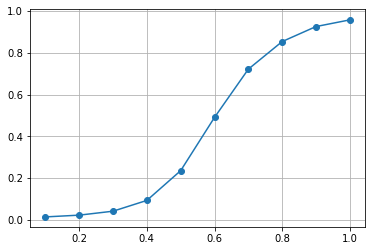

In [10]:
plt.figure()
plt.errorbar(betas, [m.mean for m in mag2], yerr = [m.errorbar for m in mag2], fmt='o-')
plt.grid(True)
plt.show()

conformation length:  101
[[  4   3  29   1  27]
 [  2   2   0   0   0]
 [  2   1   3   0   0]
 [  4   4   0   2  26]
 [  2   3   5   0   0]
 [  4   6  26   4  18]
 [  3   7   5  17   0]
 [  3   8   6  16   0]
 [  3   9   7  15   0]
 [  4  12   8  10  14]
 [  2  11   9   0   0]
 [  2  10  12   0   0]
 [  3   9  11  13   0]
 [  4  46  14  12  44]
 [  4  13  15   9  43]
 [  4  14  16   8  42]
 [  4  15  17   7  41]
 [  3  16  18   6   0]
 [  4  17  25   5  19]
 [  3  20  18  38   0]
 [  4  19  21  25  37]
 [  4  20  22  24  36]
 [  4  21  33  23  35]
 [  4  24  32  28  22]
 [  4  25  23  27  21]
 [  4  18  24  26  20]
 [  4   5  27   3  25]
 [  4  26  28   0  24]
 [  4  27  31  29  23]
 [  3   0  30  28   0]
 [  2  29  31   0   0]
 [  3  28  30  32   0]
 [  3  23  31  33   0]
 [  3  22  32  34   0]
 [  2  35  33   0   0]
 [  3  36  34  22   0]
 [  3  37  35  21   0]
 [  3  38  36  20   0]
 [  3  39  37  19   0]
 [  2  40  38   0   0]
 [  4  55  39  41  57]
 [  3  42  16  40   0]
 [  4  4


----- sweep =  0 spins =  [ 1 -1  1  1  1 -1 -1 -1  1  1 -1  1  1  1  1  1 -1  1  1 -1  1 -1 -1  1
  1 -1  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1 -1  1  1  1  1 -1
 -1  1 -1  1 -1 -1 -1 -1  1 -1  1  1  1  1 -1 -1 -1 -1  1 -1  1  1  1  1
 -1  1  1  1  1  1 -1 -1  1  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1
  1  1 -1 -1 -1] beta =  0.2
  ene =  -24.0  (naive)
      =  -24.0 +/- 0.0
  mag^2 =  0.011861582197823742 +/- 0.0
  mag^4 =  0.00014069713223572913 +/- 0.0

----- sweep =  10000 spins =  [ 1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1 -1 -1 -1
  1  1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1
 -1  1 -1  1  1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1  1
  1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1  1  1  1 -1] beta =  0.2
  ene =  -36.218578142185784  (naive)
      =  -36.225328947368425 +/- 0.14163919819031184
  mag^2 =  0.023292027613391875 +/- 0.0003423930743123109
  mag^4 =  0.001577799


----- sweep =  0 spins =  [ 1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1  1 -1  1  1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1
  1  1  1 -1 -1  1  1 -1 -1  1  1  1  1 -1 -1  1  1  1 -1 -1  1  1 -1 -1
  1  1  1  1 -1] beta =  0.30000000000000004
  ene =  -46.0  (naive)
      =  -46.0 +/- 0.0
  mag^2 =  0.007940398000196058 +/- 0.0
  mag^4 =  6.304992040151756e-05 +/- 0.0

----- sweep =  10000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1
  1 -1 -1 -1  1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1  1  1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1
 -1  1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1] beta =  0.30000000000000004
  ene =  -57.44445555444455  (naive)
      =  -57.45929276315789 +/- 0.2627558784779928
  mag^2 =  0.04076040339182434 +/- 0.000562582490529


----- sweep =  30000 spins =  [-1  1  1  1  1 -1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1
  1  1  1  1 -1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1 -1  1 -1  1  1  1  1  1  1 -1 -1  1  1
 -1 -1 -1 -1 -1] beta =  0.4
  ene =  -83.21302623245892  (naive)
      =  -83.23625837053571 +/- 0.11106279395408841
  mag^2 =  0.09315575022406765 +/- 0.0007739414116280941
  mag^4 =  0.021681605637949915 +/- 0.000335502435527911

----- sweep =  40000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1
 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  0.4
  ene =  -83.16922076948076  (naive)
      =  -83.16180098684211 +/- 0.09629561861287467
  ma


----- sweep =  40000 spins =  [ 1  1  1  1  1  1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.5
  ene =  -113.30696732581686  (naive)
      =  -113.3222142269737 +/- 0.12696901106684133
  mag^2 =  0.23350700266743718 +/- 0.0027421775945425902
  mag^4 =  0.10491106016525517 +/- 0.001829422963524166

----- sweep =  50000 spins =  [ 1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1 -1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  0.5
  ene =  -113.2410151796964  (naive)
      =  -113.26989746093751 +/- 0.1200338736331185
  ma


----- sweep =  60000 spins =  [ 1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  0.6
  ene =  -139.2219129681172  (naive)
      =  -139.1959751674107 +/- 0.10975396775494017
  mag^2 =  0.4874719176910178 +/- 0.00459938832024761
  mag^4 =  0.3335167361165774 +/- 0.004022804280789034

----- sweep =  70000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.6
  ene =  -139.22695390065857  (naive)
      =  -139.22371897977942 +/- 0.09993271411544165
  mag^2


----- sweep =  70000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1
  1  1  1  1 -1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  0.7000000000000001
  ene =  -154.3436236625191  (naive)
      =  -154.3328929227941 +/- 0.12151696389533242
  mag^2 =  0.71503780446842 +/- 0.007660169669694352
  mag^4 =  0.595828106154354 +/- 0.0077605452397716745

----- sweep =  80000 spins =  [-1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  0.7000000000000001
  ene =  -154.35317058536768  (naive)
      =  -154.36685341282896 +/


----- sweep =  70000 spins =  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  0.8
  ene =  -161.83663090527278  (naive)
      =  -161.83240464154414 +/- 0.10392873561197243
  mag^2 =  0.8521729325123836 +/- 0.008237447224304388
  mag^4 =  0.7754616133544598 +/- 0.009016244316041682

----- sweep =  80000 spins =  [ 1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  0.8
  ene =  -161.81075236559542  (naive)
      =  -161.80689761513162 +/- 0.09615614196697352
  ma

----- sweep =  80000 spins =  [ 1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1] beta =  0.9
  ene =  -165.36725790927613  (naive)
      =  -165.3690378289474 +/- 0.10604235267360969
  mag^2 =  0.9103907229489884 +/- 0.010464597868137419
  mag^4 =  0.8619367500084538 +/- 0.011831441541084725

----- sweep =  90000 spins =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] beta =  0.9
  ene =  -165.39158453794957  (naive)
      =  -165.36840820312503 +/- 0.11772056392205783
  mag^2 =  0.9108010818485931 +/- 0.011071506312106915
  mag^4 =  0.8624218272783167 +/- 0.012599311931450625


----- sweep =  90000 spins =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1] beta =  1.0
  ene =  -167.39640670659216  (naive)
      =  -167.38210449218752 +/- 0.05547176380109103
  mag^2 =  0.9555645586217038 +/- 0.005839700331270194
  mag^4 =  0.9267312548303078 +/- 0.006749179587245535

Final:
  ene =  -167.40814  (naive)
      =  -167.40848795572919 +/- 0.04948463674835436
  mag^2 =  0.9580010793467959 +/- 0.005191340411339476
  mag^4 =  0.9295507030089951 +/- 0.0059976300658457354


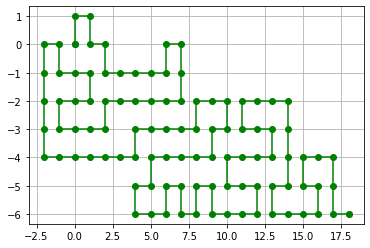

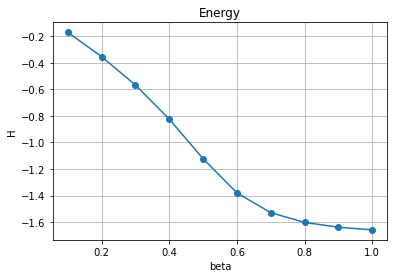

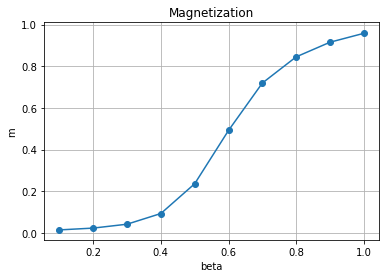

(array([<mc_lib.observable.RealObservable object at 0x00000149B72CBE90>,
       dtype=object),
 array([<mc_lib.observable.RealObservable object at 0x00000149B72CBB70>,
       dtype=object),
 array([<mc_lib.observable.RealObservable object at 0x00000149B72CBB20>,
       dtype=object))

In [21]:
measure_structure('Conformations\\pack_1\\struct_conf_8.dat')

# Binder cumulant

In [12]:
dir_name = 'Conformations\\Binder_cumulant\\'

num_file = open(dir_name + 'num_of_files.txt', 'r')
N_conf = int(num_file.readline())
N_rep = int(num_file.readline().split()[0])
print('number of conformations =', N_conf)
print('number replicas with same length =', N_rep)
num_file.close()

number of conformations = 100
number replicas with same length = 10


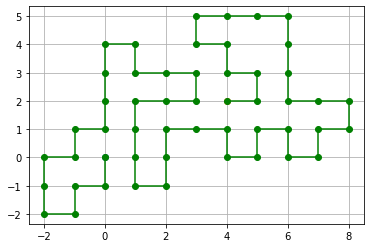

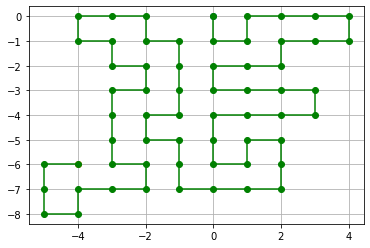

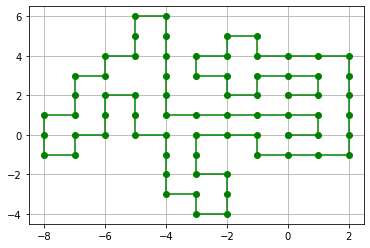

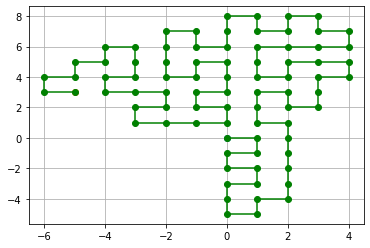

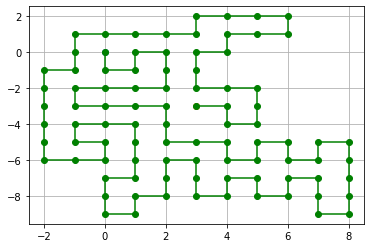

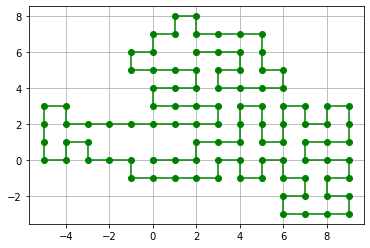

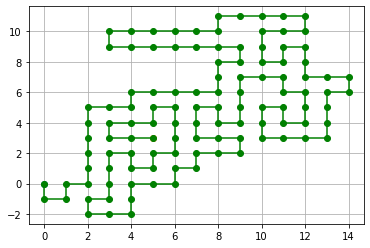

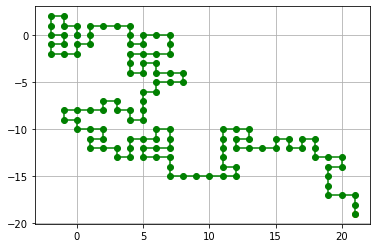

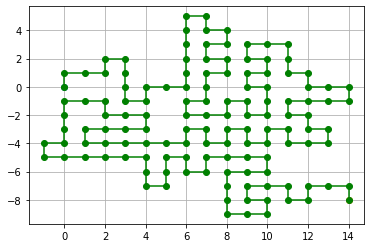

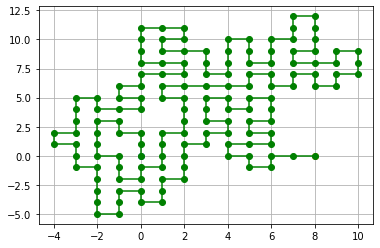

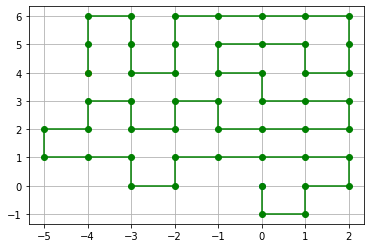

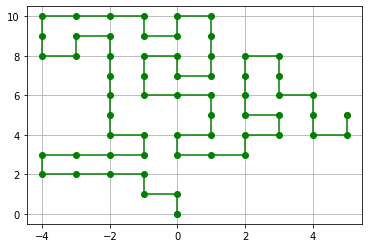

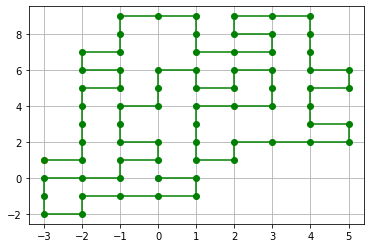

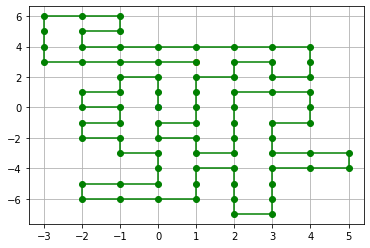

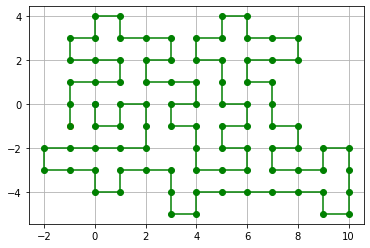

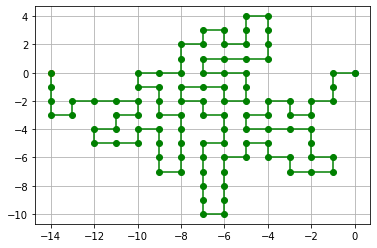

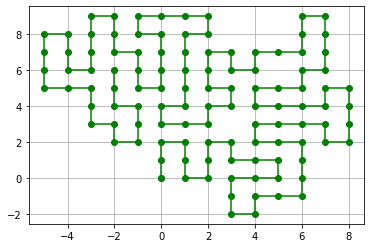

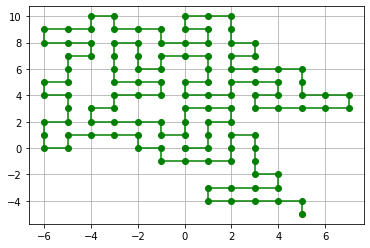

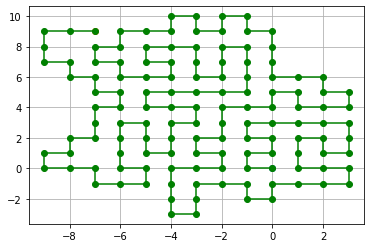

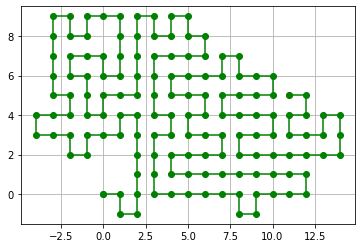

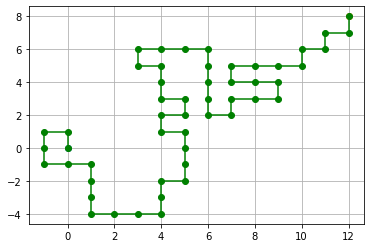

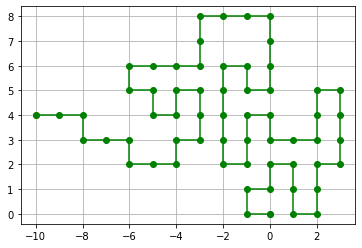

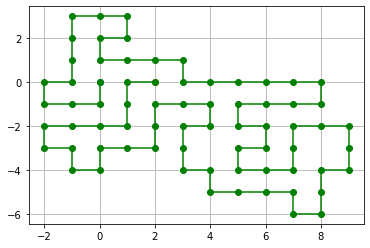

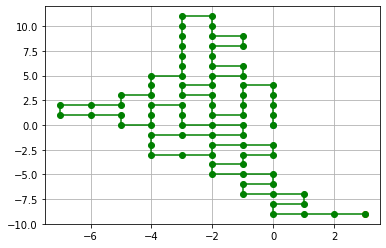

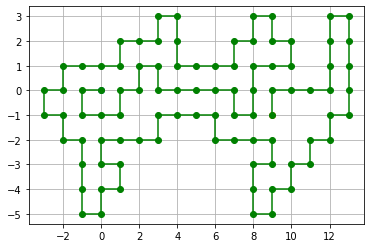

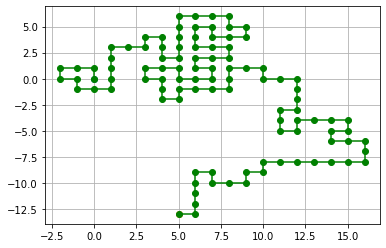

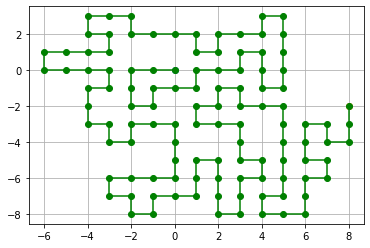

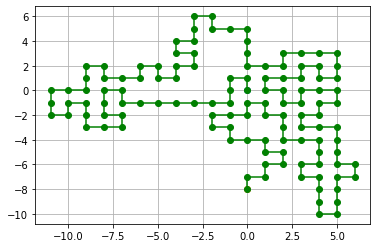

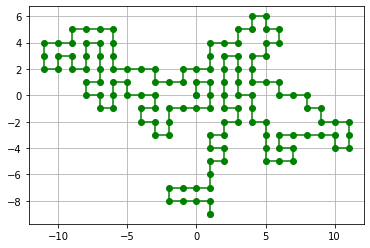

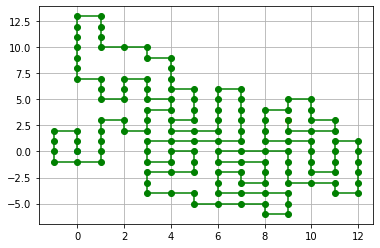

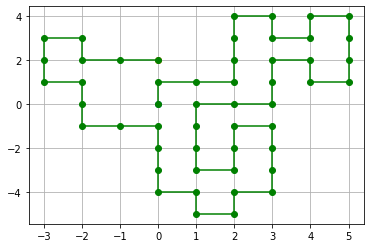

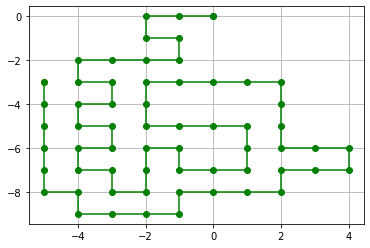

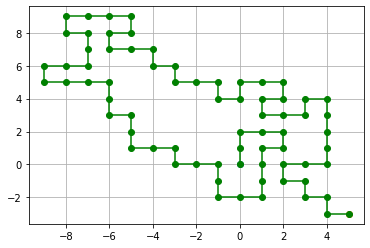

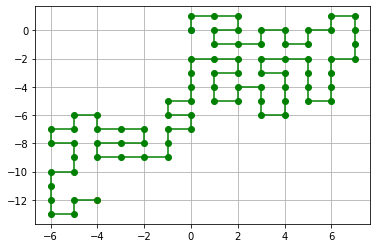

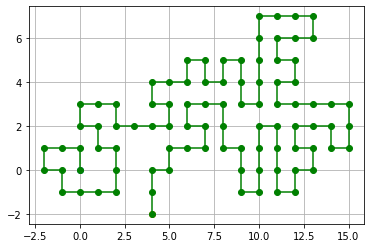

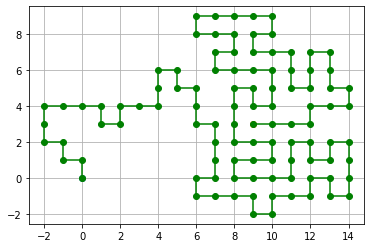

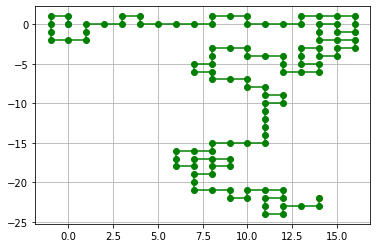

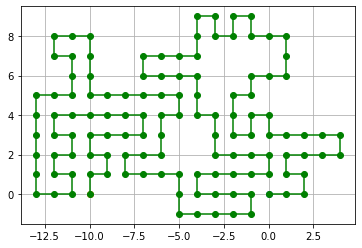

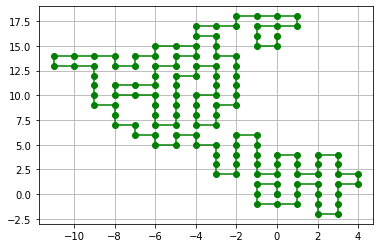

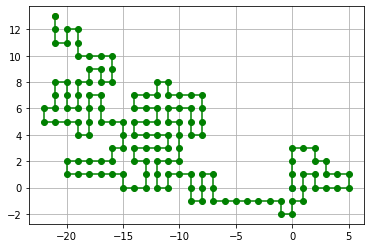

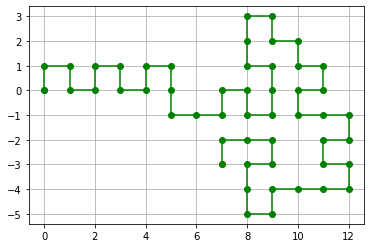

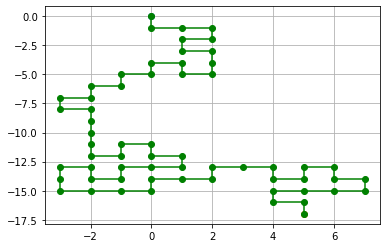

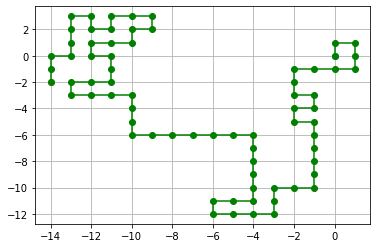

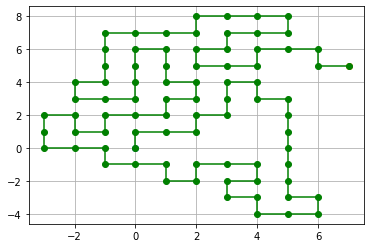

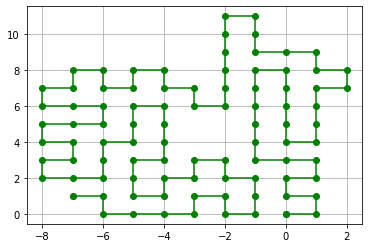

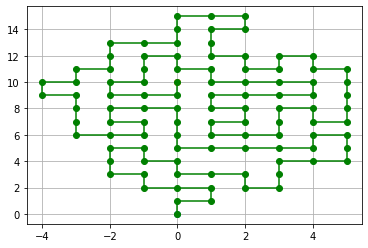

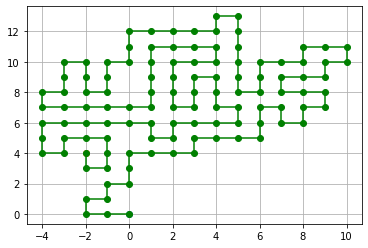

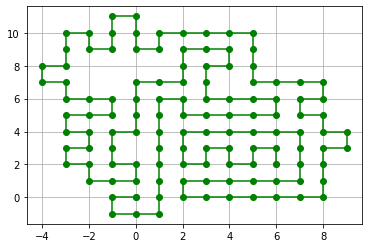

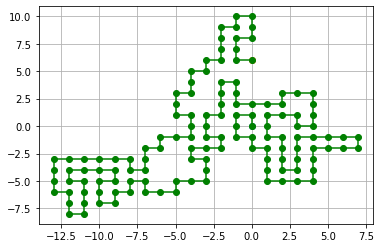

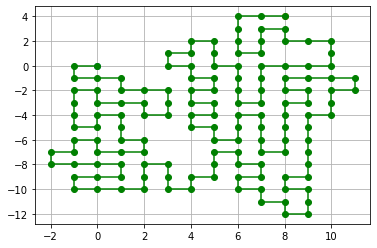

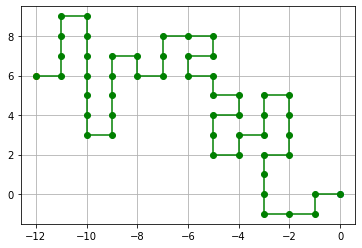

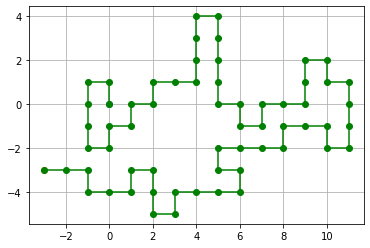

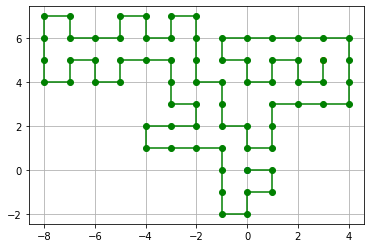

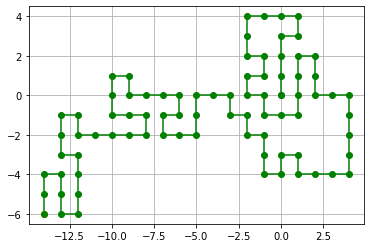

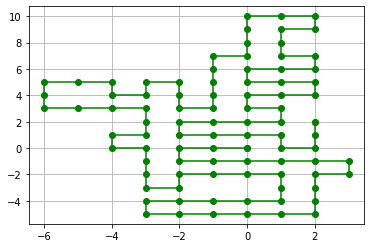

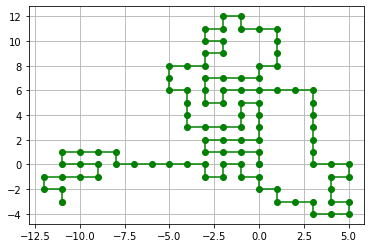

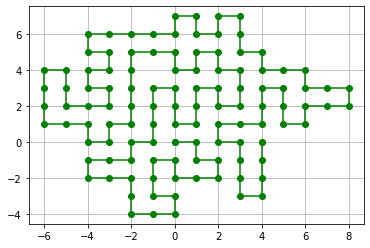

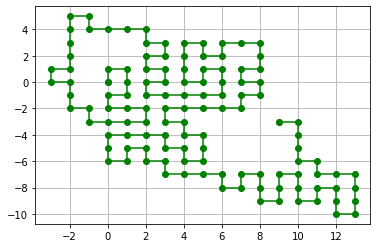

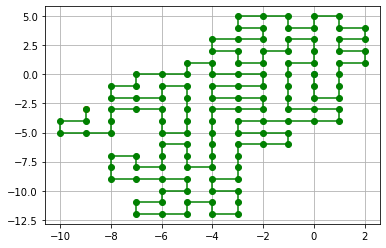

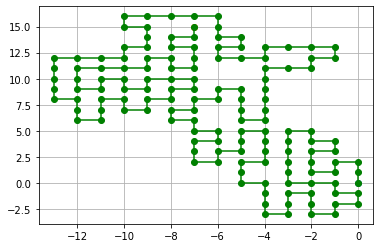

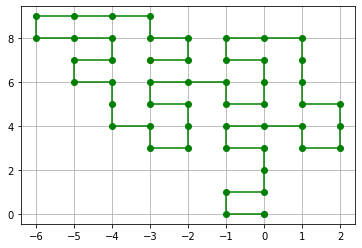

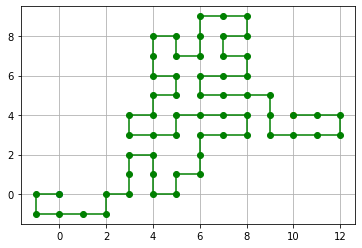

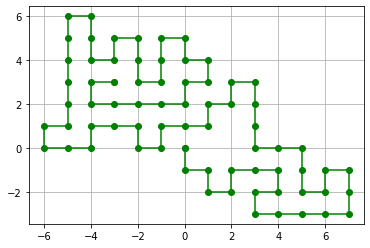

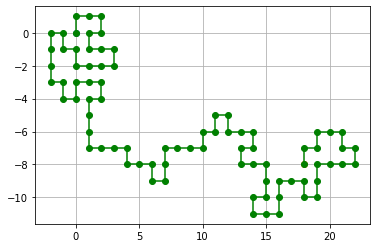

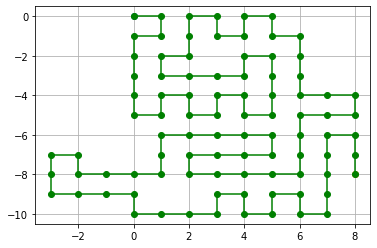

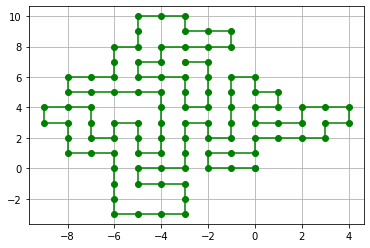

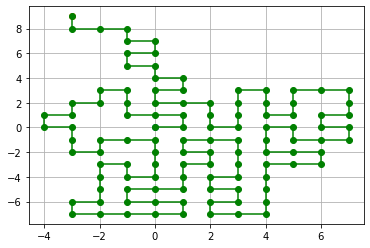

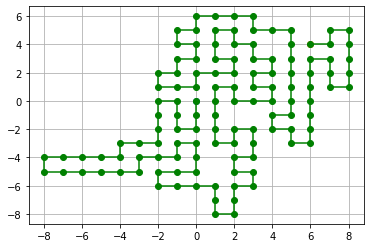

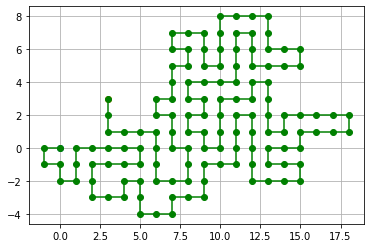

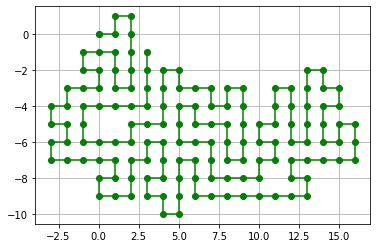

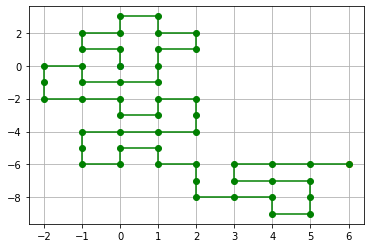

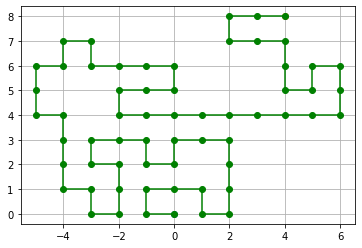

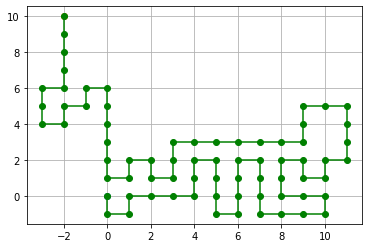

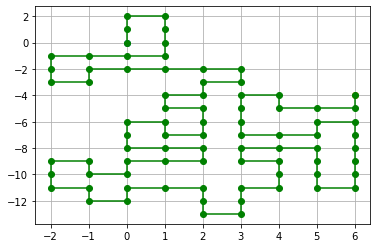

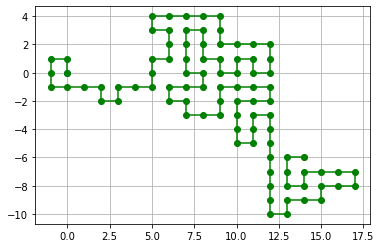

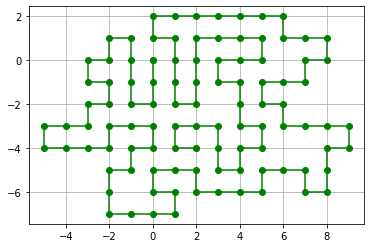

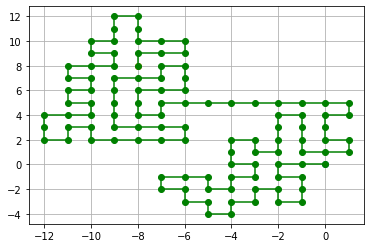

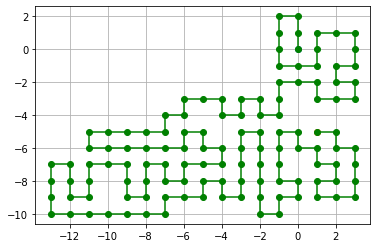

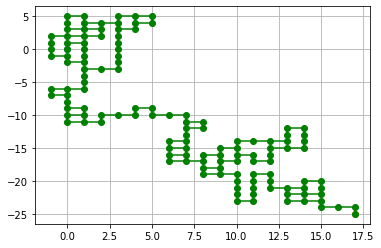

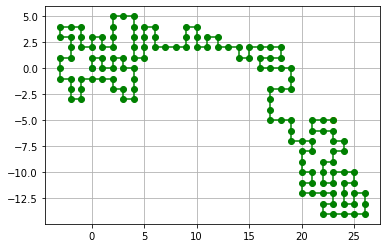

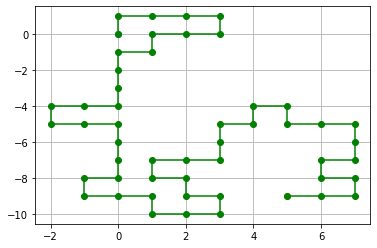

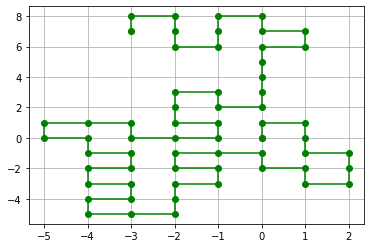

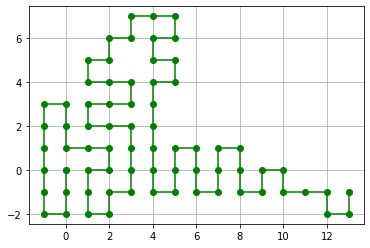

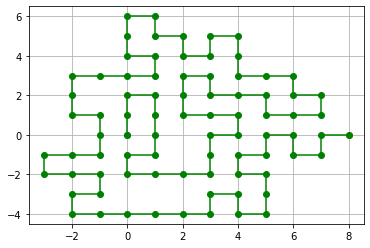

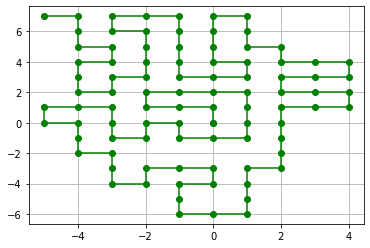

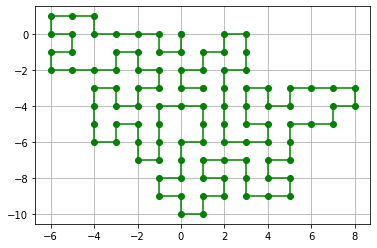

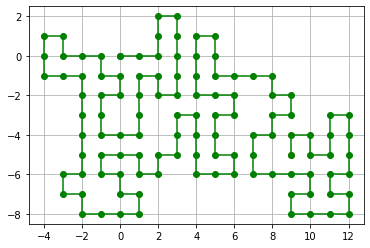

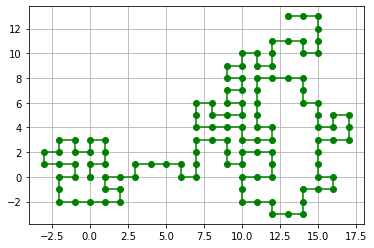

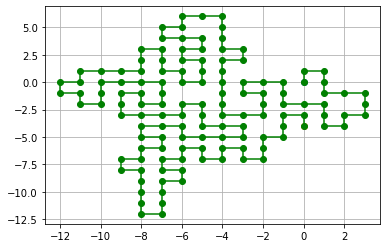

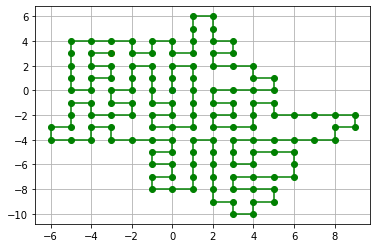

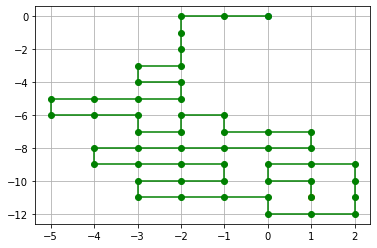

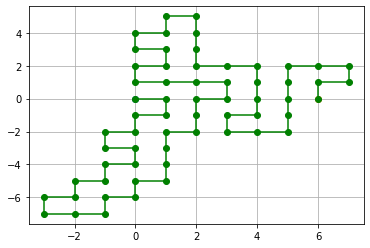

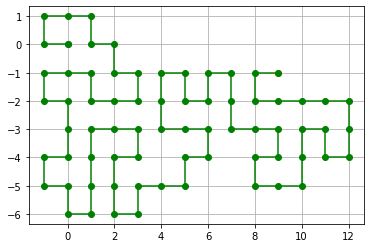

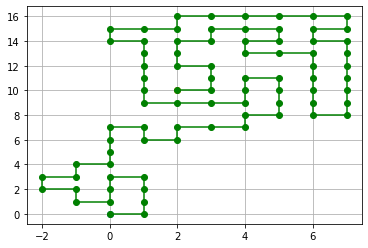

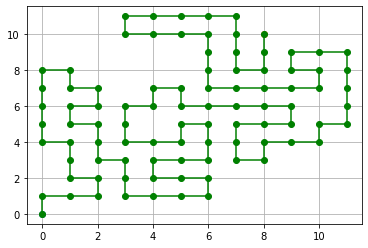

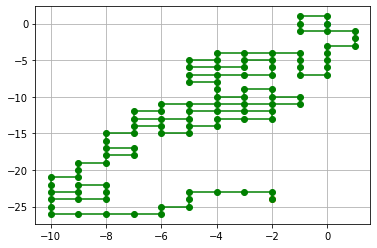

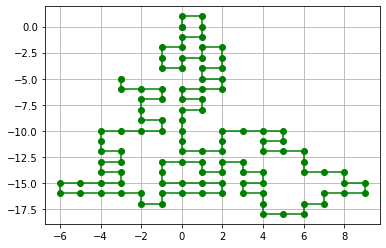

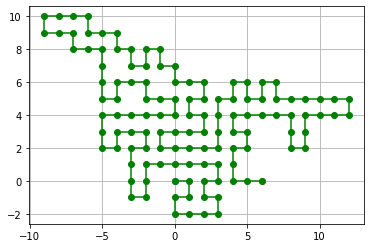

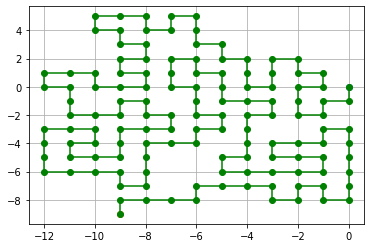

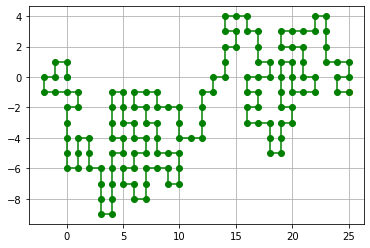

In [13]:
for conf in range(N_conf):
    file_name = dir_name + 'struct_conf_' + str(conf) + '.dat'
    struct = read_conformation(file_name)
    draw_conformation(struct)

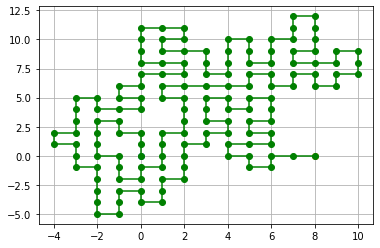

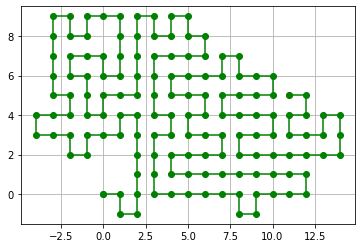

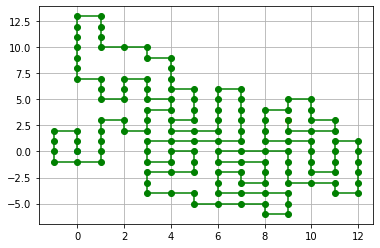

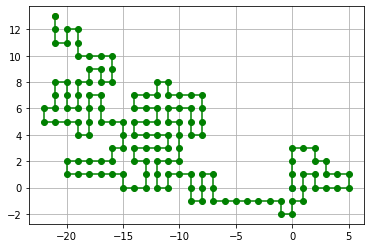

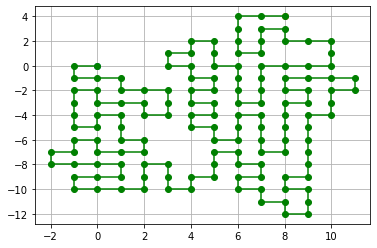

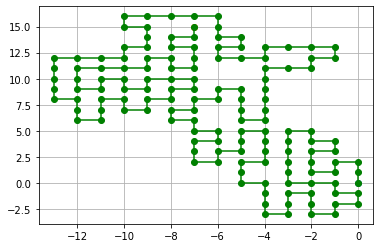

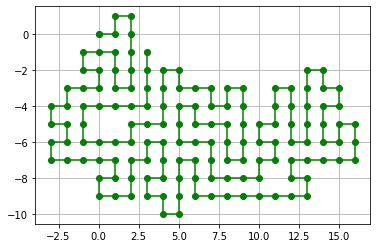

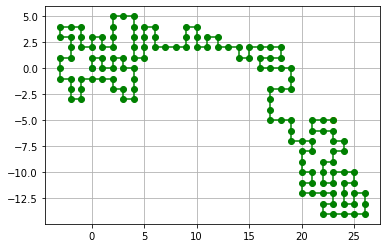

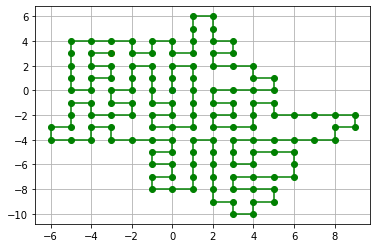

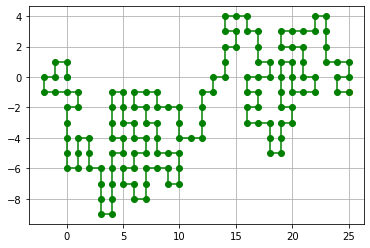

In [31]:
for conf in range(9, N_conf, N_rep):
    file_name = dir_name + 'struct_conf_' + str(conf) + '.dat'
    struct = read_conformation(file_name)
    draw_conformation(struct)

In [15]:
# mean Binder cumulant
f_name = dir_name + 'conf_data_'
U = []
for i in range(N_conf//N_rep):
    u = [0] * 10
    for j in range(i, N_conf, N_rep):
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        mag2 = data['mag2']
        mag4 = data['mag4']
        for k in range(10):
            u[k] += 1 - mag4[k].mean / (3 * mag2[k].mean**2)
    u = [p / N_rep for p in u]
    U.append(u)

In [16]:
%matplotlib notebook

<IPython.core.display.Javascript object>


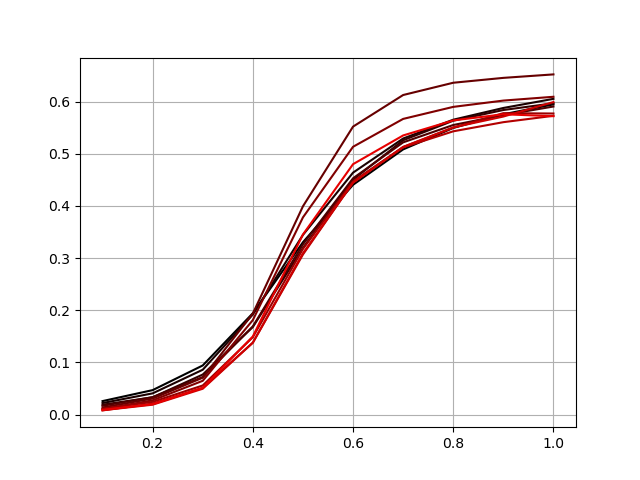

In [20]:
beta = np.linspace(1/10, 1, 10)

plt.figure()
for i in range(N_conf//N_rep):
    plt.plot(beta, U[i], color=(i/(N_conf//N_rep), 0, 0))
    plt.grid(True)

plt.show()

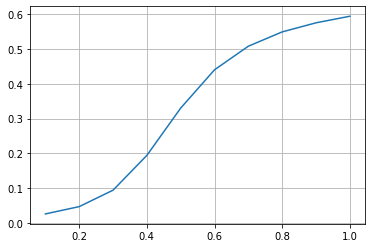

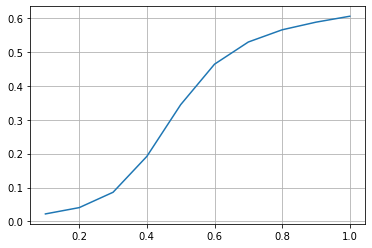

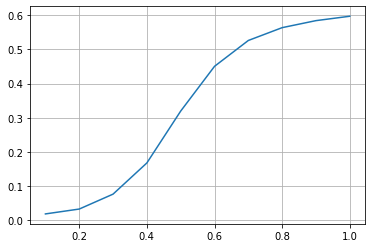

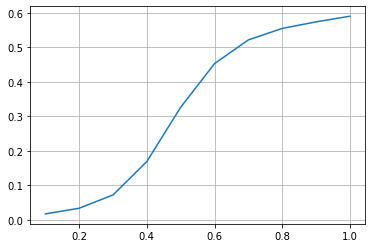

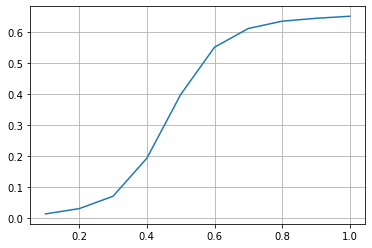

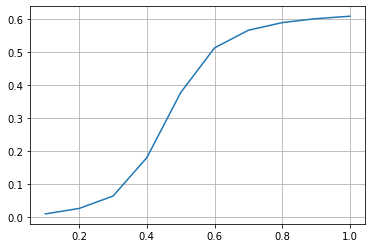

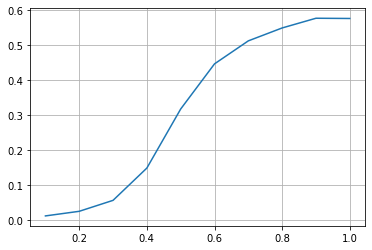

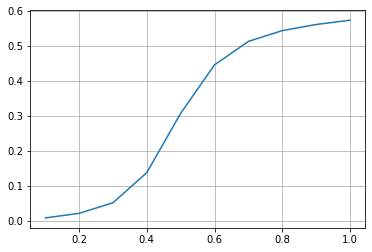

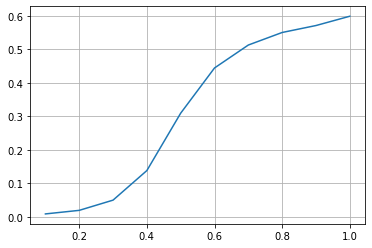

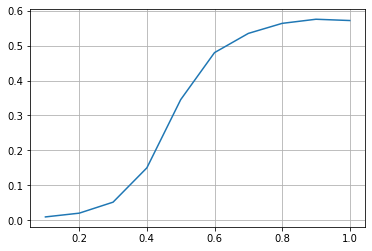

In [22]:
%matplotlib inline
beta = np.linspace(1/10, 1, 10)

for i in range(N_conf//N_rep):
    plt.figure()
    plt.plot(beta, U[i])
    plt.grid(True)
    plt.show()

In [26]:
# Binder cumulant with mean magnetization
f_name = dir_name + 'conf_data_'
U = []
for i in range(N_conf//N_rep):
    u = [0] * 10
    mag2_mean = [0] * 10
    mag4_mean = [0] * 10
    for j in range(i, N_conf, N_rep):
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        mag2 = data['mag2']
        mag4 = data['mag4']
        for k in range(10):
            mag2_mean[k] += mag2[k].mean
            mag4_mean[k] += mag4[k].mean
            
    mag2_mean = [m/N_rep for m in mag2_mean]
    mag4_mean = [m/N_rep for m in mag4_mean]
    for k in range(10):
        u[k] = 1 - mag4_mean[k] / (3 * mag2_mean[k]**2)
    
    U.append(u)

<IPython.core.display.Javascript object>


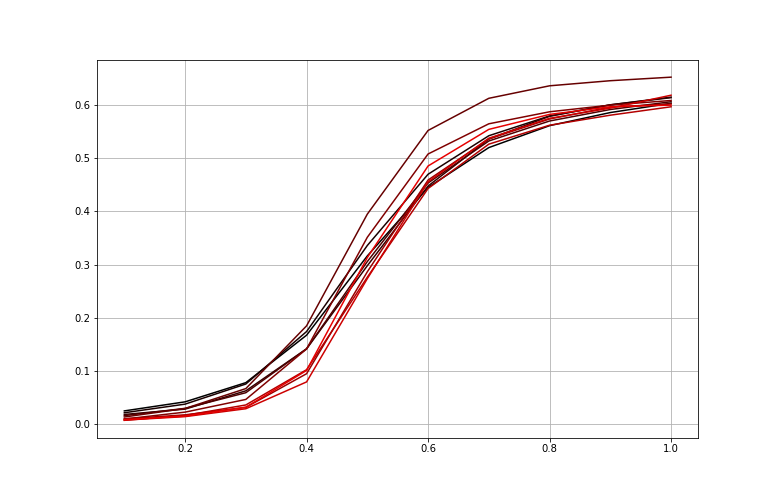

In [27]:
%matplotlib notebook
beta = np.linspace(1/10, 1, 10)

plt.figure()
for i in range(N_conf//N_rep):
    plt.plot(beta, U[i], color=(i/(N_conf//N_rep), 0, 0))
    plt.grid(True)

plt.show()

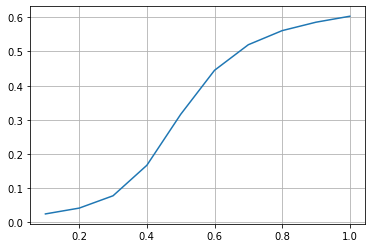

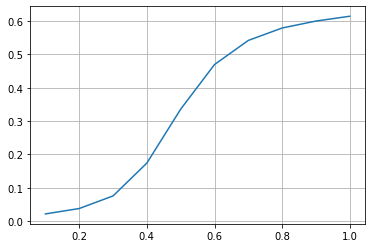

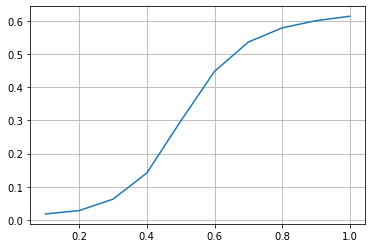

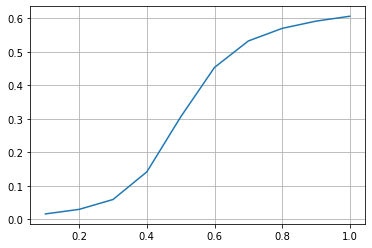

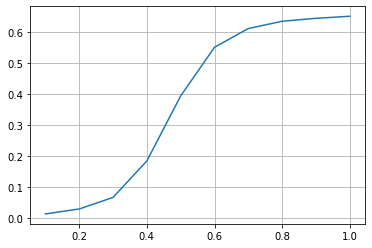

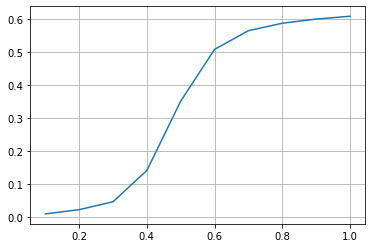

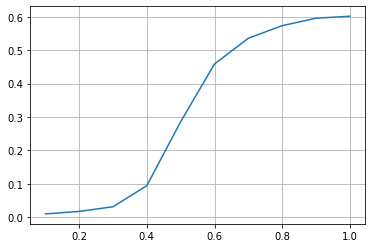

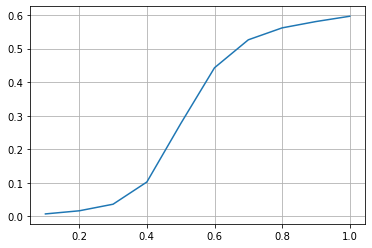

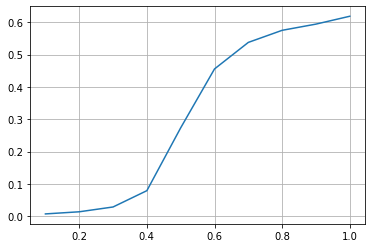

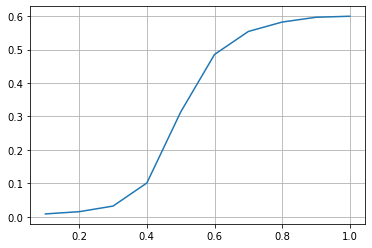

In [28]:
%matplotlib inline
beta = np.linspace(1/10, 1, 10)

for i in range(N_conf//N_rep):
    plt.figure()
    plt.plot(beta, U[i])
    plt.grid(True)
    plt.show()

In [32]:
dir_name = 'Conformations\\Binder_cumulant_long\\'

num_file = open(dir_name + 'num_of_files.txt', 'r')
N_conf = int(num_file.readline())
N_rep = int(num_file.readline().split()[0])
print('number of conformations =', N_conf)
print('number replicas with same length =', N_rep)
num_file.close()

number of conformations = 100
number replicas with same length = 10


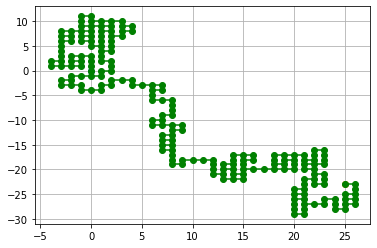

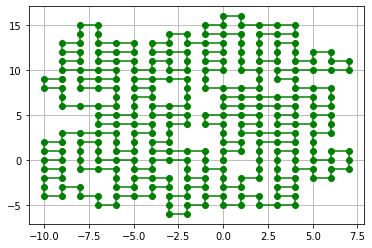

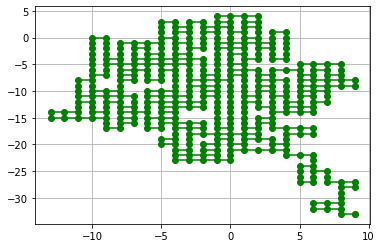

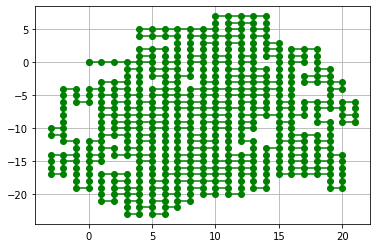

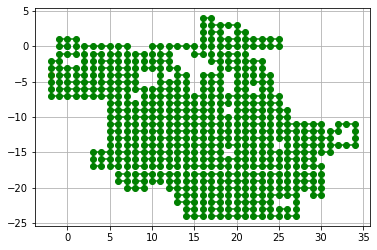

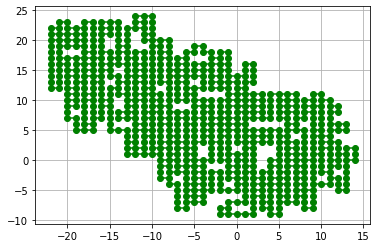

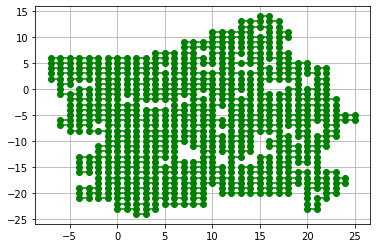

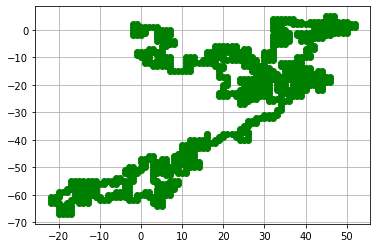

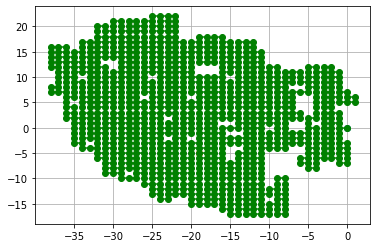

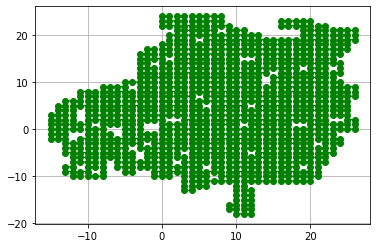

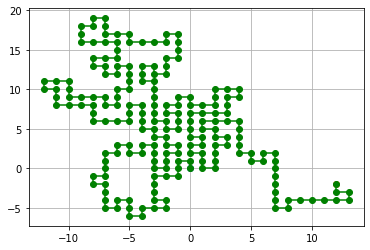

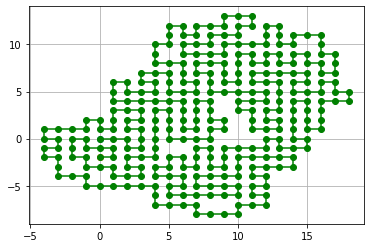

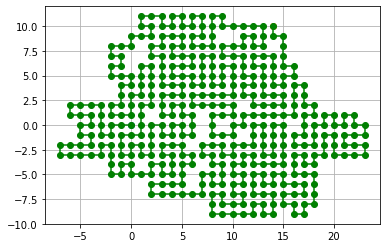

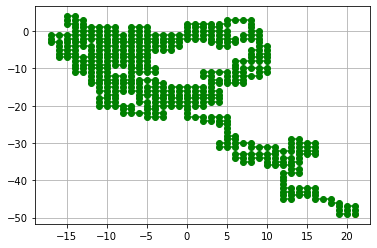

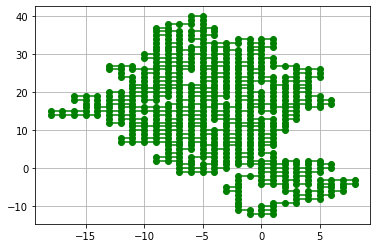

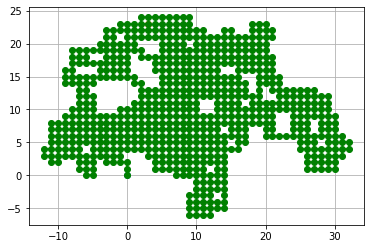

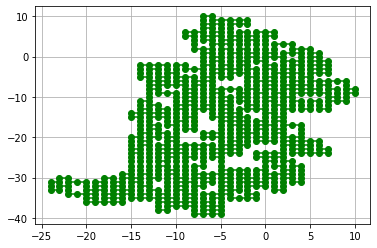

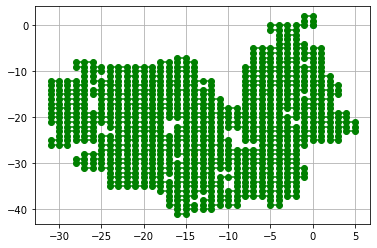

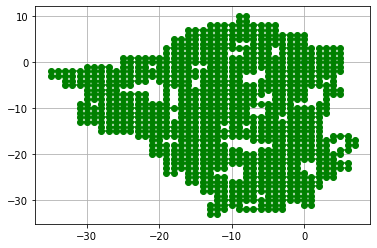

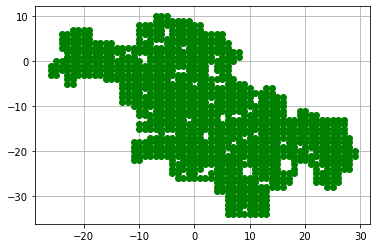

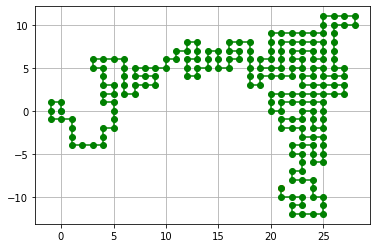

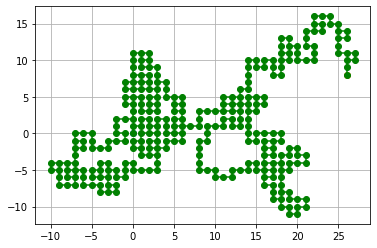

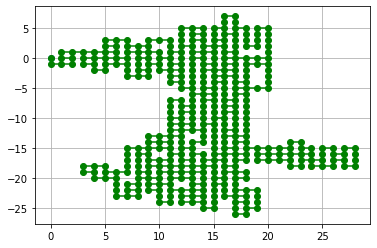

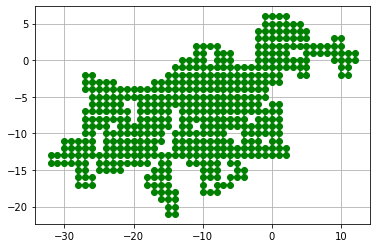

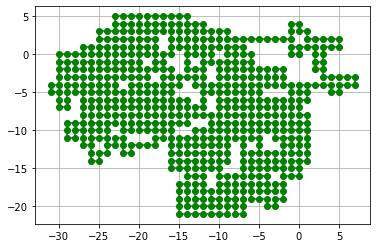

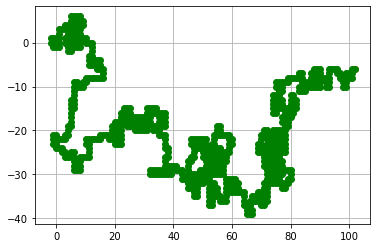

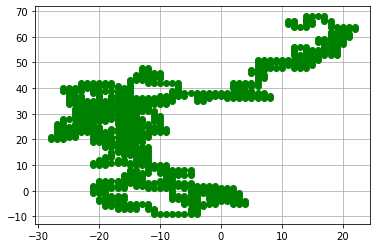

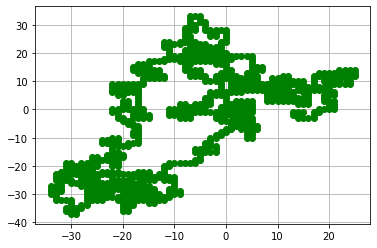

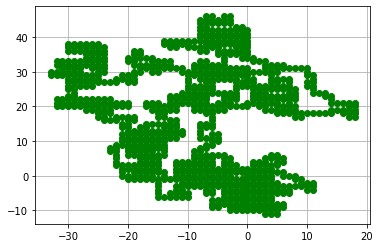

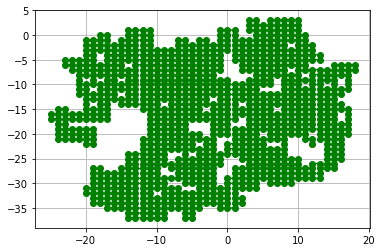

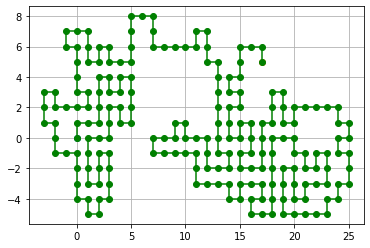

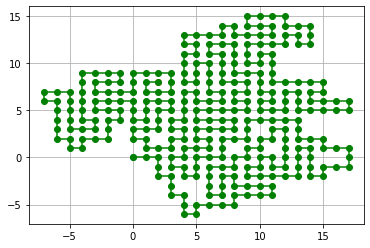

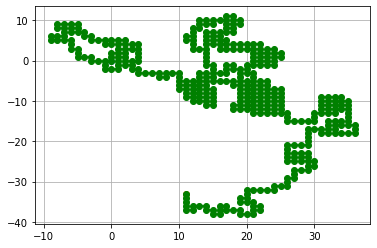

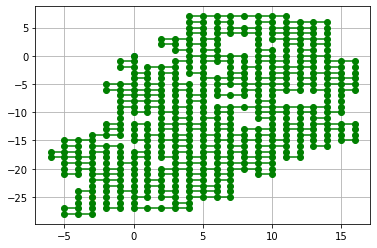

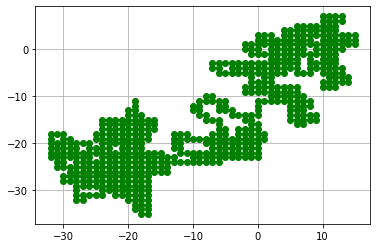

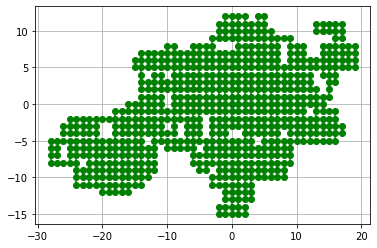

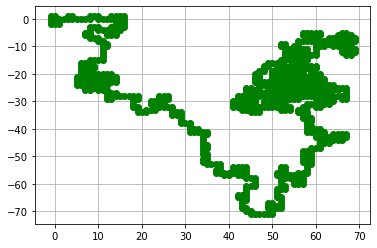

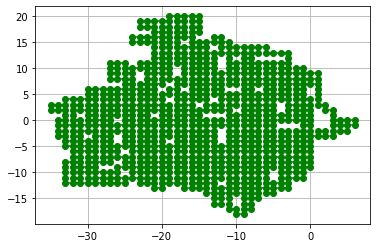

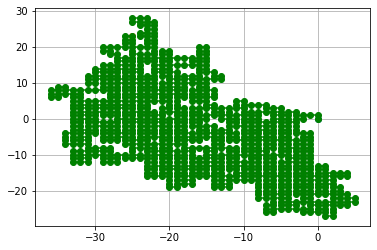

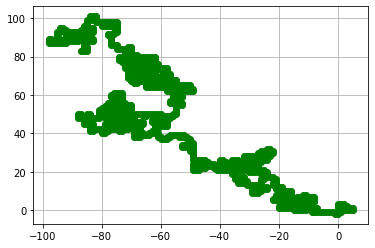

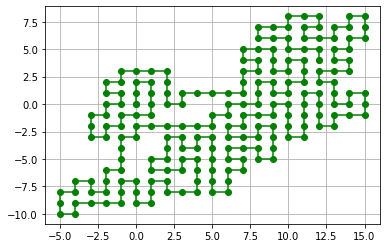

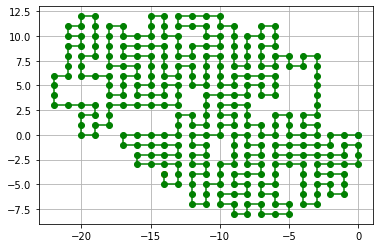

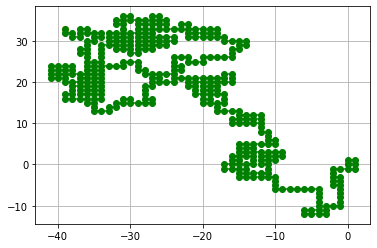

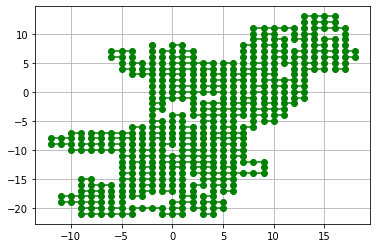

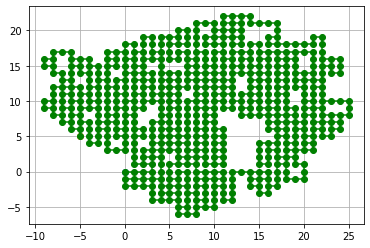

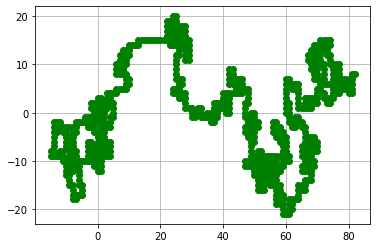

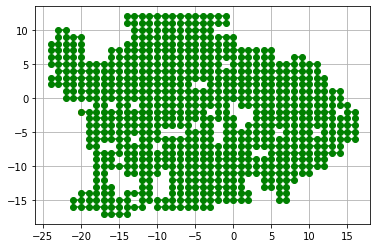

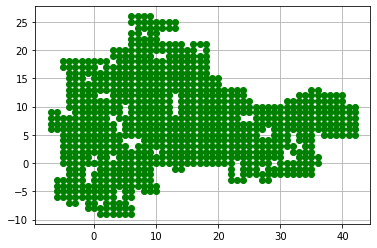

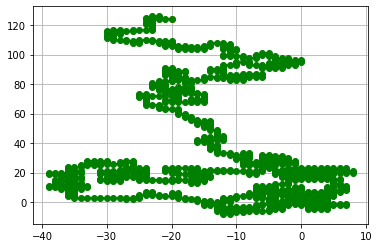

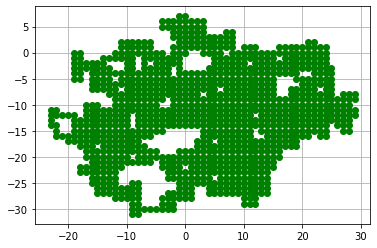

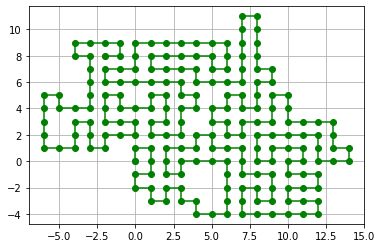

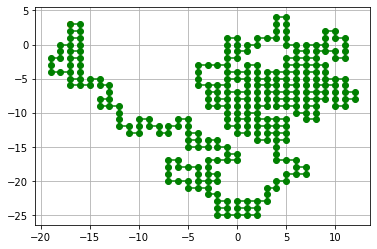

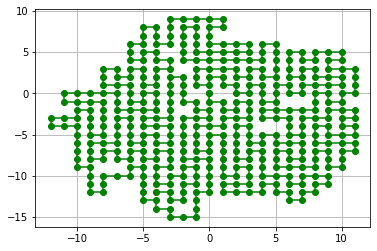

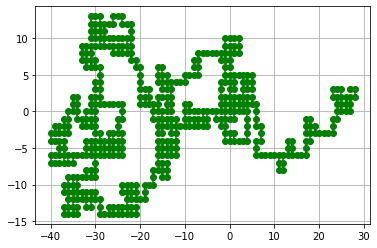

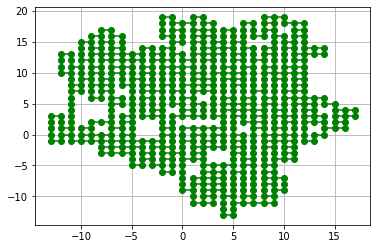

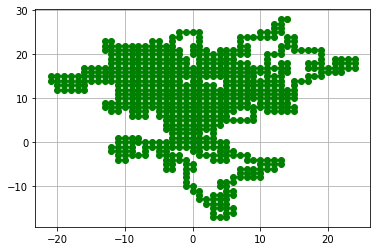

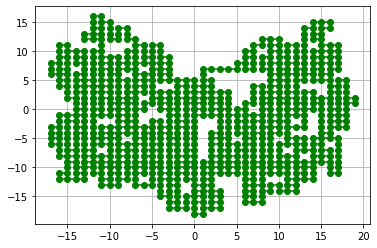

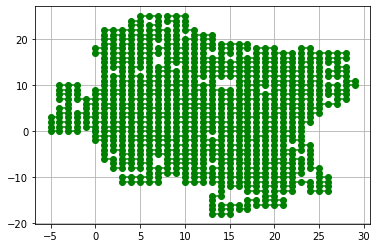

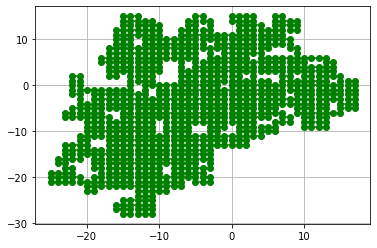

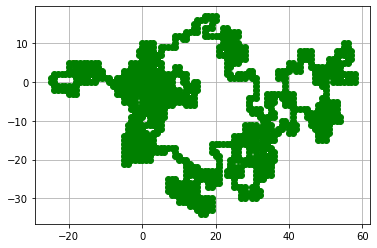

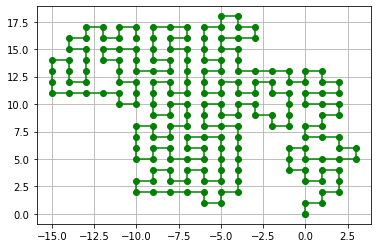

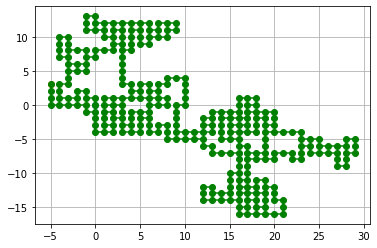

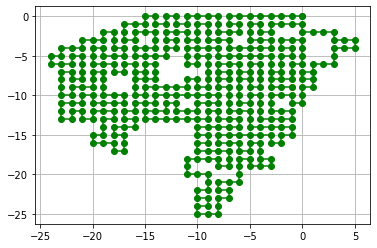

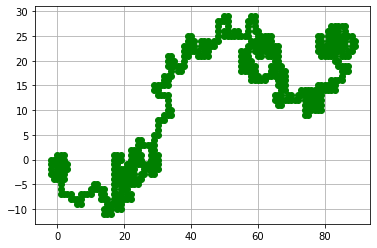

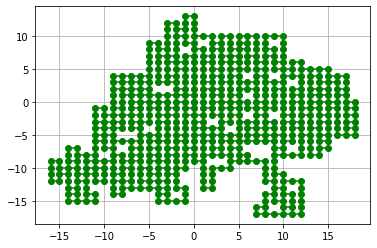

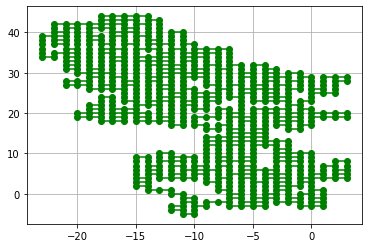

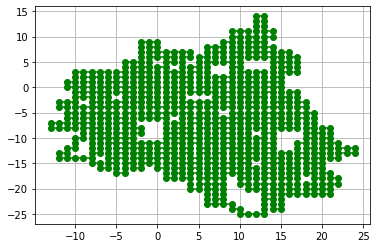

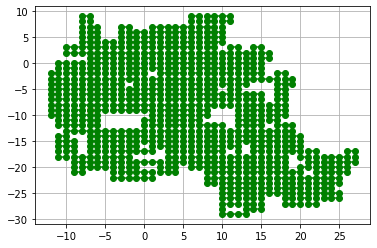

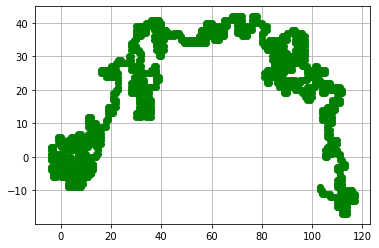

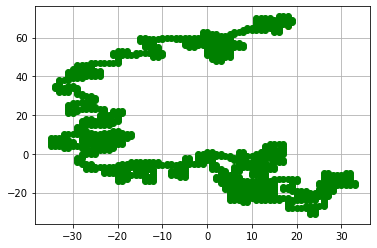

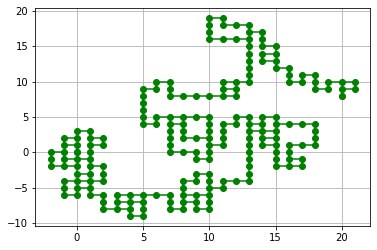

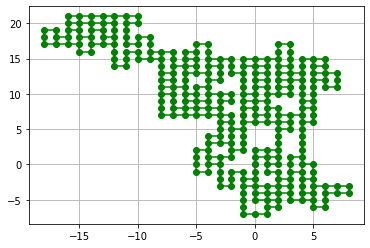

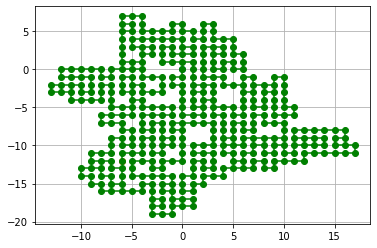

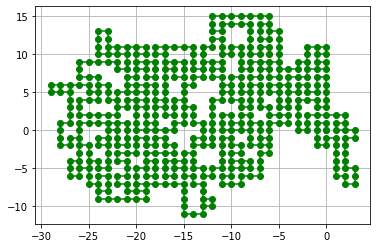

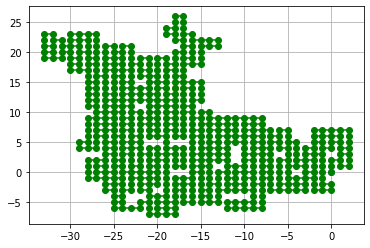

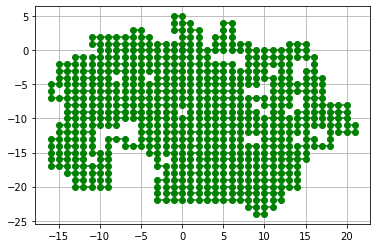

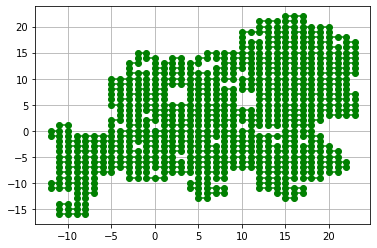

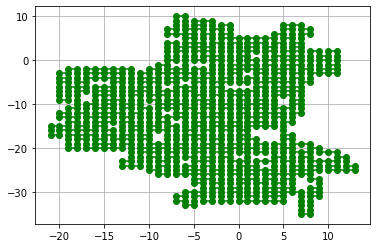

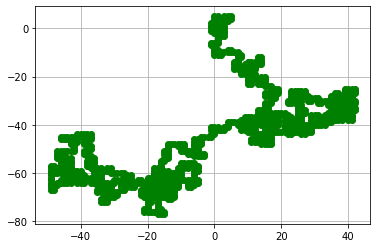

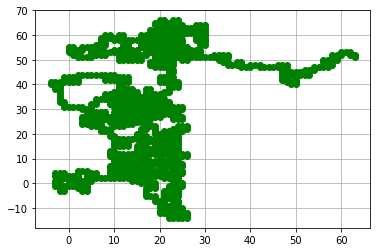

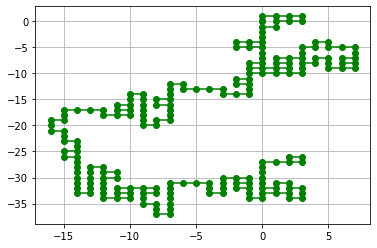

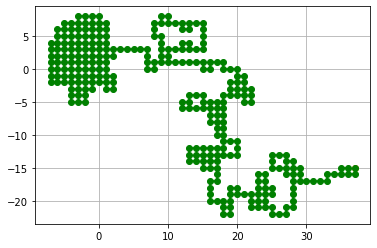

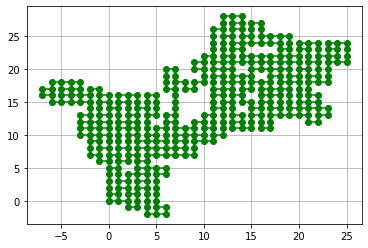

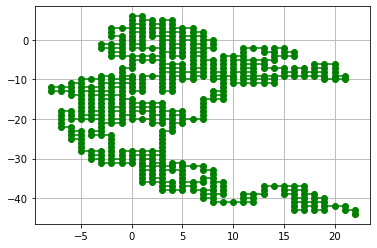

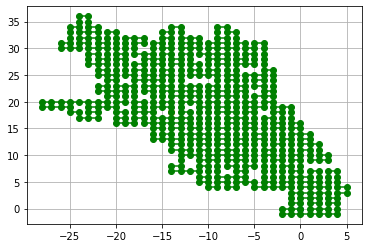

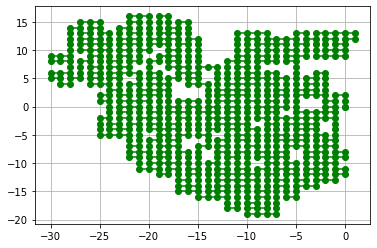

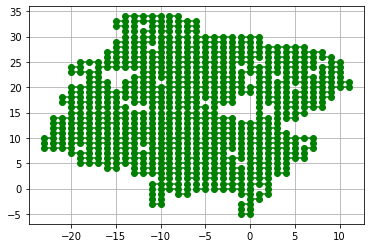

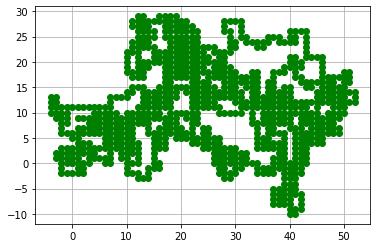

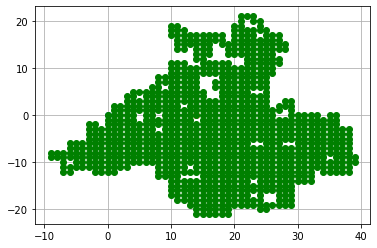

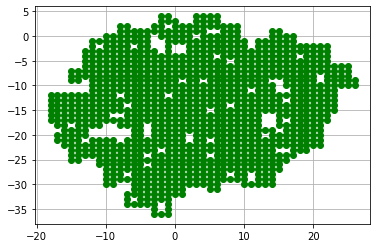

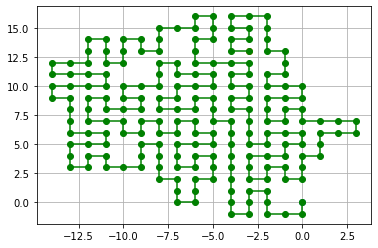

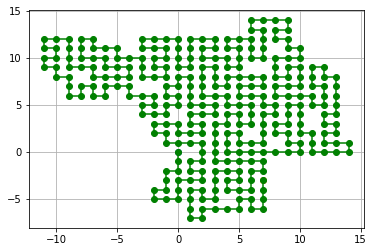

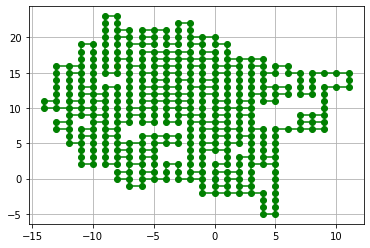

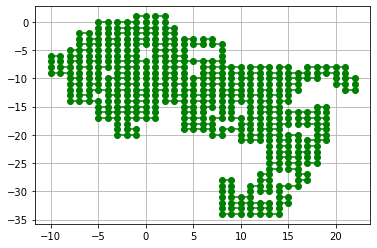

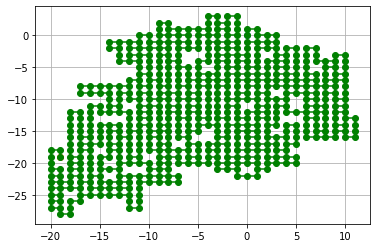

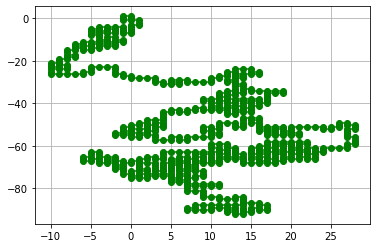

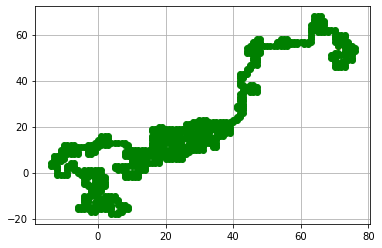

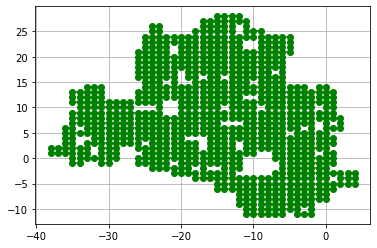

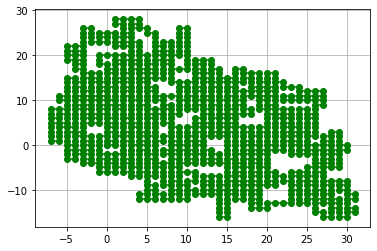

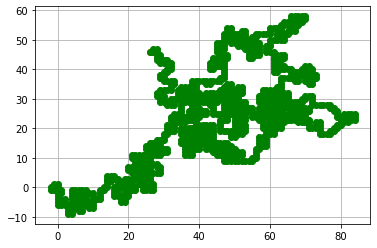

In [33]:
for conf in range(N_conf):
    file_name = dir_name + 'struct_conf_' + str(conf) + '.dat'
    struct = read_conformation(file_name)
    draw_conformation(struct)

In [34]:
# mean Binder cumulant
f_name = dir_name + 'conf_data_'
U = []
for i in range(N_conf//N_rep):
    u = [0] * 10
    for j in range(i, N_conf, N_rep):
        data = np.load(f_name+str(j)+'.npz', allow_pickle=True)
        mag2 = data['mag2']
        mag4 = data['mag4']
        for k in range(10):
            u[k] += 1 - mag4[k].mean / (3 * mag2[k].mean**2)
    u = [p / N_rep for p in u]
    U.append(u)

<IPython.core.display.Javascript object>


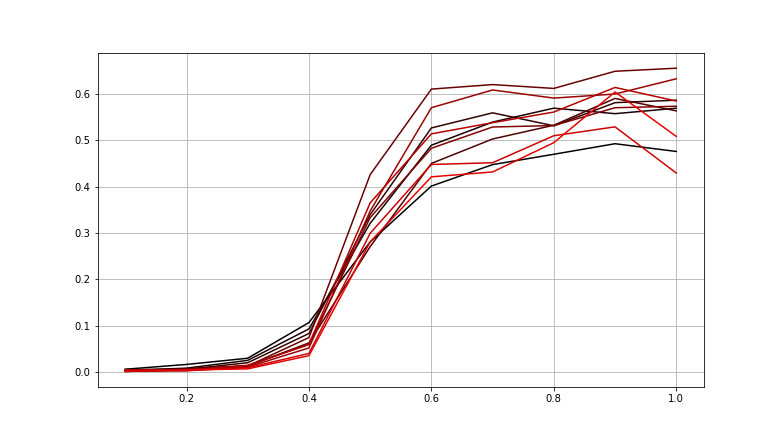

In [35]:
%matplotlib notebook
beta = np.linspace(1/10, 1, 10)

plt.figure()
for i in range(N_conf//N_rep):
    plt.plot(beta, U[i], color=(i/(N_conf//N_rep), 0, 0))
    plt.grid(True)

plt.show()